### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("../Analysis/charity_data.csv")
application_df.head()

EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN", "NAME"], axis=1)

In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
class_counts = application_df.CLASSIFICATION.value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

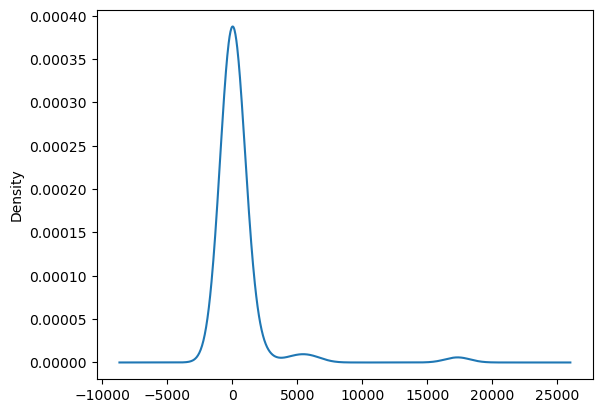

In [5]:
# Visualize the value counts of APPLICATION_TYPE
class_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(class_counts[class_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df.CLASSIFICATION.value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

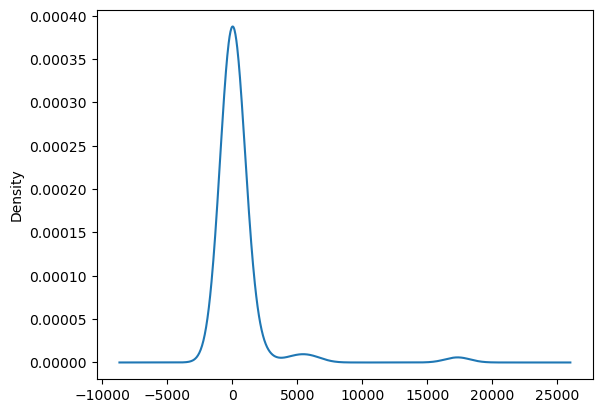

In [8]:
# Visualize the value counts of CLASSIFICATION
class_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_counts[class_counts <100].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()


In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

/Users/tyronefraley/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


APPLICATION_TYPE_T10  APPLICATION_TYPE_T12  APPLICATION_TYPE_T13  \
0                   1.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   
2                   0.0                   0.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   0.0   

   APPLICATION_TYPE_T14  APPLICATION_TYPE_T15  APPLICATION_TYPE_T17  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   
2                   0.0                   0.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   0.0   

   APPLICATION_TYPE_T19  APPLICATION_TYPE_T2  APPLICATION_TYPE_T25  \
0                   0.0                  0.0                   0.0   
1                   0.0                  0.0                   0.0   
2                   0.0                  0.0                   0.0   
3                   0.0                  0.0                   0.0   
4                   0.0                  0.0                   0.0   

   APPLICATION_TYPE_T29  ...  INCOME_AMT_1-9999  INCOME_AMT_10000-24999  \
0                   0.0  ...                0.0                     0.0   
1                   0.0  ...                1.0                     0.0   
2                   0.0  ...                0.0                     0.0   
3                   0.0  ...                0.0                     1.0   
4                   0.0  ...                0.0                     0.0   

   INCOME_AMT_100000-499999  INCOME_AMT_10M-50M  INCOME_AMT_1M-5M  \
0                       0.0                 0.0               0.0   
1                       0.0                 0.0               0.0   
2                       0.0                 0.0               0.0   
3                       0.0                 0.0               0.0   
4                       1.0                 0.0               0.0   

   INCOME_AMT_25000-99999  INCOME_AMT_50M+  INCOME_AMT_5M-10M  \
0                     0.0              0.0                0.0   
1                     0.0              0.0                0.0   
2                     0.0              0.0                0.0   
3                     0.0              0.0                0.0   
4                     0.0              0.0                0.0   

   SPECIAL_CONSIDERATIONS_N  SPECIAL_CONSIDERATIONS_Y  
0                       1.0                       0.0  
1                       1.0                       0.0  
2                       1.0                       0.0  
3                       1.0                       0.0  
4                       1.0                       0.0  

[5 rows x 55 columns]

In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df

/Users/tyronefraley/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


STATUS   ASK_AMT  IS_SUCCESSFUL  APPLICATION_TYPE_T10  \
0           1      5000              1                   1.0   
1           1    108590              1                   0.0   
2           1      5000              0                   0.0   
3           1      6692              1                   0.0   
4           1    142590              1                   0.0   
...       ...       ...            ...                   ...   
34294       1      5000              0                   0.0   
34295       1      5000              0                   0.0   
34296       1      5000              0                   0.0   
34297       1      5000              1                   0.0   
34298       1  36500179              0                   0.0   

       APPLICATION_TYPE_T12  APPLICATION_TYPE_T13  APPLICATION_TYPE_T14  \
0                       0.0                   0.0                   0.0   
1                       0.0                   0.0                   0.0   
2                       0.0                   0.0                   0.0   
3                       0.0                   0.0                   0.0   
4                       0.0                   0.0                   0.0   
...                     ...                   ...                   ...   
34294                   0.0                   0.0                   0.0   
34295                   0.0                   0.0                   0.0   
34296                   0.0                   0.0                   0.0   
34297                   0.0                   0.0                   0.0   
34298                   0.0                   0.0                   0.0   

       APPLICATION_TYPE_T15  APPLICATION_TYPE_T17  APPLICATION_TYPE_T19  ...  \
0                       0.0                   0.0                   0.0  ...   
1                       0.0                   0.0                   0.0  ...   
2                       0.0                   0.0                   0.0  ...   
3                       0.0                   0.0                   0.0  ...   
4                       0.0                   0.0                   0.0  ...   
...                     ...                   ...                   ...  ...   
34294                   0.0                   0.0                   0.0  ...   
34295                   0.0                   0.0                   0.0  ...   
34296                   0.0                   0.0                   0.0  ...   
34297                   0.0                   0.0                   0.0  ...   
34298                   0.0                   0.0                   0.0  ...   

       INCOME_AMT_1-9999  INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  \
0                    0.0                     0.0                       0.0   
1                    1.0                     0.0                       0.0   
2                    0.0                     0.0                       0.0   
3                    0.0                     1.0                       0.0   
4                    0.0                     0.0                       1.0   
...                  ...                     ...                       ...   
34294                0.0                     0.0                       0.0   
34295                0.0                     0.0                       0.0   
34296                0.0                     0.0                       0.0   
34297                0.0                     0.0                       0.0   
34298                0.0                     0.0                       0.0   

       INCOME_AMT_10M-50M  INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  \
0                     0.0               0.0                     0.0   
1                     0.0               0.0                     0.0   
2                     0.0               0.0                     0.0   
3                     0.0               0.0                     0.0   
4                     0.0               0.0                     0.0   
...          

In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL", "IS_SUCCESSFUL"],1).values


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

/Users/tyronefraley/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_inputfeatures = len(X_train[0])
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                4640      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 7,101
Trainable params: 7,101
Non-trainable params: 0
_________________________________________________________________


2023-01-18 12:37:14.886682: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-18 12:37:14.887172: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 10. Tune using inter_op_parallelism_threads for best performance.


In [16]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [18]:
#Create a callback that saves the model's weights every 5 epochs.
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Train on 25724 samples
Epoch 1/100

Epoch 00001: saving model to checkpoints/weights.01.hdf5
   32/25724 [..............................] - ETA: 8:27 - loss: 0.7599 - accuracy: 0.3438
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
  192/25724 [..............................] - ETA: 1:33 - loss: 0.7506 - accuracy: 0.4323
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
  320/25724 [..............................] - ETA: 59s - loss: 0.7326 - accuracy: 0.4625 
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5


Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 3552/25724 [===>..........................] - ETA: 12s - loss: 0.6251 - accuracy: 0.6633
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 3680/25724 [===>..........................] - ETA: 12s - loss: 0.6222 - accuracy: 0.6679
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 3808/25724 [===>..........................] - ETA: 12s - loss: 0.62

 6912/25724 [=======>......................] - ETA: 8s - loss: 0.5968 - accuracy: 0.6933
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 7104/25724 [=======>......................] - ETA: 8s - loss: 0.5956 - accuracy: 0.6941
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 7296/25724 [=======>......................] - ETA: 8s - loss: 0.5937 - accuracy: 0.6959
Epoch 00001: saving model to checkpoint


Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
10528/25724 [===========>..................] - ETA: 6s - loss: 0.5870 - accuracy: 0.7024
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
10688/25724 [===========>..................] - ETA: 6s - loss: 0.5865 - accuracy: 0.7029
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001


Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
13952/25724 [===============>..............] - ETA: 4s - loss: 0.5807 - accuracy: 0.7081
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
14112/25724 [===============>..............] - ETA: 4s - loss: 0.5807 - accuracy: 0.7078
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
14272/25724 [===============>..............] - ETA: 4s - loss: 0.5804 - accuracy: 0.7080
Epoch 00001: saving model to checkpoint

17440/25724 [===================>..........] - ETA: 3s - loss: 0.5771 - accuracy: 0.7116
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
17664/25724 [===================>..........] - ETA: 3s - loss: 0.5770 - accuracy: 0.7116
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
17888/25724 


Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
21088/25724 [=======================>......] - ETA: 1s - loss: 0.5771 - accuracy: 0.7135
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
21280/25724 [=======================>......] - ETA: 1s - loss: 0.5767 - accuracy: 0.7138
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
21440/25724 


Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
24640/25724 [===========================>..] - ETA: 0s - loss: 0.5721 - accuracy: 0.7164
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
24832/25724 [===========================>..] - ETA: 0s - loss: 0.5715 - accuracy: 0.7170
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001


Epoch 00002: saving model to checkpoints/weights.02.hdf5
 2368/25724 [=>............................] - ETA: 7s - loss: 0.5495 - accuracy: 0.7365
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
 2528/25724 [=>............................] - ETA: 7s - loss: 0.5478 - accuracy: 0.7369
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
 2720/25724 [==>...........................] - ETA: 7s - loss: 0.5495 - accuracy: 0.7342
Epoch 00002: saving model to checkpoint

 5856/25724 [=====>........................] - ETA: 6s - loss: 0.5553 - accuracy: 0.7258
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
 6016/25724 [======>.......................] - ETA: 6s - loss: 0.5539 - accuracy: 0.7274
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
 6176/25724 [======>.......................] - ETA: 6s - loss: 0.5532 - accuracy: 0.7273
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoint

 9376/25724 [=========>....................] - ETA: 5s - loss: 0.5558 - accuracy: 0.7271
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
 9568/25724 [==========>...................] - ETA: 5s - loss: 0.5554 - accuracy: 0.7267
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
 9728/25724 [==========>...................] - ETA: 4s - loss: 0.5558 - accuracy: 0.7259
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoint


Epoch 00002: saving model to checkpoints/weights.02.hdf5
12960/25724 [==============>...............] - ETA: 3s - loss: 0.5554 - accuracy: 0.7280
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
13152/25724 [==============>...............] - ETA: 3s - loss: 0.5559 - accuracy: 0.7275
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
13344/25724 [==============>...............] - ETA: 3s - loss: 0.5558 


Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
16544/25724 [==================>...........] - ETA: 2s - loss: 0.5561 - accuracy: 0.7285
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
16704/25724 [==================>...........] - ETA: 2s - loss: 0.5558 - accuracy: 0.7285
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
16864/25724 [==================>...........] - ETA: 2s - loss: 0.5567 - accuracy: 0.7278
Epoch 00002: saving model to checkpoint

20032/25724 [======================>.......] - ETA: 1s - loss: 0.5542 - accuracy: 0.7301
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
20224/25724 [======================>.......] - ETA: 1s - loss: 0.5543 - accuracy: 0.7303
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
20384/25724 [======================>.......] - ETA: 1s - loss: 0.5545 - accuracy: 0.7299
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoint


Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
23680/25724 [==========================>...] - ETA: 0s - loss: 0.5539 - accuracy: 0.7305
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
23872/25724 [==========================>...] - ETA: 0s - loss: 0.5539 - accuracy: 0.7307
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
24000/25724 [==========================>...] - ETA: 0s - loss: 0.5539 


Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 1504/25724 [>.............................] - ETA: 7s - loss: 0.5524 - accuracy: 0.7334
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 1664/25724 [>.............................] - ETA: 7s - loss: 0.5578 - accuracy: 0.7302
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 1824/25724 [=>............................] - ETA: 7s - loss: 0.5567 


Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 5024/25724 [====>.........................] - ETA: 6s - loss: 0.5411 - accuracy: 0.7404
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 5216/25724 [=====>........................] - ETA: 6s - loss: 0.5416 - accuracy: 0.7402
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 5376/25724 [=====>........................] - ETA: 6s - loss: 0.5443 


Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 8672/25724 [=========>....................] - ETA: 5s - loss: 0.5498 - accuracy: 0.7314
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 8864/25724 [=========>....................] - ETA: 5s - loss: 0.5514 - accuracy: 0.7307
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003

12064/25724 [=============>................] - ETA: 4s - loss: 0.5520 - accuracy: 0.7287
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
12256/25724 [=============>................] - ETA: 4s - loss: 0.5522 - accuracy: 0.7286
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
12448/25724 [=============>................] - ETA: 4s - loss: 0.5523 - accuracy: 0.7288
Epoch 00003: saving model to checkpoint


Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
15680/25724 [=================>............] - ETA: 3s - loss: 0.5536 - accuracy: 0.7283
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
15872/25724 [=================>............] - ETA: 3s - loss: 0.5538 - accuracy: 0.7280
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
16032/25724 [=================>............] - ETA: 3s - loss: 0.5537 


Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
19296/25724 [=====================>........] - ETA: 1s - loss: 0.5519 - accuracy: 0.7301
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
19520/25724 [=====================>........] - ETA: 1s - loss: 0.5520 - accuracy: 0.7300
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003


Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
22848/25724 [=========================>....] - ETA: 0s - loss: 0.5507 - accuracy: 0.7323
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
23040/25724 [=========================>....] - ETA: 0s - loss: 0.5510 - accuracy: 0.7321
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
23232/25724 

  608/25724 [..............................] - ETA: 7s - loss: 0.5149 - accuracy: 0.7566
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
  800/25724 [..............................] - ETA: 7s - loss: 0.5404 - accuracy: 0.7387
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
  960/25724 [>.............................] - ETA: 7s - loss: 0.5421 - accuracy: 0.7333
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoint

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 4320/25724 [====>.........................] - ETA: 6s - loss: 0.5461 - accuracy: 0.7363
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 4512/25724 [====>.........................] - ETA: 6s - loss: 0.5463 - accuracy: 0.7363
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004:


Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 7840/25724 [========>.....................] - ETA: 5s - loss: 0.5485 - accuracy: 0.7334
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
 8032/25724 [========>.....................] - ETA: 5s - loss: 0.5481 - accuracy: 0.7341
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004


Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
11392/25724 [============>.................] - ETA: 4s - loss: 0.5469 - accuracy: 0.7343
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
11552/25724 [============>.................] - ETA: 4s - loss: 0.5469 - accuracy: 0.7341
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
11744/25724 

14848/25724 [================>.............] - ETA: 3s - loss: 0.5477 - accuracy: 0.7332
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
15008/25724 [================>.............] - ETA: 3s - loss: 0.5467 - accuracy: 0.7340
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
15200/25724 [================>.............] - ETA: 3s - loss: 0.5457 - accuracy: 0.7345
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoint


Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
18528/25724 [====================>.........] - ETA: 2s - loss: 0.5463 - accuracy: 0.7339
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
18720/25724 [====================>.........] - ETA: 2s - loss: 0.5467 - accuracy: 0.7335
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004


Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
22080/25724 [========================>.....] - ETA: 1s - loss: 0.5477 - accuracy: 0.7333
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
22272/25724 [========================>.....] - ETA: 1s - loss: 0.5476 - accuracy: 0.7334
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
22432/25724 [=========================>....] - ETA: 0s - loss: 0.5478 


Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
25632/25724 [============================>.] - ETA: 0s - loss: 0.5485 - accuracy: 0.7326
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
25724/25724 [==============================] - 8s 303us/sample - loss: 0.5487 - accuracy: 0.7324
Epoch 5/100

Epoch 00005: saving model to checkpoints/weights.05.hdf5
   32/25724 [..............................] - ETA: 7s - loss: 0.5334 - accuracy: 0.6875
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
  224/25724 [......


Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 3488/25724 [===>..........................] - ETA: 6s - loss: 0.5517 - accuracy: 0.7345
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 3648/25724 [===>..........................] - ETA: 6s - loss: 0.5515 - accuracy: 0.7346
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 3840/25724 


Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 7072/25724 [=======>......................] - ETA: 5s - loss: 0.5473 - accuracy: 0.7356
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 7232/25724 [=======>......................] - ETA: 5s - loss: 0.5461 - accuracy: 0.7366
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 7424/25724 [=======>......................] - ETA: 5s - loss: 0.5465 


Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
10624/25724 [===========>..................] - ETA: 4s - loss: 0.5466 - accuracy: 0.7349
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
10816/25724 [===========>..................] - ETA: 4s - loss: 0.5457 - accuracy: 0.7358
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
11008/25724 

14112/25724 [===============>..............] - ETA: 3s - loss: 0.5447 - accuracy: 0.7354
Epoch 00005: saving model to checkpoints/weights.05.hdf5
14144/25724 [===============>..............] - ETA: 3s - loss: 0.5444 - accuracy: 0.7356
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
14304/25724 [===============>..............] - ETA: 3s - loss: 0.5451 - accuracy: 0.7351
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
14496/25724 [===============>...........


Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
17760/25724 [===================>..........] - ETA: 2s - loss: 0.5456 - accuracy: 0.7339
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
17952/25724 [===================>..........] - ETA: 2s - loss: 0.5453 - accuracy: 0.7338
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005

21280/25724 [=======================>......] - ETA: 1s - loss: 0.5460 - accuracy: 0.7337
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
21440/25724 [========================>.....] - ETA: 1s - loss: 0.5458 - accuracy: 0.7337
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
21632/25724 [========================>.....] - ETA: 1s - loss: 0.5455 - accuracy: 0.7339
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoint


Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
24896/25724 [============================>.] - ETA: 0s - loss: 0.5477 - accuracy: 0.7321
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
25120/25724 [============================>.] - ETA: 0s - loss: 0.5473 - accuracy: 0.7325
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005


Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 2752/25724 [==>...........................] - ETA: 6s - loss: 0.5372 - accuracy: 0.7391
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 2944/25724 [==>...........................] - ETA: 6s - loss: 0.5380 - accuracy: 0.7378
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006

 6272/25724 [======>.......................] - ETA: 5s - loss: 0.5418 - accuracy: 0.7387
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 6464/25724 [======>.......................] - ETA: 5s - loss: 0.5431 - accuracy: 0.7365
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
 6656/25724 [======>.......................] - ETA: 5s - loss: 0.5419 - accuracy: 0.7378
Epoch 00006: saving model to checkpoint


Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
10016/25724 [==========>...................] - ETA: 4s - loss: 0.5417 - accuracy: 0.7382
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
10208/25724 [==========>...................] - ETA: 4s - loss: 0.5415 - accuracy: 0.7384
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006


Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
13568/25724 [==============>...............] - ETA: 3s - loss: 0.5444 - accuracy: 0.7352
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
13760/25724 [===============>..............] - ETA: 3s - loss: 0.5448 - accuracy: 0.7352
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
13952/25724 

17088/25724 [==================>...........] - ETA: 2s - loss: 0.5458 - accuracy: 0.7347
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
17248/25724 [===================>..........] - ETA: 2s - loss: 0.5461 - accuracy: 0.7346
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
17408/25724 [===================>..........] - ETA: 2s - loss: 0.5457 - accuracy: 0.7350
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoint


Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
20704/25724 [=======================>......] - ETA: 1s - loss: 0.5440 - accuracy: 0.7364
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
20896/25724 [=======================>......] - ETA: 1s - loss: 0.5440 - accuracy: 0.7362
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
21088/25724 


Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
24384/25724 [===========================>..] - ETA: 0s - loss: 0.5452 - accuracy: 0.7343
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
24544/25724 [===========================>..] - ETA: 0s - loss: 0.5448 - accuracy: 0.7346
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006

 2080/25724 [=>............................] - ETA: 6s - loss: 0.5322 - accuracy: 0.7495
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 2176/25724 [=>............................] - ETA: 14s - loss: 0.5309 - accuracy: 0.7509
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 2368/25724 [=>............................] - ETA: 13s - loss: 0.5274 - accuracy: 0.7525
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoi

 5472/25724 [=====>........................] - ETA: 9s - loss: 0.5390 - accuracy: 0.7365
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 5632/25724 [=====>........................] - ETA: 9s - loss: 0.5395 - accuracy: 0.7362
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 5760/25724 [=====>........................] - ETA: 9s - loss: 0.5395 - accuracy: 0.7366
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoint


Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 8864/25724 [=========>....................] - ETA: 7s - loss: 0.5473 - accuracy: 0.7306
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 8992/25724 [=========>....................] - ETA: 7s - loss: 0.5468 - accuracy: 0.7312
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 9120/25724 [=========>....................] - ETA: 7s - loss: 0.5475 - accuracy: 0.7303
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoint


Epoch 00007: saving model to checkpoints/weights.07.hdf5
12128/25724 [=============>................] - ETA: 6s - loss: 0.5487 - accuracy: 0.7314
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
12256/25724 [=============>................] - ETA: 6s - loss: 0.5499 - accuracy: 0.7301
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
12384/25724 [=============>................] - ETA: 6s - loss: 0.5501 - accuracy: 0.7301
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoint

15424/25724 [================>.............] - ETA: 4s - loss: 0.5495 - accuracy: 0.7301
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
15552/25724 [=================>............] - ETA: 4s - loss: 0.5492 - accuracy: 0.7303
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
15680/25724 [=================>............] - ETA: 4s - loss: 0.5496 - accuracy: 0.7298
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
15808/25724 [=================>.........


Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
18784/25724 [====================>.........] - ETA: 3s - loss: 0.5460 - accuracy: 0.7333
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
18912/25724 [=====================>........] - ETA: 3s - loss: 0.5455 - accuracy: 0.7339
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
19072/25724 [=====================>........] - ETA: 2s - loss: 0.5455 - accuracy: 0.7337
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoint

22176/25724 [========================>.....] - ETA: 1s - loss: 0.5464 - accuracy: 0.7336
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
22336/25724 [=========================>....] - ETA: 1s - loss: 0.5468 - accuracy: 0.7332
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
22496/25724 [=========================>....] - ETA: 1s - loss: 0.5465 - accuracy: 0.7334
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoint

25724/25724 [==============================] - 11s 412us/sample - loss: 0.5449 - accuracy: 0.7344
Epoch 8/100

Epoch 00008: saving model to checkpoints/weights.08.hdf5
   32/25724 [..............................] - ETA: 7s - loss: 0.7528 - accuracy: 0.5312
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
  224/25724 [..............................] - ETA: 7s - loss: 0.5646 - accuracy: 0.7054
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
  384/25724 [.....


Epoch 00008: saving model to checkpoints/weights.08.hdf5
 3648/25724 [===>..........................] - ETA: 6s - loss: 0.5395 - accuracy: 0.7401
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 3872/25724 [===>..........................] - ETA: 6s - loss: 0.5411 - accuracy: 0.7384
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 4064/25724 

 7168/25724 [=======>......................] - ETA: 5s - loss: 0.5429 - accuracy: 0.7366
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 7360/25724 [=======>......................] - ETA: 5s - loss: 0.5414 - accuracy: 0.7385
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
 7520/25724 [=======>......................] - ETA: 5s - loss: 0.5404 - accuracy: 0.7387
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoint


Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
10784/25724 [===========>..................] - ETA: 4s - loss: 0.5445 - accuracy: 0.7366
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
10976/25724 [===========>..................] - ETA: 4s - loss: 0.5445 - accuracy: 0.7366
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
11168/25724 


Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
14464/25724 [===============>..............] - ETA: 3s - loss: 0.5415 - accuracy: 0.7384
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
14624/25724 [================>.............] - ETA: 3s - loss: 0.5412 - accuracy: 0.7380
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
14816/25724 

17984/25724 [===================>..........] - ETA: 2s - loss: 0.5411 - accuracy: 0.7374
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
18176/25724 [====================>.........] - ETA: 2s - loss: 0.5412 - accuracy: 0.7377
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
18368/25724 [====================>.........] - ETA: 2s - loss: 0.5410 - accuracy: 0.7378
Epoch 00008: saving model to checkpoint

21536/25724 [========================>.....] - ETA: 1s - loss: 0.5441 - accuracy: 0.7341
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
21728/25724 [========================>.....] - ETA: 1s - loss: 0.5440 - accuracy: 0.7344
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
21920/25724 [========================>.....] - ETA: 1s - loss: 0.5439 - accuracy: 0.7344
Epoch 00008: saving model to checkpoint

25152/25724 [============================>.] - ETA: 0s - loss: 0.5438 - accuracy: 0.7343
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
25312/25724 [============================>.] - ETA: 0s - loss: 0.5444 - accuracy: 0.7342
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
25472/25724 [============================>.] - ETA: 0s - loss: 0.5443 - accuracy: 0.7344
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoint

 2944/25724 [==>...........................] - ETA: 6s - loss: 0.5364 - accuracy: 0.7388
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 3136/25724 [==>...........................] - ETA: 6s - loss: 0.5386 - accuracy: 0.7376
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 3328/25724 [==>...........................] - ETA: 6s - loss: 0.5380 - accuracy: 0.7377
Epoch 00009: saving model to checkpoint

 6496/25724 [======>.......................] - ETA: 5s - loss: 0.5462 - accuracy: 0.7320
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 6688/25724 [======>.......................] - ETA: 5s - loss: 0.5453 - accuracy: 0.7325
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 6880/25724 [=======>......................] - ETA: 5s - loss: 0.5438 - accuracy: 0.7340
Epoch 00009: saving model to checkpoint

10080/25724 [==========>...................] - ETA: 4s - loss: 0.5448 - accuracy: 0.7314
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
10272/25724 [==========>...................] - ETA: 4s - loss: 0.5441 - accuracy: 0.7320
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
10464/25724 [===========>..................] - ETA: 4s - loss: 0.5441 - accuracy: 0.7319
Epoch 00009: saving model to checkpoint

13664/25724 [==============>...............] - ETA: 3s - loss: 0.5451 - accuracy: 0.7315
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
13856/25724 [===============>..............] - ETA: 3s - loss: 0.5449 - accuracy: 0.7320
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
14048/25724 [===============>..............] - ETA: 3s - loss: 0.5452 - accuracy: 0.7318
Epoch 00009: saving model to checkpoint


Epoch 00009: saving model to checkpoints/weights.09.hdf5
17344/25724 [===================>..........] - ETA: 2s - loss: 0.5447 - accuracy: 0.7332
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
17536/25724 [===================>..........] - ETA: 2s - loss: 0.5448 - accuracy: 0.7331
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
17728/25724 [===================>..........] - ETA: 2s - loss: 0.5446 

20736/25724 [=======================>......] - ETA: 1s - loss: 0.5462 - accuracy: 0.7321
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
20864/25724 [=======================>......] - ETA: 1s - loss: 0.5463 - accuracy: 0.7320
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
20992/25724 [=======================>......] - ETA: 1s - loss: 0.5467 - accuracy: 0.7316
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
21120/25724 [=======================>...

24064/25724 [===========================>..] - ETA: 0s - loss: 0.5456 - accuracy: 0.7324
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
24224/25724 [===========================>..] - ETA: 0s - loss: 0.5456 - accuracy: 0.7325
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
24384/25724 [===========================>..] - ETA: 0s - loss: 0.5456 - accuracy: 0.7325
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoint

 1600/25724 [>.............................] - ETA: 11s - loss: 0.5526 - accuracy: 0.7281
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 1664/25724 [>.............................] - ETA: 11s - loss: 0.5535 - accuracy: 0.7266
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 1824/25724 [=>............................] - ETA: 11s - loss: 0.5541 - accuracy: 0.7242
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 1984/25724 [=>......................


Epoch 00010: saving model to checkpoints/weights.10.hdf5
 4960/25724 [====>.........................] - ETA: 8s - loss: 0.5535 - accuracy: 0.7270
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 5120/25724 [====>.........................] - ETA: 8s - loss: 0.5520 - accuracy: 0.7285
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 5216/25724 [=====>........................] - ETA: 8s - loss: 0.5516 - accuracy: 0.7285
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoint


Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 8576/25724 [=========>....................] - ETA: 6s - loss: 0.5453 - accuracy: 0.7325
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 8768/25724 [=========>....................] - ETA: 6s - loss: 0.5471 - accuracy: 0.7308
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
 8960/25724 


Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
12224/25724 [=============>................] - ETA: 4s - loss: 0.5448 - accuracy: 0.7343
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
12416/25724 [=============>................] - ETA: 4s - loss: 0.5446 - accuracy: 0.7345
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010

15744/25724 [=================>............] - ETA: 3s - loss: 0.5427 - accuracy: 0.7368
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
15936/25724 [=================>............] - ETA: 3s - loss: 0.5428 - accuracy: 0.7364
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
16128/25724 [=================>............] - ETA: 3s - loss: 0.5428 - accuracy: 0.7364
Epoch 00010: saving model to checkpoint


Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
19392/25724 [=====================>........] - ETA: 2s - loss: 0.5424 - accuracy: 0.7361
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
19584/25724 [=====================>........] - ETA: 2s - loss: 0.5421 - accuracy: 0.7365
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010

22880/25724 [=========================>....] - ETA: 0s - loss: 0.5429 - accuracy: 0.7363
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
23072/25724 [=========================>....] - ETA: 0s - loss: 0.5428 - accuracy: 0.7363
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
23264/25724 [==========================>...] - ETA: 0s - loss: 0.5430 - accuracy: 0.7361
Epoch 00010: saving model to checkpoint


Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
  800/25724 [..............................] - ETA: 6s - loss: 0.5347 - accuracy: 0.7538
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
  992/25724 [>.............................] - ETA: 6s - loss: 0.5316 - accuracy: 0.7540
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011

 4256/25724 [===>..........................] - ETA: 6s - loss: 0.5401 - accuracy: 0.7364
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 4416/25724 [====>.........................] - ETA: 6s - loss: 0.5409 - accuracy: 0.7355
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 4608/25724 [====>.........................] - ETA: 6s - loss: 0.5412 - accuracy: 0.7350
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoint

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 7968/25724 [========>.....................] - ETA: 5s - loss: 0.5409 - accuracy: 0.7348
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 8128/25724 [========>.....................] - ETA: 5s - loss: 0.5402 - accuracy: 0.7354
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011:


Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
11456/25724 [============>.................] - ETA: 4s - loss: 0.5420 - accuracy: 0.7345
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
11616/25724 [============>.................] - ETA: 4s - loss: 0.5414 - accuracy: 0.7348
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
11776/25724 [============>.................] - ETA: 4s - loss: 0.5407 - accuracy: 0.7352
Epoch 00011: saving model to checkpoint


Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
15104/25724 [================>.............] - ETA: 3s - loss: 0.5389 - accuracy: 0.7369
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
15296/25724 [================>.............] - ETA: 3s - loss: 0.5388 - accuracy: 0.7374
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011


Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
18624/25724 [====================>.........] - ETA: 2s - loss: 0.5382 - accuracy: 0.7389
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
18784/25724 [====================>.........] - ETA: 2s - loss: 0.5385 - accuracy: 0.7389
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
18976/25724 [=====================>........] - ETA: 1s - loss: 0.5387 

22144/25724 [========================>.....] - ETA: 1s - loss: 0.5407 - accuracy: 0.7370
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
22336/25724 [=========================>....] - ETA: 0s - loss: 0.5410 - accuracy: 0.7368
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
22528/25724 [=========================>....] - ETA: 0s - loss: 0.5411 - accuracy: 0.7366
Epoch 00011: saving model to checkpoint


Epoch 00011: saving model to checkpoints/weights.11.hdf5
25724/25724 [==============================] - 8s 295us/sample - loss: 0.5427 - accuracy: 0.7355
Epoch 12/100

Epoch 00012: saving model to checkpoints/weights.12.hdf5
   32/25724 [..............................] - ETA: 9s - loss: 0.6031 - accuracy: 0.7188
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
  192/25724 [..............................] - ETA: 8s - loss: 0.5091 - accuracy: 0.7604
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: savi


Epoch 00012: saving model to checkpoints/weights.12.hdf5
 3552/25724 [===>..........................] - ETA: 6s - loss: 0.5369 - accuracy: 0.7430
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 3744/25724 [===>..........................] - ETA: 6s - loss: 0.5366 - accuracy: 0.7412
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 3936/25724 [===>..........................] - ETA: 6s - loss: 0.5366 

 7104/25724 [=======>......................] - ETA: 5s - loss: 0.5380 - accuracy: 0.7347
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 7296/25724 [=======>......................] - ETA: 5s - loss: 0.5387 - accuracy: 0.7341
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
 7488/25724 [=======>......................] - ETA: 5s - loss: 0.5398 - accuracy: 0.7325
Epoch 00012: saving model to checkpoint

10656/25724 [===========>..................] - ETA: 4s - loss: 0.5430 - accuracy: 0.7305
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
10848/25724 [===========>..................] - ETA: 4s - loss: 0.5432 - accuracy: 0.7305
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
11040/25724 [===========>..................] - ETA: 4s - loss: 0.5433 - accuracy: 0.7303
Epoch 00012: saving model to checkpoint


Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
14336/25724 [===============>..............] - ETA: 3s - loss: 0.5429 - accuracy: 0.7334
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
14528/25724 [===============>..............] - ETA: 3s - loss: 0.5425 - accuracy: 0.7340
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012


Epoch 00012: saving model to checkpoints/weights.12.hdf5
17856/25724 [===================>..........] - ETA: 2s - loss: 0.5452 - accuracy: 0.7326
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
18080/25724 [====================>.........] - ETA: 2s - loss: 0.5447 - accuracy: 0.7329
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
18240/25724 [====================>.........] - ETA: 2s - loss: 0.5445 


Epoch 00012: saving model to checkpoints/weights.12.hdf5
21504/25724 [========================>.....] - ETA: 1s - loss: 0.5427 - accuracy: 0.7347
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
21696/25724 [========================>.....] - ETA: 1s - loss: 0.5426 - accuracy: 0.7347
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
21920/25724 

25056/25724 [============================>.] - ETA: 0s - loss: 0.5427 - accuracy: 0.7347
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
25248/25724 [============================>.] - ETA: 0s - loss: 0.5430 - accuracy: 0.7344
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
25408/25724 [============================>.] - ETA: 0s - loss: 0.5427 - accuracy: 0.7346
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoint


Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 3008/25724 [==>...........................] - ETA: 6s - loss: 0.5234 - accuracy: 0.7500
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 3200/25724 [==>...........................] - ETA: 6s - loss: 0.5263 - accuracy: 0.7478
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013

 6496/25724 [======>.......................] - ETA: 5s - loss: 0.5318 - accuracy: 0.7451
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 6688/25724 [======>.......................] - ETA: 5s - loss: 0.5319 - accuracy: 0.7449
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 6880/25724 [=======>......................] - ETA: 5s - loss: 0.5313 - accuracy: 0.7455
Epoch 00013: saving model to checkpoint


Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
10144/25724 [==========>...................] - ETA: 4s - loss: 0.5364 - accuracy: 0.7387
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
10336/25724 [===========>..................] - ETA: 4s - loss: 0.5357 - accuracy: 0.7396
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
10528/25724 

13600/25724 [==============>...............] - ETA: 3s - loss: 0.5384 - accuracy: 0.7365
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
13792/25724 [===============>..............] - ETA: 3s - loss: 0.5384 - accuracy: 0.7362
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
13984/25724 [===============>..............] - ETA: 3s - loss: 0.5392 - accuracy: 0.7357
Epoch 00013: saving model to checkpoint


Epoch 00013: saving model to checkpoints/weights.13.hdf5
17184/25724 [===================>..........] - ETA: 2s - loss: 0.5381 - accuracy: 0.7384
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
17376/25724 [===================>..........] - ETA: 2s - loss: 0.5378 - accuracy: 0.7384
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
17600/25724 

20704/25724 [=======================>......] - ETA: 1s - loss: 0.5378 - accuracy: 0.7386
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
20896/25724 [=======================>......] - ETA: 1s - loss: 0.5381 - accuracy: 0.7386
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
21088/25724 [=======================>......] - ETA: 1s - loss: 0.5384 - accuracy: 0.7383
Epoch 00013: saving model to checkpoint


Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
24416/25724 [===========================>..] - ETA: 0s - loss: 0.5406 - accuracy: 0.7357
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
24608/25724 [===========================>..] - ETA: 0s - loss: 0.5409 - accuracy: 0.7356
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013

 2112/25724 [=>............................] - ETA: 6s - loss: 0.5561 - accuracy: 0.7386
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 2304/25724 [=>............................] - ETA: 6s - loss: 0.5535 - accuracy: 0.7413
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 2496/25724 [=>............................] - ETA: 6s - loss: 0.5510 - accuracy: 0.7452
Epoch 00014: saving model to checkpoint


Epoch 00014: saving model to checkpoints/weights.14.hdf5
 5760/25724 [=====>........................] - ETA: 5s - loss: 0.5478 - accuracy: 0.7378
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 5952/25724 [=====>........................] - ETA: 5s - loss: 0.5476 - accuracy: 0.7377
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 6144/25724 [======>.......................] - ETA: 5s - loss: 0.5475 

 9312/25724 [=========>....................] - ETA: 4s - loss: 0.5442 - accuracy: 0.7381
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 9536/25724 [==========>...................] - ETA: 4s - loss: 0.5445 - accuracy: 0.7379
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
 9728/25724 [==========>...................] - ETA: 4s - loss: 0.5437 

12928/25724 [==============>...............] - ETA: 3s - loss: 0.5433 - accuracy: 0.7386
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
13120/25724 [==============>...............] - ETA: 3s - loss: 0.5425 - accuracy: 0.7389
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
13312/25724 [==============>...............] - ETA: 3s - loss: 0.5429 - accuracy: 0.7387
Epoch 00014: saving model to checkpoint

16544/25724 [==================>...........] - ETA: 2s - loss: 0.5450 - accuracy: 0.7371
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
16736/25724 [==================>...........] - ETA: 2s - loss: 0.5449 - accuracy: 0.7372
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
16928/25724 [==================>...........] - ETA: 2s - loss: 0.5450 - accuracy: 0.7368
Epoch 00014: saving model to checkpoint


Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
20256/25724 [======================>.......] - ETA: 1s - loss: 0.5432 - accuracy: 0.7366
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
20448/25724 [======================>.......] - ETA: 1s - loss: 0.5428 - accuracy: 0.7367
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014

23712/25724 [==========================>...] - ETA: 0s - loss: 0.5435 - accuracy: 0.7357
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
23904/25724 [==========================>...] - ETA: 0s - loss: 0.5432 - accuracy: 0.7359
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
24096/25724 [===========================>..] - ETA: 0s - loss: 0.5431 - accuracy: 0.7357
Epoch 00014: saving model to checkpoint


Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 1600/25724 [>.............................] - ETA: 6s - loss: 0.5480 - accuracy: 0.7275
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 1792/25724 [=>............................] - ETA: 6s - loss: 0.5470 - accuracy: 0.7260
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 1984/25724 

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 5152/25724 [=====>........................] - ETA: 5s - loss: 0.5372 - accuracy: 0.7374
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 5344/25724 [=====>........................] - ETA: 5s - loss: 0.5350 - accuracy: 0.7378
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 5536/25724 [=====>........................] - ETA: 5s - loss: 0.5367 -

 8736/25724 [=========>....................] - ETA: 4s - loss: 0.5384 - accuracy: 0.7367
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 8928/25724 [=========>....................] - ETA: 4s - loss: 0.5389 - accuracy: 0.7362
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 9056/25724 [=========>....................] - ETA: 4s - loss: 0.5380 - accuracy: 0.7372
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoint


Epoch 00015: saving model to checkpoints/weights.15.hdf5
12320/25724 [=============>................] - ETA: 3s - loss: 0.5343 - accuracy: 0.7399
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
12544/25724 [=============>................] - ETA: 3s - loss: 0.5349 - accuracy: 0.7399
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
12736/25724 


Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
15968/25724 [=================>............] - ETA: 2s - loss: 0.5378 - accuracy: 0.7382
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
16160/25724 [=================>............] - ETA: 2s - loss: 0.5376 - accuracy: 0.7382
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
16352/25724 

19488/25724 [=====================>........] - ETA: 1s - loss: 0.5381 - accuracy: 0.7383
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
19648/25724 [=====================>........] - ETA: 1s - loss: 0.5388 - accuracy: 0.7375
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
19840/25724 [======================>.......] - ETA: 1s - loss: 0.5391 - accuracy: 0.7372
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoint


Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
23104/25724 [=========================>....] - ETA: 0s - loss: 0.5402 - accuracy: 0.7368
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
23296/25724 [==========================>...] - ETA: 0s - loss: 0.5407 - accuracy: 0.7363
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
23488/25724 


Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
  992/25724 [>.............................] - ETA: 6s - loss: 0.5327 - accuracy: 0.7419
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 1184/25724 [>.............................] - ETA: 6s - loss: 0.5293 - accuracy: 0.7475
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016

 4448/25724 [====>.........................] - ETA: 6s - loss: 0.5324 - accuracy: 0.7428
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 4640/25724 [====>.........................] - ETA: 5s - loss: 0.5342 - accuracy: 0.7412
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 4832/25724 [====>.........................] - ETA: 5s - loss: 0.5337 - accuracy: 0.7403
Epoch 00016: saving model to checkpoint

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 8160/25724 [========>.....................] - ETA: 5s - loss: 0.5401 - accuracy: 0.7377
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
 8352/25724 [========>.....................] - ETA: 4s - loss: 0.5405 - accuracy: 0.7374
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016:


Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
11744/25724 [============>.................] - ETA: 4s - loss: 0.5381 - accuracy: 0.7395
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
11936/25724 [============>.................] - ETA: 3s - loss: 0.5391 - accuracy: 0.7386
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016


Epoch 00016: saving model to checkpoints/weights.16.hdf5
15264/25724 [================>.............] - ETA: 3s - loss: 0.5407 - accuracy: 0.7377
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
15424/25724 [================>.............] - ETA: 2s - loss: 0.5404 - accuracy: 0.7379
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
15584/25724 [=================>............] - ETA: 2s - loss: 0.5405 - accuracy: 0.7377
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoint


Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
18816/25724 [====================>.........] - ETA: 2s - loss: 0.5402 - accuracy: 0.7377
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
19008/25724 [=====================>........] - ETA: 1s - loss: 0.5401 - accuracy: 0.7376
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
19168/25724 [=====================>........] - ETA: 1s - loss: 0.5400 


Epoch 00016: saving model to checkpoints/weights.16.hdf5
22336/25724 [=========================>....] - ETA: 1s - loss: 0.5418 - accuracy: 0.7355
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
22528/25724 [=========================>....] - ETA: 0s - loss: 0.5419 - accuracy: 0.7353
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
22720/25724 [=========================>....] - ETA: 0s - loss: 0.5418 


Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
  224/25724 [..............................] - ETA: 7s - loss: 0.4602 - accuracy: 0.7946
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
  384/25724 [..............................] - ETA: 7s - loss: 0.4854 - accuracy: 0.7812
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
  576/25724 [..............................] - ETA: 7s - loss: 0.5155 


Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 3840/25724 [===>..........................] - ETA: 6s - loss: 0.5268 - accuracy: 0.7458
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 4032/25724 [===>..........................] - ETA: 6s - loss: 0.5299 - accuracy: 0.7443
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017

 7264/25724 [=======>......................] - ETA: 5s - loss: 0.5301 - accuracy: 0.7475
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 7456/25724 [=======>......................] - ETA: 5s - loss: 0.5297 - accuracy: 0.7476
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 7648/25724 [=======>......................] - ETA: 5s - loss: 0.5283 - accuracy: 0.7491
Epoch 00017: saving model to checkpoint


Epoch 00017: saving model to checkpoints/weights.17.hdf5
10848/25724 [===========>..................] - ETA: 4s - loss: 0.5317 - accuracy: 0.7468
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
11040/25724 [===========>..................] - ETA: 4s - loss: 0.5319 - accuracy: 0.7458
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
11232/25724 [============>.................] - ETA: 4s - loss: 0.5320 

14368/25724 [===============>..............] - ETA: 3s - loss: 0.5355 - accuracy: 0.7417
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
14560/25724 [===============>..............] - ETA: 3s - loss: 0.5356 - accuracy: 0.7416
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
14752/25724 [================>.............] - ETA: 3s - loss: 0.5350 - accuracy: 0.7424
Epoch 00017: saving model to checkpoint


Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
18048/25724 [====================>.........] - ETA: 2s - loss: 0.5333 - accuracy: 0.7424
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
18240/25724 [====================>.........] - ETA: 2s - loss: 0.5335 - accuracy: 0.7423
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017


Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
21696/25724 [========================>.....] - ETA: 1s - loss: 0.5378 - accuracy: 0.7394
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
21888/25724 [========================>.....] - ETA: 1s - loss: 0.5379 - accuracy: 0.7392
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017


Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
25280/25724 [============================>.] - ETA: 0s - loss: 0.5399 - accuracy: 0.7373
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
25472/25724 [============================>.] - ETA: 0s - loss: 0.5404 - accuracy: 0.7368
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
25632/25724 


Epoch 00018: saving model to checkpoints/weights.18.hdf5
 3008/25724 [==>...........................] - ETA: 7s - loss: 0.5328 - accuracy: 0.7487
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 3200/25724 [==>...........................] - ETA: 6s - loss: 0.5312 - accuracy: 0.7494
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 3392/25724 [==>...........................] - ETA: 6s - loss: 0.5311 

 6592/25724 [======>.......................] - ETA: 5s - loss: 0.5399 - accuracy: 0.7407
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 6784/25724 [======>.......................] - ETA: 5s - loss: 0.5405 - accuracy: 0.7409
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
 6976/25724 [=======>......................] - ETA: 5s - loss: 0.5417 - accuracy: 0.7405
Epoch 00018: saving model to checkpoint

10176/25724 [==========>...................] - ETA: 4s - loss: 0.5441 - accuracy: 0.7351
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
10368/25724 [===========>..................] - ETA: 4s - loss: 0.5428 - accuracy: 0.7367
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
10560/25724 [===========>..................] - ETA: 4s - loss: 0.5414 - accuracy: 0.7378
Epoch 00018: saving model to checkpoint


Epoch 00018: saving model to checkpoints/weights.18.hdf5
13824/25724 [===============>..............] - ETA: 3s - loss: 0.5407 - accuracy: 0.7378
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
14016/25724 [===============>..............] - ETA: 3s - loss: 0.5411 - accuracy: 0.7370
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
14208/25724 [===============>..............] - ETA: 3s - loss: 0.5412 

17408/25724 [===================>..........] - ETA: 2s - loss: 0.5426 - accuracy: 0.7345
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
17600/25724 [===================>..........] - ETA: 2s - loss: 0.5419 - accuracy: 0.7356
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
17728/25724 [===================>..........] - ETA: 2s - loss: 0.5418 - accuracy: 0.7357
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoint


Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
21088/25724 [=======================>......] - ETA: 1s - loss: 0.5425 - accuracy: 0.7355
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
21280/25724 [=======================>......] - ETA: 1s - loss: 0.5419 - accuracy: 0.7359
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018


Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
24704/25724 [===========================>..] - ETA: 0s - loss: 0.5416 - accuracy: 0.7368
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
24896/25724 [============================>.] - ETA: 0s - loss: 0.5415 - accuracy: 0.7368
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018


Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 2560/25724 [=>............................] - ETA: 6s - loss: 0.5479 - accuracy: 0.7250
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 2784/25724 [==>...........................] - ETA: 6s - loss: 0.5486 - accuracy: 0.7256
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019


Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 6176/25724 [======>.......................] - ETA: 5s - loss: 0.5424 - accuracy: 0.7362
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 6368/25724 [======>.......................] - ETA: 5s - loss: 0.5421 - accuracy: 0.7359
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 6560/25724 

 9728/25724 [==========>...................] - ETA: 4s - loss: 0.5415 - accuracy: 0.7352
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
 9920/25724 [==========>...................] - ETA: 4s - loss: 0.5414 - accuracy: 0.7352
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
10112/25724 [==========>...................] - ETA: 4s - loss: 0.5403 - accuracy: 0.7359
Epoch 00019: saving model to checkpoint


Epoch 00019: saving model to checkpoints/weights.19.hdf5
13376/25724 [==============>...............] - ETA: 3s - loss: 0.5377 - accuracy: 0.7384
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
13568/25724 [==============>...............] - ETA: 3s - loss: 0.5387 - accuracy: 0.7377
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
13760/25724 [===============>..............] - ETA: 3s - loss: 0.5389 

16960/25724 [==================>...........] - ETA: 2s - loss: 0.5391 - accuracy: 0.7376
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
17152/25724 [===================>..........] - ETA: 2s - loss: 0.5388 - accuracy: 0.7379
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
17344/25724 [===================>..........] - ETA: 2s - loss: 0.5388 - accuracy: 0.7380
Epoch 00019: saving model to checkpoint

20544/25724 [======================>.......] - ETA: 1s - loss: 0.5414 - accuracy: 0.7357
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
20736/25724 [=======================>......] - ETA: 1s - loss: 0.5421 - accuracy: 0.7352
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
20928/25724 [=======================>......] - ETA: 1s - loss: 0.5422 - accuracy: 0.7349
Epoch 00019: saving model to checkpoint


Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
24160/25724 [===========================>..] - ETA: 0s - loss: 0.5403 - accuracy: 0.7364
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
24352/25724 [===========================>..] - ETA: 0s - loss: 0.5401 - accuracy: 0.7367
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
24544/25724 

 1920/25724 [=>............................] - ETA: 7s - loss: 0.5528 - accuracy: 0.7234
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
 2112/25724 [=>............................] - ETA: 6s - loss: 0.5492 - accuracy: 0.7287
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
 2304/25724 [=>............................] - ETA: 6s - loss: 0.5457 - accuracy: 0.7331
Epoch 00020: saving model to checkpoint

 5472/25724 [=====>........................] - ETA: 5s - loss: 0.5415 - accuracy: 0.7368
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
 5664/25724 [=====>........................] - ETA: 5s - loss: 0.5413 - accuracy: 0.7366
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
 5856/25724 [=====>........................] - ETA: 5s - loss: 0.5398 - accuracy: 0.7372
Epoch 00020: saving model to checkpoint

 9088/25724 [=========>....................] - ETA: 4s - loss: 0.5392 - accuracy: 0.7383
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
 9280/25724 [=========>....................] - ETA: 4s - loss: 0.5398 - accuracy: 0.7381
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
 9472/25724 [==========>...................] - ETA: 4s - loss: 0.5400 - accuracy: 0.7373
Epoch 00020: saving model to checkpoint


Epoch 00020: saving model to checkpoints/weights.20.hdf5
12736/25724 [=============>................] - ETA: 3s - loss: 0.5407 - accuracy: 0.7391
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
12928/25724 [==============>...............] - ETA: 3s - loss: 0.5403 - accuracy: 0.7395
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
13120/25724 [==============>...............] - ETA: 3s - loss: 0.5404 


Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
16416/25724 [==================>...........] - ETA: 2s - loss: 0.5384 - accuracy: 0.7402
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
16608/25724 [==================>...........] - ETA: 2s - loss: 0.5388 - accuracy: 0.7395
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
16800/25724 


Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
20096/25724 [======================>.......] - ETA: 1s - loss: 0.5394 - accuracy: 0.7399
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
20288/25724 [======================>.......] - ETA: 1s - loss: 0.5390 - accuracy: 0.7401
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020


Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
23680/25724 [==========================>...] - ETA: 0s - loss: 0.5402 - accuracy: 0.7387
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
23872/25724 [==========================>...] - ETA: 0s - loss: 0.5398 - accuracy: 0.7389
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020

 1376/25724 [>.............................] - ETA: 6s - loss: 0.5164 - accuracy: 0.7551
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
 1568/25724 [>.............................] - ETA: 6s - loss: 0.5259 - accuracy: 0.7455
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
 1760/25724 [=>............................] - ETA: 6s - loss: 0.5343 - accuracy: 0.7352
Epoch 00021: saving model to checkpoint

 4992/25724 [====>.........................] - ETA: 5s - loss: 0.5410 - accuracy: 0.7344
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
 5184/25724 [=====>........................] - ETA: 5s - loss: 0.5409 - accuracy: 0.7351
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
 5376/25724 [=====>........................] - ETA: 5s - loss: 0.5408 - accuracy: 0.7346
Epoch 00021: saving model to checkpoint

 8544/25724 [========>.....................] - ETA: 4s - loss: 0.5449 - accuracy: 0.7330
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
 8736/25724 [=========>....................] - ETA: 4s - loss: 0.5445 - accuracy: 0.7335
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
 8928/25724 [=========>....................] - ETA: 4s - loss: 0.5439 - accuracy: 0.7344
Epoch 00021: saving model to checkpoint


Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
12224/25724 [=============>................] - ETA: 3s - loss: 0.5445 - accuracy: 0.7340
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
12416/25724 [=============>................] - ETA: 3s - loss: 0.5451 - accuracy: 0.7337
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
12608/25724 


Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
15840/25724 [=================>............] - ETA: 2s - loss: 0.5411 - accuracy: 0.7364
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
16032/25724 [=================>............] - ETA: 2s - loss: 0.5404 - accuracy: 0.7369
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
16224/25724 

19392/25724 [=====================>........] - ETA: 1s - loss: 0.5399 - accuracy: 0.7375
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
19616/25724 [=====================>........] - ETA: 1s - loss: 0.5398 - accuracy: 0.7375
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
19808/25724 [======================>.......] - ETA: 1s - loss: 0.5402 


Epoch 00021: saving model to checkpoints/weights.21.hdf5
23072/25724 [=========================>....] - ETA: 0s - loss: 0.5399 - accuracy: 0.7372
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
23264/25724 [==========================>...] - ETA: 0s - loss: 0.5401 - accuracy: 0.7371
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
23456/25724 [==========================>...] - ETA: 0s - loss: 0.5399 


Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
  992/25724 [>.............................] - ETA: 7s - loss: 0.5241 - accuracy: 0.7490
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
 1184/25724 [>.............................] - ETA: 7s - loss: 0.5274 - accuracy: 0.7449
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022


Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
 4544/25724 [====>.........................] - ETA: 6s - loss: 0.5312 - accuracy: 0.7425
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
 4736/25724 [====>.........................] - ETA: 6s - loss: 0.5343 - accuracy: 0.7392
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
 4928/25724 


Epoch 00022: saving model to checkpoints/weights.22.hdf5
 8128/25724 [========>.....................] - ETA: 5s - loss: 0.5357 - accuracy: 0.7395
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
 8320/25724 [========>.....................] - ETA: 5s - loss: 0.5354 - accuracy: 0.7397
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
 8512/25724 [========>.....................] - ETA: 4s - loss: 0.5359 


Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
11776/25724 [============>.................] - ETA: 4s - loss: 0.5387 - accuracy: 0.7368
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
11968/25724 [============>.................] - ETA: 3s - loss: 0.5376 - accuracy: 0.7382
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
12160/25724 


Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
15360/25724 [================>.............] - ETA: 3s - loss: 0.5371 - accuracy: 0.7393
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
15584/25724 [=================>............] - ETA: 3s - loss: 0.5380 - accuracy: 0.7383
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022

18752/25724 [====================>.........] - ETA: 2s - loss: 0.5373 - accuracy: 0.7390
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
18944/25724 [=====================>........] - ETA: 2s - loss: 0.5378 - accuracy: 0.7389
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
19136/25724 [=====================>........] - ETA: 2s - loss: 0.5375 - accuracy: 0.7389
Epoch 00022: saving model to checkpoint


Epoch 00022: saving model to checkpoints/weights.22.hdf5
22336/25724 [=========================>....] - ETA: 1s - loss: 0.5371 - accuracy: 0.7404
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
22528/25724 [=========================>....] - ETA: 0s - loss: 0.5371 - accuracy: 0.7404
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
22752/25724 


Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
  224/25724 [..............................] - ETA: 7s - loss: 0.5066 - accuracy: 0.7455
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
  416/25724 [..............................] - ETA: 7s - loss: 0.5518 - accuracy: 0.7043
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023


Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
 3936/25724 [===>..........................] - ETA: 6s - loss: 0.5402 - accuracy: 0.7391
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
 4128/25724 [===>..........................] - ETA: 6s - loss: 0.5410 - accuracy: 0.7384
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023

 7424/25724 [=======>......................] - ETA: 5s - loss: 0.5349 - accuracy: 0.7419
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
 7616/25724 [=======>......................] - ETA: 5s - loss: 0.5335 - accuracy: 0.7430
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
 7808/25724 [========>.....................] - ETA: 4s - loss: 0.5349 - accuracy: 0.7422
Epoch 00023: saving model to checkpoint

11008/25724 [===========>..................] - ETA: 4s - loss: 0.5367 - accuracy: 0.7406
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
11200/25724 [============>.................] - ETA: 4s - loss: 0.5376 - accuracy: 0.7400
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
11392/25724 [============>.................] - ETA: 4s - loss: 0.5366 - accuracy: 0.7411
Epoch 00023: saving model to checkpoint


Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
14784/25724 [================>.............] - ETA: 3s - loss: 0.5388 - accuracy: 0.7383
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
15008/25724 [================>.............] - ETA: 2s - loss: 0.5381 - accuracy: 0.7389
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023


Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
18400/25724 [====================>.........] - ETA: 2s - loss: 0.5367 - accuracy: 0.7401
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
18592/25724 [====================>.........] - ETA: 2s - loss: 0.5369 - accuracy: 0.7400
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
18720/25724 


Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
22016/25724 [========================>.....] - ETA: 1s - loss: 0.5385 - accuracy: 0.7389
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
22208/25724 [========================>.....] - ETA: 0s - loss: 0.5385 - accuracy: 0.7385
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023


Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
25664/25724 [============================>.] - ETA: 0s - loss: 0.5391 - accuracy: 0.7376
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
25724/25724 [==============================] - 7s 284us/sample - loss: 0.5392 - accuracy: 0.7374
Epoch 24/100

Epoch 00024: saving model to checkpoints/weights.24.hdf5
   32/25724 [..............................] - ETA: 10s - loss: 0.4609 - accuracy: 0.7812
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: sav


Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
 3488/25724 [===>..........................] - ETA: 6s - loss: 0.5406 - accuracy: 0.7408
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
 3680/25724 [===>..........................] - ETA: 6s - loss: 0.5427 - accuracy: 0.7391
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024


Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
 7136/25724 [=======>......................] - ETA: 5s - loss: 0.5384 - accuracy: 0.7420
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
 7328/25724 [=======>......................] - ETA: 5s - loss: 0.5379 - accuracy: 0.7413
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024


Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
10752/25724 [===========>..................] - ETA: 4s - loss: 0.5374 - accuracy: 0.7417
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
10944/25724 [===========>..................] - ETA: 4s - loss: 0.5389 - accuracy: 0.7396
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024


Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
14368/25724 [===============>..............] - ETA: 3s - loss: 0.5396 - accuracy: 0.7374
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
14560/25724 [===============>..............] - ETA: 3s - loss: 0.5402 - accuracy: 0.7373
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024

17856/25724 [===================>..........] - ETA: 2s - loss: 0.5397 - accuracy: 0.7381
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
18080/25724 [====================>.........] - ETA: 2s - loss: 0.5399 - accuracy: 0.7379
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
18304/25724 


Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
21600/25724 [========================>.....] - ETA: 1s - loss: 0.5383 - accuracy: 0.7392
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
21792/25724 [========================>.....] - ETA: 1s - loss: 0.5377 - accuracy: 0.7396
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024


Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
25216/25724 [============================>.] - ETA: 0s - loss: 0.5394 - accuracy: 0.7379
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
25408/25724 [============================>.] - ETA: 0s - loss: 0.5396 - accuracy: 0.7378
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024

 2944/25724 [==>...........................] - ETA: 6s - loss: 0.5384 - accuracy: 0.7313
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
 3104/25724 [==>...........................] - ETA: 6s - loss: 0.5381 - accuracy: 0.7323
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
 3296/25724 [==>...........................] - ETA: 6s - loss: 0.5383 - accuracy: 0.7336
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoint


Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
 6656/25724 [======>.......................] - ETA: 5s - loss: 0.5387 - accuracy: 0.7366
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
 6848/25724 [======>.......................] - ETA: 5s - loss: 0.5384 - accuracy: 0.7369
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025


Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
10272/25724 [==========>...................] - ETA: 4s - loss: 0.5347 - accuracy: 0.7408
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
10464/25724 [===========>..................] - ETA: 4s - loss: 0.5348 - accuracy: 0.7408
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025

13760/25724 [===============>..............] - ETA: 3s - loss: 0.5350 - accuracy: 0.7411
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
13984/25724 [===============>..............] - ETA: 3s - loss: 0.5348 - accuracy: 0.7410
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
14176/25724 [===============>..............] - ETA: 3s - loss: 0.5346 


Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
17440/25724 [===================>..........] - ETA: 2s - loss: 0.5334 - accuracy: 0.7423
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
17632/25724 [===================>..........] - ETA: 2s - loss: 0.5339 - accuracy: 0.7421
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
17824/25724 


Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
21088/25724 [=======================>......] - ETA: 1s - loss: 0.5357 - accuracy: 0.7408
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
21280/25724 [=======================>......] - ETA: 1s - loss: 0.5359 - accuracy: 0.7405
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025

24608/25724 [===========================>..] - ETA: 0s - loss: 0.5382 - accuracy: 0.7392
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
24800/25724 [===========================>..] - ETA: 0s - loss: 0.5378 - accuracy: 0.7396
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
24992/25724 [============================>.] - ETA: 0s - loss: 0.5375 - accuracy: 0.7399
Epoch 00025: saving model to checkpoint


Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
 2592/25724 [==>...........................] - ETA: 6s - loss: 0.5362 - accuracy: 0.7326
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
 2784/25724 [==>...........................] - ETA: 6s - loss: 0.5364 - accuracy: 0.7328
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026


Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
 6208/25724 [======>.......................] - ETA: 5s - loss: 0.5369 - accuracy: 0.7357
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
 6400/25724 [======>.......................] - ETA: 5s - loss: 0.5353 - accuracy: 0.7373
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026


Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
 9856/25724 [==========>...................] - ETA: 4s - loss: 0.5389 - accuracy: 0.7363
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
10080/25724 [==========>...................] - ETA: 4s - loss: 0.5399 - accuracy: 0.7355
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026


Epoch 00026: saving model to checkpoints/weights.26.hdf5
13440/25724 [==============>...............] - ETA: 3s - loss: 0.5373 - accuracy: 0.7373
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
13600/25724 [==============>...............] - ETA: 3s - loss: 0.5374 - accuracy: 0.7368
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
13792/25724 [===============>..............] - ETA: 3s - loss: 0.5380 - accuracy: 0.7367
Epoch 00026: saving model to checkpoint


Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
17152/25724 [===================>..........] - ETA: 2s - loss: 0.5388 - accuracy: 0.7373
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
17344/25724 [===================>..........] - ETA: 2s - loss: 0.5390 - accuracy: 0.7371
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026

20672/25724 [=======================>......] - ETA: 1s - loss: 0.5378 - accuracy: 0.7382
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
20864/25724 [=======================>......] - ETA: 1s - loss: 0.5379 - accuracy: 0.7381
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
21056/25724 [=======================>......] - ETA: 1s - loss: 0.5379 - accuracy: 0.7380
Epoch 00026: saving model to checkpoint


Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
24384/25724 [===========================>..] - ETA: 0s - loss: 0.5383 - accuracy: 0.7388
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
24576/25724 [===========================>..] - ETA: 0s - loss: 0.5384 - accuracy: 0.7386
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026

 2112/25724 [=>............................] - ETA: 6s - loss: 0.5443 - accuracy: 0.7330
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
 2304/25724 [=>............................] - ETA: 6s - loss: 0.5440 - accuracy: 0.7339
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
 2496/25724 [=>............................] - ETA: 6s - loss: 0.5449 - accuracy: 0.7344
Epoch 00027: saving model to checkpoint


Epoch 00027: saving model to checkpoints/weights.27.hdf5
 5760/25724 [=====>........................] - ETA: 5s - loss: 0.5417 - accuracy: 0.7387
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
 5952/25724 [=====>........................] - ETA: 5s - loss: 0.5418 - accuracy: 0.7381
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
 6144/25724 [======>.......................] - ETA: 5s - loss: 0.5430 


Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
 9472/25724 [==========>...................] - ETA: 4s - loss: 0.5375 - accuracy: 0.7422
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
 9664/25724 [==========>...................] - ETA: 4s - loss: 0.5367 - accuracy: 0.7431
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027


Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
13120/25724 [==============>...............] - ETA: 3s - loss: 0.5328 - accuracy: 0.7458
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
13344/25724 [==============>...............] - ETA: 3s - loss: 0.5326 - accuracy: 0.7461
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027

16608/25724 [==================>...........] - ETA: 2s - loss: 0.5342 - accuracy: 0.7448
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
16800/25724 [==================>...........] - ETA: 2s - loss: 0.5352 - accuracy: 0.7438
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
16992/25724 [==================>...........] - ETA: 2s - loss: 0.5356 - accuracy: 0.7433
Epoch 00027: saving model to checkpoint


Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
20320/25724 [======================>.......] - ETA: 1s - loss: 0.5363 - accuracy: 0.7427
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
20512/25724 [======================>.......] - ETA: 1s - loss: 0.5362 - accuracy: 0.7427
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027


Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
23968/25724 [==========================>...] - ETA: 0s - loss: 0.5379 - accuracy: 0.7403
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
24160/25724 [===========================>..] - ETA: 0s - loss: 0.5383 - accuracy: 0.7399
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027


Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
 1760/25724 [=>............................] - ETA: 6s - loss: 0.5333 - accuracy: 0.7375
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
 1952/25724 [=>............................] - ETA: 6s - loss: 0.5402 - accuracy: 0.7331
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
 2144/25724 


Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
 5440/25724 [=====>........................] - ETA: 5s - loss: 0.5412 - accuracy: 0.7335
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
 5664/25724 [=====>........................] - ETA: 5s - loss: 0.5394 - accuracy: 0.7359
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028

 8960/25724 [=========>....................] - ETA: 4s - loss: 0.5394 - accuracy: 0.7381
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
 9152/25724 [=========>....................] - ETA: 4s - loss: 0.5392 - accuracy: 0.7385
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
 9344/25724 [=========>....................] - ETA: 4s - loss: 0.5389 - accuracy: 0.7384
Epoch 00028: saving model to checkpoint


Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
12640/25724 [=============>................] - ETA: 3s - loss: 0.5387 - accuracy: 0.7395
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
12832/25724 [=============>................] - ETA: 3s - loss: 0.5376 - accuracy: 0.7402
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
13024/25724 


Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
16288/25724 [=================>............] - ETA: 2s - loss: 0.5393 - accuracy: 0.7390
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
16480/25724 [==================>...........] - ETA: 2s - loss: 0.5389 - accuracy: 0.7391
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028


Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
19936/25724 [======================>.......] - ETA: 1s - loss: 0.5382 - accuracy: 0.7380
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
20128/25724 [======================>.......] - ETA: 1s - loss: 0.5381 - accuracy: 0.7385
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028


Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
23552/25724 [==========================>...] - ETA: 0s - loss: 0.5379 - accuracy: 0.7386
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
23744/25724 [==========================>...] - ETA: 0s - loss: 0.5382 - accuracy: 0.7382
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028

 1344/25724 [>.............................] - ETA: 8s - loss: 0.5270 - accuracy: 0.7500
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
 1536/25724 [>.............................] - ETA: 8s - loss: 0.5291 - accuracy: 0.7513
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
 1728/25724 [=>............................] - ETA: 7s - loss: 0.5324 - accuracy: 0.7488
Epoch 00029: saving model to checkpoint


Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
 5056/25724 [====>.........................] - ETA: 6s - loss: 0.5297 - accuracy: 0.7441
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
 5280/25724 [=====>........................] - ETA: 5s - loss: 0.5297 - accuracy: 0.7436
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029


Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
 8704/25724 [=========>....................] - ETA: 4s - loss: 0.5310 - accuracy: 0.7445
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
 8896/25724 [=========>....................] - ETA: 4s - loss: 0.5306 - accuracy: 0.7455
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029


Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
12320/25724 [=============>................] - ETA: 3s - loss: 0.5337 - accuracy: 0.7437
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
12512/25724 [=============>................] - ETA: 3s - loss: 0.5343 - accuracy: 0.7435
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029

15840/25724 [=================>............] - ETA: 2s - loss: 0.5347 - accuracy: 0.7434
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
16032/25724 [=================>............] - ETA: 2s - loss: 0.5347 - accuracy: 0.7435
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
16192/25724 [=================>............] - ETA: 2s - loss: 0.5350 - accuracy: 0.7433
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoint

19392/25724 [=====================>........] - ETA: 1s - loss: 0.5364 - accuracy: 0.7411
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
19616/25724 [=====================>........] - ETA: 1s - loss: 0.5368 - accuracy: 0.7406
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
19808/25724 [======================>.......] - ETA: 1s - loss: 0.5371 


Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
23136/25724 [=========================>....] - ETA: 0s - loss: 0.5375 - accuracy: 0.7395
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
23328/25724 [==========================>...] - ETA: 0s - loss: 0.5378 - accuracy: 0.7393
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029

  864/25724 [>.............................] - ETA: 6s - loss: 0.5205 - accuracy: 0.7523
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
 1056/25724 [>.............................] - ETA: 6s - loss: 0.5179 - accuracy: 0.7528
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
 1216/25724 [>.............................] - ETA: 6s - loss: 0.5215 - accuracy: 0.7492
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoint

 4448/25724 [====>.........................] - ETA: 6s - loss: 0.5429 - accuracy: 0.7376
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
 4608/25724 [====>.........................] - ETA: 5s - loss: 0.5427 - accuracy: 0.7361
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
 4768/25724 [====>.........................] - ETA: 5s - loss: 0.5427 - accuracy: 0.7353
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoint

 8032/25724 [========>.....................] - ETA: 5s - loss: 0.5419 - accuracy: 0.7371
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
 8224/25724 [========>.....................] - ETA: 4s - loss: 0.5413 - accuracy: 0.7382
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
 8352/25724 [========>.....................] - ETA: 4s - loss: 0.5411 - accuracy: 0.7383
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoint

11648/25724 [============>.................] - ETA: 3s - loss: 0.5415 - accuracy: 0.7353
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
11840/25724 [============>.................] - ETA: 3s - loss: 0.5414 - accuracy: 0.7357
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
12032/25724 [=============>................] - ETA: 3s - loss: 0.5411 - accuracy: 0.7361
Epoch 00030: saving model to checkpoint


Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
15360/25724 [================>.............] - ETA: 2s - loss: 0.5400 - accuracy: 0.7373
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
15552/25724 [=================>............] - ETA: 2s - loss: 0.5393 - accuracy: 0.7380
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030


Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
19040/25724 [=====================>........] - ETA: 1s - loss: 0.5393 - accuracy: 0.7381
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
19232/25724 [=====================>........] - ETA: 1s - loss: 0.5393 - accuracy: 0.7381
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030

22496/25724 [=========================>....] - ETA: 0s - loss: 0.5383 - accuracy: 0.7389
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
22688/25724 [=========================>....] - ETA: 0s - loss: 0.5378 - accuracy: 0.7393
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
22880/25724 [=========================>....] - ETA: 0s - loss: 0.5381 - accuracy: 0.7389
Epoch 00030: saving model to checkpoint


Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
  416/25724 [..............................] - ETA: 7s - loss: 0.5041 - accuracy: 0.7548
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
  608/25724 [..............................] - ETA: 7s - loss: 0.5202 - accuracy: 0.7500
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031


Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
 4064/25724 [===>..........................] - ETA: 6s - loss: 0.5271 - accuracy: 0.7468
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
 4256/25724 [===>..........................] - ETA: 6s - loss: 0.5283 - accuracy: 0.7467
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031


Epoch 00031: saving model to checkpoints/weights.31.hdf5
 7680/25724 [=======>......................] - ETA: 5s - loss: 0.5299 - accuracy: 0.7465
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
 7872/25724 [========>.....................] - ETA: 5s - loss: 0.5304 - accuracy: 0.7457
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
 8064/25724 [========>.....................] - ETA: 4s - loss: 0.5295 


Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
11328/25724 [============>.................] - ETA: 4s - loss: 0.5337 - accuracy: 0.7437
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
11520/25724 [============>.................] - ETA: 3s - loss: 0.5330 - accuracy: 0.7443
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031

14848/25724 [================>.............] - ETA: 3s - loss: 0.5348 - accuracy: 0.7400
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
15040/25724 [================>.............] - ETA: 3s - loss: 0.5350 - accuracy: 0.7398
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
15232/25724 [================>.............] - ETA: 2s - loss: 0.5356 - accuracy: 0.7394
Epoch 00031: saving model to checkpoint

18464/25724 [====================>.........] - ETA: 2s - loss: 0.5364 - accuracy: 0.7395
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
18656/25724 [====================>.........] - ETA: 2s - loss: 0.5362 - accuracy: 0.7397
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
18848/25724 [====================>.........] - ETA: 1s - loss: 0.5361 - accuracy: 0.7399
Epoch 00031: saving model to checkpoint


Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
22176/25724 [========================>.....] - ETA: 1s - loss: 0.5364 - accuracy: 0.7405
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
22368/25724 [=========================>....] - ETA: 0s - loss: 0.5364 - accuracy: 0.7405
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031

25724/25724 [==============================] - 7s 282us/sample - loss: 0.5374 - accuracy: 0.7388
Epoch 32/100

Epoch 00032: saving model to checkpoints/weights.32.hdf5
   32/25724 [..............................] - ETA: 7s - loss: 0.5003 - accuracy: 0.7188
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
  224/25724 [..............................] - ETA: 7s - loss: 0.5879 - accuracy: 0.6920
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: savi


Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
 3680/25724 [===>..........................] - ETA: 6s - loss: 0.5454 - accuracy: 0.7340
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
 3872/25724 [===>..........................] - ETA: 6s - loss: 0.5445 - accuracy: 0.7345
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032

 7200/25724 [=======>......................] - ETA: 5s - loss: 0.5344 - accuracy: 0.7429
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
 7392/25724 [=======>......................] - ETA: 5s - loss: 0.5341 - accuracy: 0.7432
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
 7584/25724 [=======>......................] - ETA: 5s - loss: 0.5345 - accuracy: 0.7429
Epoch 00032: saving model to checkpoint


Epoch 00032: saving model to checkpoints/weights.32.hdf5
10880/25724 [===========>..................] - ETA: 4s - loss: 0.5347 - accuracy: 0.7432
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
11072/25724 [===========>..................] - ETA: 4s - loss: 0.5349 - accuracy: 0.7431
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
11264/25724 [============>.................] - ETA: 4s - loss: 0.5342 


Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
14592/25724 [================>.............] - ETA: 3s - loss: 0.5321 - accuracy: 0.7447
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
14784/25724 [================>.............] - ETA: 3s - loss: 0.5324 - accuracy: 0.7443
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032

18112/25724 [====================>.........] - ETA: 2s - loss: 0.5341 - accuracy: 0.7422
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
18304/25724 [====================>.........] - ETA: 2s - loss: 0.5343 - accuracy: 0.7418
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
18496/25724 [====================>.........] - ETA: 1s - loss: 0.5347 - accuracy: 0.7416
Epoch 00032: saving model to checkpoint


Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
21824/25724 [========================>.....] - ETA: 1s - loss: 0.5356 - accuracy: 0.7410
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
22016/25724 [========================>.....] - ETA: 1s - loss: 0.5358 - accuracy: 0.7409
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032


Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
25504/25724 [============================>.] - ETA: 0s - loss: 0.5370 - accuracy: 0.7395
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
25724/25724 [==============================] - 7s 276us/sample - loss: 0.5370 - accuracy: 0.7395
Epoch 33/100

Epoch 00033: saving model to checkpoints/weights.33.hdf5
   32/25724 [..............................] - ETA: 9s - loss: 0.6636 - accuracy: 0.5625
Epoch 00033: savi


Epoch 00033: saving model to checkpoints/weights.33.hdf5
 3296/25724 [==>...........................] - ETA: 6s - loss: 0.5417 - accuracy: 0.7354
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
 3488/25724 [===>..........................] - ETA: 6s - loss: 0.5454 - accuracy: 0.7317
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
 3680/25724 [===>..........................] - ETA: 6s - loss: 0.5492 


Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
 7008/25724 [=======>......................] - ETA: 5s - loss: 0.5459 - accuracy: 0.7327
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
 7200/25724 [=======>......................] - ETA: 5s - loss: 0.5455 - accuracy: 0.7337
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033


Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
10624/25724 [===========>..................] - ETA: 4s - loss: 0.5394 - accuracy: 0.7381
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
10816/25724 [===========>..................] - ETA: 4s - loss: 0.5383 - accuracy: 0.7394
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033


Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
14272/25724 [===============>..............] - ETA: 3s - loss: 0.5370 - accuracy: 0.7408
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
14464/25724 [===============>..............] - ETA: 3s - loss: 0.5373 - accuracy: 0.7402
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033


Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
17824/25724 [===================>..........] - ETA: 2s - loss: 0.5372 - accuracy: 0.7395
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
18016/25724 [====================>.........] - ETA: 2s - loss: 0.5374 - accuracy: 0.7393
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
18208/25724 

21376/25724 [=======================>......] - ETA: 1s - loss: 0.5369 - accuracy: 0.7398
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
21568/25724 [========================>.....] - ETA: 1s - loss: 0.5368 - accuracy: 0.7398
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
21760/25724 [========================>.....] - ETA: 1s - loss: 0.5367 - accuracy: 0.7397
Epoch 00033: saving model to checkpoint


Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
25024/25724 [============================>.] - ETA: 0s - loss: 0.5364 - accuracy: 0.7406
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
25248/25724 [============================>.] - ETA: 0s - loss: 0.5365 - accuracy: 0.7402
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033

 2752/25724 [==>...........................] - ETA: 6s - loss: 0.5263 - accuracy: 0.7493
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
 2976/25724 [==>...........................] - ETA: 6s - loss: 0.5257 - accuracy: 0.7483
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
 3200/25724 


Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
 6496/25724 [======>.......................] - ETA: 5s - loss: 0.5348 - accuracy: 0.7440
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
 6720/25724 [======>.......................] - ETA: 5s - loss: 0.5357 - accuracy: 0.7439
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034


Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
10080/25724 [==========>...................] - ETA: 4s - loss: 0.5357 - accuracy: 0.7422
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
10272/25724 [==========>...................] - ETA: 4s - loss: 0.5361 - accuracy: 0.7413
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
10464/25724 


Epoch 00034: saving model to checkpoints/weights.34.hdf5
13664/25724 [==============>...............] - ETA: 3s - loss: 0.5350 - accuracy: 0.7429
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
13856/25724 [===============>..............] - ETA: 3s - loss: 0.5347 - accuracy: 0.7429
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
14048/25724 [===============>..............] - ETA: 3s - loss: 0.5338 

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
17344/25724 [===================>..........] - ETA: 2s - loss: 0.5374 - accuracy: 0.7393
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
17536/25724 [===================>..........] - ETA: 2s - loss: 0.5375 - accuracy: 0.7393
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034:


Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
20992/25724 [=======================>......] - ETA: 1s - loss: 0.5365 - accuracy: 0.7399
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
21184/25724 [=======================>......] - ETA: 1s - loss: 0.5366 - accuracy: 0.7398
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
24544/25724 [===========================>..] - ETA: 0s - loss: 0.5360 - accuracy: 0.7403
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
24736/25724 [===========================>..] - ETA: 0s - loss: 0.5362 - accuracy: 0.7403
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034:


Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
 2400/25724 [=>............................] - ETA: 6s - loss: 0.5153 - accuracy: 0.7521
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
 2592/25724 [==>...........................] - ETA: 6s - loss: 0.5154 - accuracy: 0.7519
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
 2784/25724 


Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
 6080/25724 [======>.......................] - ETA: 5s - loss: 0.5237 - accuracy: 0.7451
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
 6272/25724 [======>.......................] - ETA: 5s - loss: 0.5223 - accuracy: 0.7465
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035

 9600/25724 [==========>...................] - ETA: 4s - loss: 0.5324 - accuracy: 0.7401
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
 9792/25724 [==========>...................] - ETA: 4s - loss: 0.5328 - accuracy: 0.7398
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
 9984/25724 [==========>...................] - ETA: 4s - loss: 0.5323 - accuracy: 0.7406
Epoch 00035: saving model to checkpoint


Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
13280/25724 [==============>...............] - ETA: 3s - loss: 0.5356 - accuracy: 0.7396
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
13472/25724 [==============>...............] - ETA: 3s - loss: 0.5359 - accuracy: 0.7390
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035


Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
16960/25724 [==================>...........] - ETA: 2s - loss: 0.5351 - accuracy: 0.7398
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
17152/25724 [===================>..........] - ETA: 2s - loss: 0.5353 - accuracy: 0.7393
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035

20416/25724 [======================>.......] - ETA: 1s - loss: 0.5358 - accuracy: 0.7387
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
20576/25724 [======================>.......] - ETA: 1s - loss: 0.5359 - accuracy: 0.7386
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
20672/25724 [=======================>......] - ETA: 1s - loss: 0.5358 - accuracy: 0.7386
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoint


Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
23968/25724 [==========================>...] - ETA: 0s - loss: 0.5369 - accuracy: 0.7391
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
24160/25724 [===========================>..] - ETA: 0s - loss: 0.5369 - accuracy: 0.7392
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035

 1664/25724 [>.............................] - ETA: 7s - loss: 0.5479 - accuracy: 0.7326
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
 1824/25724 [=>............................] - ETA: 7s - loss: 0.5426 - accuracy: 0.7368
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
 1984/25724 [=>............................] - ETA: 7s - loss: 0.5423 - accuracy: 0.7369
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoint


Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
 5312/25724 [=====>........................] - ETA: 6s - loss: 0.5370 - accuracy: 0.7387
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
 5536/25724 [=====>........................] - ETA: 6s - loss: 0.5375 - accuracy: 0.7379
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036


Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
 8960/25724 [=========>....................] - ETA: 5s - loss: 0.5349 - accuracy: 0.7424
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
 9152/25724 [=========>....................] - ETA: 4s - loss: 0.5344 - accuracy: 0.7430
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036


Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
12576/25724 [=============>................] - ETA: 3s - loss: 0.5321 - accuracy: 0.7448
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
12800/25724 [=============>................] - ETA: 3s - loss: 0.5318 - accuracy: 0.7452
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036


Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
16224/25724 [=================>............] - ETA: 2s - loss: 0.5357 - accuracy: 0.7413
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
16384/25724 [==================>...........] - ETA: 2s - loss: 0.5357 - accuracy: 0.7414
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036


Epoch 00036: saving model to checkpoints/weights.36.hdf5
19712/25724 [=====================>........] - ETA: 1s - loss: 0.5364 - accuracy: 0.7394
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
19904/25724 [======================>.......] - ETA: 1s - loss: 0.5363 - accuracy: 0.7393
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
20096/25724 [======================>.......] - ETA: 1s - loss: 0.5366 


Epoch 00036: saving model to checkpoints/weights.36.hdf5
23328/25724 [==========================>...] - ETA: 0s - loss: 0.5372 - accuracy: 0.7389
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
23520/25724 [==========================>...] - ETA: 0s - loss: 0.5372 - accuracy: 0.7388
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
23712/25724 [==========================>...] - ETA: 0s - loss: 0.5377 


Epoch 00037: saving model to checkpoints/weights.37.hdf5
 1184/25724 [>.............................] - ETA: 6s - loss: 0.5272 - accuracy: 0.7542
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
 1376/25724 [>.............................] - ETA: 6s - loss: 0.5283 - accuracy: 0.7522
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
 1568/25724 [>.............................] - ETA: 6s - loss: 0.5246 

 4704/25724 [====>.........................] - ETA: 6s - loss: 0.5366 - accuracy: 0.7385
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
 4864/25724 [====>.........................] - ETA: 6s - loss: 0.5381 - accuracy: 0.7364
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
 5024/25724 [====>.........................] - ETA: 6s - loss: 0.5393 - accuracy: 0.7337
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
 5088/25724 [====>......................


Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
 8384/25724 [========>.....................] - ETA: 5s - loss: 0.5391 - accuracy: 0.7360
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
 8544/25724 [========>.....................] - ETA: 5s - loss: 0.5396 - accuracy: 0.7356
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037

11776/25724 [============>.................] - ETA: 4s - loss: 0.5342 - accuracy: 0.7388
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
11968/25724 [============>.................] - ETA: 4s - loss: 0.5336 - accuracy: 0.7389
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
12128/25724 [=============>................] - ETA: 4s - loss: 0.5339 - accuracy: 0.7385
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoint


Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
15360/25724 [================>.............] - ETA: 3s - loss: 0.5351 - accuracy: 0.7383
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
15552/25724 [=================>............] - ETA: 3s - loss: 0.5354 - accuracy: 0.7378
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
15712/25724 


Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
18912/25724 [=====================>........] - ETA: 2s - loss: 0.5370 - accuracy: 0.7382
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
19104/25724 [=====================>........] - ETA: 2s - loss: 0.5367 - accuracy: 0.7387
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037


Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
22464/25724 [=========================>....] - ETA: 1s - loss: 0.5350 - accuracy: 0.7406
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
22624/25724 [=========================>....] - ETA: 0s - loss: 0.5352 - accuracy: 0.7403
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
22816/25724 


Epoch 00038: saving model to checkpoints/weights.38.hdf5
  224/25724 [..............................] - ETA: 7s - loss: 0.5553 - accuracy: 0.7188
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
  416/25724 [..............................] - ETA: 6s - loss: 0.5453 - accuracy: 0.7284
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
  608/25724 [..............................] - ETA: 6s - loss: 0.5362 


Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
 3808/25724 [===>..........................] - ETA: 6s - loss: 0.5341 - accuracy: 0.7390
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
 3968/25724 [===>..........................] - ETA: 6s - loss: 0.5329 - accuracy: 0.7394
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
 4096/25724 [===>..........................] - ETA: 6s - loss: 0.5322 - accuracy: 0.7410
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoint


Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
 7360/25724 [=======>......................] - ETA: 5s - loss: 0.5404 - accuracy: 0.7376
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
 7520/25724 [=======>......................] - ETA: 5s - loss: 0.5405 - accuracy: 0.7364
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
 7648/25724 [=======>......................] - ETA: 5s - loss: 0.5398 - accuracy: 0.7368
Epoch 00038: saving model to checkpoint

10752/25724 [===========>..................] - ETA: 4s - loss: 0.5386 - accuracy: 0.7353
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
10944/25724 [===========>..................] - ETA: 4s - loss: 0.5385 - accuracy: 0.7353
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
11104/25724 [===========>..................] - ETA: 4s - loss: 0.5389 - accuracy: 0.7346
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoint

14208/25724 [===============>..............] - ETA: 3s - loss: 0.5368 - accuracy: 0.7377
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
14336/25724 [===============>..............] - ETA: 3s - loss: 0.5375 - accuracy: 0.7372
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
14528/25724 [===============>..............] - ETA: 3s - loss: 0.5375 - accuracy: 0.7373
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoint

17664/25724 [===================>..........] - ETA: 2s - loss: 0.5376 - accuracy: 0.7381
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
17856/25724 [===================>..........] - ETA: 2s - loss: 0.5369 - accuracy: 0.7389
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
18016/25724 [====================>.........] - ETA: 2s - loss: 0.5367 - accuracy: 0.7390
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoint

21152/25724 [=======================>......] - ETA: 1s - loss: 0.5364 - accuracy: 0.7398
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
21312/25724 [=======================>......] - ETA: 1s - loss: 0.5363 - accuracy: 0.7401
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
21472/25724 [========================>.....] - ETA: 1s - loss: 0.5356 - accuracy: 0.7405
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoint

24640/25724 [===========================>..] - ETA: 0s - loss: 0.5367 - accuracy: 0.7398
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
24800/25724 [===========================>..] - ETA: 0s - loss: 0.5369 - accuracy: 0.7398
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
24960/25724 [============================>.] - ETA: 0s - loss: 0.5368 - accuracy: 0.7398
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoint


Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
 2400/25724 [=>............................] - ETA: 8s - loss: 0.5290 - accuracy: 0.7487
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
 2560/25724 [=>............................] - ETA: 7s - loss: 0.5275 - accuracy: 0.7492
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
 2720/25724 [==>...........................] - ETA: 7s - loss: 0.5272 


Epoch 00039: saving model to checkpoints/weights.39.hdf5
 5760/25724 [=====>........................] - ETA: 7s - loss: 0.5278 - accuracy: 0.7439
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
 5952/25724 [=====>........................] - ETA: 7s - loss: 0.5266 - accuracy: 0.7448
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
 6112/25724 [======>.......................] - ETA: 7s - loss: 0.5270 - accuracy: 0.7457
Epoch 00039: saving model to checkpoint


Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
 9248/25724 [=========>....................] - ETA: 5s - loss: 0.5324 - accuracy: 0.7424
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
 9408/25724 [=========>....................] - ETA: 5s - loss: 0.5315 - accuracy: 0.7437
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
 9568/25724 [==========>...................] - ETA: 5s - loss: 0.5325 - accuracy: 0.7430
Epoch 00039: saving model to checkpoint

12640/25724 [=============>................] - ETA: 4s - loss: 0.5360 - accuracy: 0.7407
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
12736/25724 [=============>................] - ETA: 4s - loss: 0.5364 - accuracy: 0.7403
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
12864/25724 [==============>...............] - ETA: 4s - loss: 0.5366 - accuracy: 0.7400
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
12992/25724 [==============>...............] - ETA: 4s - loss: 0.5368 - accuracy: 0.7394
Epoch 000


Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
16096/25724 [=================>............] - ETA: 3s - loss: 0.5351 - accuracy: 0.7417
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
16256/25724 [=================>............] - ETA: 3s - loss: 0.5352 - accuracy: 0.7416
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
16384/25724 [==================>...........] - ETA: 3s - loss: 0.5351 - accuracy: 0.7416
Epoch 00039: saving model to checkpoint

19360/25724 [=====================>........] - ETA: 2s - loss: 0.5355 - accuracy: 0.7416
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
19488/25724 [=====================>........] - ETA: 2s - loss: 0.5351 - accuracy: 0.7421
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
19616/25724 [=====================>........] - ETA: 2s - loss: 0.5347 - accuracy: 0.7423
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoint

22784/25724 [=========================>....] - ETA: 1s - loss: 0.5358 - accuracy: 0.7409
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
22912/25724 [=========================>....] - ETA: 1s - loss: 0.5361 - accuracy: 0.7407
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
23040/25724 [=========================>....] - ETA: 1s - loss: 0.5360 - accuracy: 0.7406
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoint


Epoch 00040: saving model to checkpoints/weights.40.hdf5
  480/25724 [..............................] - ETA: 9s - loss: 0.5438 - accuracy: 0.7250
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
  640/25724 [..............................] - ETA: 9s - loss: 0.5446 - accuracy: 0.7234
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
  832/25724 [..............................] - ETA: 8s - loss: 0.5461 - accuracy: 0.7272
Epoch 00040: saving model to checkpoint

 3840/25724 [===>..........................] - ETA: 8s - loss: 0.5333 - accuracy: 0.7427
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
 3968/25724 [===>..........................] - ETA: 8s - loss: 0.5329 - accuracy: 0.7424
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
 4128/25724 [===>..........................] - ETA: 8s - loss: 0.5345 - accuracy: 0.7406
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoint


Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
 7296/25724 [=======>......................] - ETA: 7s - loss: 0.5352 - accuracy: 0.7389
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
 7360/25724 [=======>......................] - ETA: 7s - loss: 0.5348 - accuracy: 0.7391
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
 7520/25724 [=======>......................] - ETA: 7s - loss: 0.5340 - accuracy: 0.7392
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoint

10560/25724 [===========>..................] - ETA: 5s - loss: 0.5325 - accuracy: 0.7414
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
10752/25724 [===========>..................] - ETA: 5s - loss: 0.5316 - accuracy: 0.7422
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
10912/25724 [===========>..................] - ETA: 5s - loss: 0.5307 - accuracy: 0.7429
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoint

14048/25724 [===============>..............] - ETA: 4s - loss: 0.5380 - accuracy: 0.7360
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
14208/25724 [===============>..............] - ETA: 4s - loss: 0.5376 - accuracy: 0.7362
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
14368/25724 [===============>..............] - ETA: 4s - loss: 0.5371 - accuracy: 0.7368
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoint

17472/25724 [===================>..........] - ETA: 3s - loss: 0.5364 - accuracy: 0.7373
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
17632/25724 [===================>..........] - ETA: 3s - loss: 0.5362 - accuracy: 0.7375
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
17792/25724 [===================>..........] - ETA: 2s - loss: 0.5361 - accuracy: 0.7374
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoint

20896/25724 [=======================>......] - ETA: 1s - loss: 0.5365 - accuracy: 0.7375
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
21056/25724 [=======================>......] - ETA: 1s - loss: 0.5365 - accuracy: 0.7377
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
21216/25724 [=======================>......] - ETA: 1s - loss: 0.5363 - accuracy: 0.7377
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoint


Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
24384/25724 [===========================>..] - ETA: 0s - loss: 0.5357 - accuracy: 0.7386
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
24576/25724 [===========================>..] - ETA: 0s - loss: 0.5355 - accuracy: 0.7390
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
24704/25724 [===========================>..] - ETA: 0s - loss: 0.5355 - accuracy: 0.7391
Epoch 00040: saving model to checkpoint


Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
 2048/25724 [=>............................] - ETA: 8s - loss: 0.5279 - accuracy: 0.7388
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
 2208/25724 [=>............................] - ETA: 8s - loss: 0.5250 - accuracy: 0.7409
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
 2368/25724 [=>............................] - ETA: 8s - loss: 0.5254 


Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
 5472/25724 [=====>........................] - ETA: 7s - loss: 0.5315 - accuracy: 0.7405
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
 5632/25724 [=====>........................] - ETA: 7s - loss: 0.5312 - accuracy: 0.7404
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
 5792/25724 [=====>........................] - ETA: 7s - loss: 0.5314 - accuracy: 0.7402
Epoch 00041: saving model to checkpoint


Epoch 00041: saving model to checkpoints/weights.41.hdf5
 8928/25724 [=========>....................] - ETA: 6s - loss: 0.5342 - accuracy: 0.7396
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
 9088/25724 [=========>....................] - ETA: 6s - loss: 0.5339 - accuracy: 0.7395
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
 9248/25724 [=========>....................] - ETA: 6s - loss: 0.5338 - accuracy: 0.7402
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoint


Epoch 00041: saving model to checkpoints/weights.41.hdf5
12352/25724 [=============>................] - ETA: 5s - loss: 0.5331 - accuracy: 0.7405
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
12512/25724 [=============>................] - ETA: 4s - loss: 0.5343 - accuracy: 0.7395
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
12672/25724 [=============>................] - ETA: 4s - loss: 0.5359 - accuracy: 0.7383
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoint

15744/25724 [=================>............] - ETA: 3s - loss: 0.5379 - accuracy: 0.7381
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
15904/25724 [=================>............] - ETA: 3s - loss: 0.5380 - accuracy: 0.7377
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
16032/25724 [=================>............] - ETA: 3s - loss: 0.5382 - accuracy: 0.7378
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoint


Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
19168/25724 [=====================>........] - ETA: 2s - loss: 0.5369 - accuracy: 0.7398
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
19328/25724 [=====================>........] - ETA: 2s - loss: 0.5370 - accuracy: 0.7395
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
19488/25724 [=====================>........] - ETA: 2s - loss: 0.5365 

22560/25724 [=========================>....] - ETA: 1s - loss: 0.5367 - accuracy: 0.7397
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
22720/25724 [=========================>....] - ETA: 1s - loss: 0.5365 - accuracy: 0.7397
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
22848/25724 [=========================>....] - ETA: 1s - loss: 0.5368 - accuracy: 0.7396
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoint


Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
  352/25724 [..............................] - ETA: 8s - loss: 0.4905 - accuracy: 0.7614
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
  480/25724 [..............................] - ETA: 9s - loss: 0.5001 - accuracy: 0.7583
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
  608/25724 [..............................] - ETA: 9s - loss: 0.5130 - accuracy: 0.7500
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoint


Epoch 00042: saving model to checkpoints/weights.42.hdf5
 3680/25724 [===>..........................] - ETA: 8s - loss: 0.5323 - accuracy: 0.7446
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
 3808/25724 [===>..........................] - ETA: 8s - loss: 0.5316 - accuracy: 0.7453
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
 3936/25724 [===>..........................] - ETA: 8s - loss: 0.5299 - accuracy: 0.7464
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
 4032/25724 [===>.......................

 6976/25724 [=======>......................] - ETA: 7s - loss: 0.5309 - accuracy: 0.7405
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
 7136/25724 [=======>......................] - ETA: 7s - loss: 0.5295 - accuracy: 0.7423
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
 7264/25724 [=======>......................] - ETA: 7s - loss: 0.5299 - accuracy: 0.7424
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoint

10368/25724 [===========>..................] - ETA: 6s - loss: 0.5342 - accuracy: 0.7409
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
10496/25724 [===========>..................] - ETA: 6s - loss: 0.5345 - accuracy: 0.7404
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
10656/25724 [===========>..................] - ETA: 6s - loss: 0.5347 - accuracy: 0.7401
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoint


Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
13824/25724 [===============>..............] - ETA: 4s - loss: 0.5337 - accuracy: 0.7403
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
13920/25724 [===============>..............] - ETA: 4s - loss: 0.5337 - accuracy: 0.7405
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
14048/25724 [===============>..............] - ETA: 4s - loss: 0.5336 - accuracy: 0.7404
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoint


Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
17184/25724 [===================>..........] - ETA: 3s - loss: 0.5355 - accuracy: 0.7396
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
17344/25724 [===================>..........] - ETA: 3s - loss: 0.5356 - accuracy: 0.7396
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
17472/25724 [===================>..........] - ETA: 3s - loss: 0.5350 - accuracy: 0.7400
Epoch 00042: saving model to checkpoint

20448/25724 [======================>.......] - ETA: 2s - loss: 0.5347 - accuracy: 0.7409
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
20608/25724 [=======================>......] - ETA: 2s - loss: 0.5348 - accuracy: 0.7408
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
20768/25724 [=======================>......] - ETA: 2s - loss: 0.5350 - accuracy: 0.7406
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoint


Epoch 00042: saving model to checkpoints/weights.42.hdf5
23808/25724 [==========================>...] - ETA: 0s - loss: 0.5357 - accuracy: 0.7405
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
23936/25724 [==========================>...] - ETA: 0s - loss: 0.5362 - accuracy: 0.7403
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
24064/25724 [===========================>..] - ETA: 0s - loss: 0.5363 - accuracy: 0.7401
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoint


Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
 1440/25724 [>.............................] - ETA: 10s - loss: 0.5197 - accuracy: 0.7597
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
 1600/25724 [>.............................] - ETA: 10s - loss: 0.5219 - accuracy: 0.7569
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
 1760/25724 [=>............................] - ETA: 10s - loss: 0.52

 4768/25724 [====>.........................] - ETA: 8s - loss: 0.5404 - accuracy: 0.7387
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
 4960/25724 [====>.........................] - ETA: 7s - loss: 0.5418 - accuracy: 0.7379
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
 5120/25724 [====>.........................] - ETA: 7s - loss: 0.5418 - accuracy: 0.7377
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoint


Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
 8480/25724 [========>.....................] - ETA: 5s - loss: 0.5389 - accuracy: 0.7376
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
 8672/25724 [=========>....................] - ETA: 5s - loss: 0.5384 - accuracy: 0.7375
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043


Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
11968/25724 [============>.................] - ETA: 4s - loss: 0.5383 - accuracy: 0.7358
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
12128/25724 [=============>................] - ETA: 4s - loss: 0.5389 - accuracy: 0.7355
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043


Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
15360/25724 [================>.............] - ETA: 3s - loss: 0.5360 - accuracy: 0.7364
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
15520/25724 [=================>............] - ETA: 3s - loss: 0.5359 - accuracy: 0.7365
Epoch 00043: saving model to checkpoints/weights.43.hdf5
15552/25724 [=================>............] - ETA: 3s - loss: 0.5358 - accuracy: 0.7365
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
15680/25724 [=================>.........


Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
18848/25724 [====================>.........] - ETA: 2s - loss: 0.5365 - accuracy: 0.7364
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
19040/25724 [=====================>........] - ETA: 2s - loss: 0.5362 - accuracy: 0.7369
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
19200/25724 

22240/25724 [========================>.....] - ETA: 1s - loss: 0.5352 - accuracy: 0.7386
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
22400/25724 [=========================>....] - ETA: 1s - loss: 0.5349 - accuracy: 0.7387
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
22560/25724 [=========================>....] - ETA: 1s - loss: 0.5347 - accuracy: 0.7387
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoint


Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
25632/25724 [============================>.] - ETA: 0s - loss: 0.5355 - accuracy: 0.7392
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
25724/25724 [==============================] - 9s 361us/sample - loss: 0.5359 - accuracy: 0.7388
Epoch 44/100

Epoch 00044: saving model to checkpoints/weights.44.hdf5
   32/25724 [..............................] - ETA: 10s - loss: 0.5342 - accuracy: 0.8125
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
  192/25724 [..............................] - ETA: 9s - loss: 0.5035 - acc


Epoch 00044: saving model to checkpoints/weights.44.hdf5
 3232/25724 [==>...........................] - ETA: 8s - loss: 0.5400 - accuracy: 0.7401
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
 3392/25724 [==>...........................] - ETA: 8s - loss: 0.5432 - accuracy: 0.7367
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
 3520/25724 [===>..........................] - ETA: 8s - loss: 0.5426 - accuracy: 0.7366
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoint

 6592/25724 [======>.......................] - ETA: 7s - loss: 0.5399 - accuracy: 0.7368
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
 6752/25724 [======>.......................] - ETA: 7s - loss: 0.5398 - accuracy: 0.7367
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
 6912/25724 [=======>......................] - ETA: 7s - loss: 0.5391 - accuracy: 0.7367
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoint


Epoch 00044: saving model to checkpoints/weights.44.hdf5
10048/25724 [==========>...................] - ETA: 5s - loss: 0.5409 - accuracy: 0.7343
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
10176/25724 [==========>...................] - ETA: 5s - loss: 0.5408 - accuracy: 0.7348
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
10304/25724 [===========>..................] - ETA: 5s - loss: 0.5400 - accuracy: 0.7351
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoint

13440/25724 [==============>...............] - ETA: 4s - loss: 0.5399 - accuracy: 0.7374
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
13568/25724 [==============>...............] - ETA: 4s - loss: 0.5403 - accuracy: 0.7372
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
13728/25724 [===============>..............] - ETA: 4s - loss: 0.5407 - accuracy: 0.7370
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
13824/25724 [===============>...........

16768/25724 [==================>...........] - ETA: 3s - loss: 0.5401 - accuracy: 0.7368
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
16960/25724 [==================>...........] - ETA: 3s - loss: 0.5399 - accuracy: 0.7369
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
17152/25724 [===================>..........] - ETA: 3s - loss: 0.5401 - accuracy: 0.7368
Epoch 00044: saving model to checkpoint

20192/25724 [======================>.......] - ETA: 2s - loss: 0.5401 - accuracy: 0.7365
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
20352/25724 [======================>.......] - ETA: 2s - loss: 0.5397 - accuracy: 0.7368
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
20512/25724 [======================>.......] - ETA: 2s - loss: 0.5398 - accuracy: 0.7366
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoint


Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
23648/25724 [==========================>...] - ETA: 0s - loss: 0.5371 - accuracy: 0.7394
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
23776/25724 [==========================>...] - ETA: 0s - loss: 0.5372 - accuracy: 0.7391
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
23936/25724 [==========================>...] - ETA: 0s - loss: 0.5371 - accuracy: 0.7391
Epoch 00044: saving model to checkpoint


Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
 1312/25724 [>.............................] - ETA: 8s - loss: 0.5238 - accuracy: 0.7553
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
 1472/25724 [>.............................] - ETA: 8s - loss: 0.5282 - accuracy: 0.7514
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
 1600/25724 [>.............................] - ETA: 8s - loss: 0.5310 

 4672/25724 [====>.........................] - ETA: 7s - loss: 0.5328 - accuracy: 0.7479
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
 4800/25724 [====>.........................] - ETA: 7s - loss: 0.5336 - accuracy: 0.7473
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
 4928/25724 [====>.........................] - ETA: 7s - loss: 0.5342 - accuracy: 0.7461
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoint

 8096/25724 [========>.....................] - ETA: 6s - loss: 0.5366 - accuracy: 0.7437
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
 8224/25724 [========>.....................] - ETA: 6s - loss: 0.5360 - accuracy: 0.7436
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
 8352/25724 [========>.....................] - ETA: 6s - loss: 0.5370 - accuracy: 0.7429
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoint


Epoch 00045: saving model to checkpoints/weights.45.hdf5
11552/25724 [============>.................] - ETA: 5s - loss: 0.5350 - accuracy: 0.7437
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
11680/25724 [============>.................] - ETA: 5s - loss: 0.5349 - accuracy: 0.7436
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
11808/25724 [============>.................] - ETA: 5s - loss: 0.5341 - accuracy: 0.7443
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoint


Epoch 00045: saving model to checkpoints/weights.45.hdf5
14912/25724 [================>.............] - ETA: 4s - loss: 0.5350 - accuracy: 0.7417
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
15040/25724 [================>.............] - ETA: 4s - loss: 0.5352 - accuracy: 0.7414
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
15200/25724 [================>.............] - ETA: 4s - loss: 0.5349 - accuracy: 0.7417
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoint

18240/25724 [====================>.........] - ETA: 2s - loss: 0.5356 - accuracy: 0.7412
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
18400/25724 [====================>.........] - ETA: 2s - loss: 0.5352 - accuracy: 0.7416
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
18528/25724 [====================>.........] - ETA: 2s - loss: 0.5350 - accuracy: 0.7419
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoint


Epoch 00045: saving model to checkpoints/weights.45.hdf5
21632/25724 [========================>.....] - ETA: 1s - loss: 0.5343 - accuracy: 0.7426
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
21792/25724 [========================>.....] - ETA: 1s - loss: 0.5345 - accuracy: 0.7422
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
21920/25724 [========================>.....] - ETA: 1s - loss: 0.5344 - accuracy: 0.7422
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoint


Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
25056/25724 [============================>.] - ETA: 0s - loss: 0.5351 - accuracy: 0.7403
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
25184/25724 [============================>.] - ETA: 0s - loss: 0.5348 - accuracy: 0.7405
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
25248/25724 [============================>.] - ETA: 0s - loss: 0.5351 - accuracy: 0.7403
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoint

 2528/25724 [=>............................] - ETA: 9s - loss: 0.5199 - accuracy: 0.7460
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
 2656/25724 [==>...........................] - ETA: 9s - loss: 0.5254 - accuracy: 0.7425
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
 2816/25724 [==>...........................] - ETA: 9s - loss: 0.5254 - accuracy: 0.7425
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoint


Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
 5888/25724 [=====>........................] - ETA: 8s - loss: 0.5322 - accuracy: 0.7424
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
 6016/25724 [======>.......................] - ETA: 8s - loss: 0.5316 - accuracy: 0.7430
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
 6144/25724 [======>.......................] - ETA: 8s - loss: 0.5309 - accuracy: 0.7440
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoint


Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
 9184/25724 [=========>....................] - ETA: 7s - loss: 0.5269 - accuracy: 0.7477
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
 9376/25724 [=========>....................] - ETA: 7s - loss: 0.5273 - accuracy: 0.7475
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
 9568/25724 


Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
12768/25724 [=============>................] - ETA: 5s - loss: 0.5328 - accuracy: 0.7430
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
12928/25724 [==============>...............] - ETA: 5s - loss: 0.5331 - accuracy: 0.7423
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
13088/25724 [==============>...............] - ETA: 5s - loss: 0.5326 


Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
16352/25724 [==================>...........] - ETA: 3s - loss: 0.5357 - accuracy: 0.7415
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
16512/25724 [==================>...........] - ETA: 3s - loss: 0.5360 - accuracy: 0.7412
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046


Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
19840/25724 [======================>.......] - ETA: 2s - loss: 0.5344 - accuracy: 0.7419
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
20032/25724 [======================>.......] - ETA: 2s - loss: 0.5350 - accuracy: 0.7414
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046

23200/25724 [==========================>...] - ETA: 0s - loss: 0.5345 - accuracy: 0.7406
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
23392/25724 [==========================>...] - ETA: 0s - loss: 0.5344 - accuracy: 0.7408
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
23520/25724 [==========================>...] - ETA: 0s - loss: 0.5340 - accuracy: 0.7411
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoint


Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
  928/25724 [>.............................] - ETA: 8s - loss: 0.5544 - accuracy: 0.7284
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
 1056/25724 [>.............................] - ETA: 9s - loss: 0.5568 - accuracy: 0.7282
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
 1248/25724 [>.............................] - ETA: 8s - loss: 0.5579 - accuracy: 0.7252
Epoch 00047: saving model to checkpoint


Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
 4416/25724 [====>.........................] - ETA: 7s - loss: 0.5496 - accuracy: 0.7328
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
 4576/25724 [====>.........................] - ETA: 7s - loss: 0.5508 - accuracy: 0.7316
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
 4704/25724 [====>.........................] - ETA: 7s - loss: 0.5483 - accuracy: 0.7347
Epoch 00047: saving model to checkpoint


Epoch 00047: saving model to checkpoints/weights.47.hdf5
 7808/25724 [========>.....................] - ETA: 6s - loss: 0.5344 - accuracy: 0.7431
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
 7936/25724 [========>.....................] - ETA: 6s - loss: 0.5348 - accuracy: 0.7429
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
 8032/25724 [========>.....................] - ETA: 6s - loss: 0.5353 - accuracy: 0.7425
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoint


Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
11328/25724 [============>.................] - ETA: 5s - loss: 0.5377 - accuracy: 0.7406
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
11520/25724 [============>.................] - ETA: 5s - loss: 0.5373 - accuracy: 0.7406
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
11648/25724 [============>.................] - ETA: 5s - loss: 0.5381 


Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
14752/25724 [================>.............] - ETA: 3s - loss: 0.5370 - accuracy: 0.7410
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
14912/25724 [================>.............] - ETA: 3s - loss: 0.5367 - accuracy: 0.7411
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
15040/25724 [================>.............] - ETA: 3s - loss: 0.5358 - accuracy: 0.7417
Epoch 00047: saving model to checkpoint


Epoch 00047: saving model to checkpoints/weights.47.hdf5
18144/25724 [====================>.........] - ETA: 2s - loss: 0.5351 - accuracy: 0.7411
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
18272/25724 [====================>.........] - ETA: 2s - loss: 0.5351 - accuracy: 0.7410
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
18400/25724 [====================>.........] - ETA: 2s - loss: 0.5355 - accuracy: 0.7405
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoint

21504/25724 [========================>.....] - ETA: 1s - loss: 0.5361 - accuracy: 0.7399
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
21632/25724 [========================>.....] - ETA: 1s - loss: 0.5360 - accuracy: 0.7401
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
21760/25724 [========================>.....] - ETA: 1s - loss: 0.5365 - accuracy: 0.7396
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
21888/25724 [========================>..


Epoch 00047: saving model to checkpoints/weights.47.hdf5
24896/25724 [============================>.] - ETA: 0s - loss: 0.5350 - accuracy: 0.7404
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
25056/25724 [============================>.] - ETA: 0s - loss: 0.5348 - accuracy: 0.7407
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
25248/25724 [============================>.] - ETA: 0s - loss: 0.5350 - accuracy: 0.7404
Epoch 00047: saving model to checkpoint

 2464/25724 [=>............................] - ETA: 9s - loss: 0.5342 - accuracy: 0.7366
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
 2592/25724 [==>...........................] - ETA: 9s - loss: 0.5365 - accuracy: 0.7353
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
 2752/25724 [==>...........................] - ETA: 9s - loss: 0.5365 - accuracy: 0.7362
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoint


Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
 5792/25724 [=====>........................] - ETA: 8s - loss: 0.5373 - accuracy: 0.7333
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
 5888/25724 [=====>........................] - ETA: 8s - loss: 0.5379 - accuracy: 0.7334
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
 5984/25724 [=====>........................] - ETA: 8s - loss: 0.5378 - accuracy: 0.7341
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
 6112/25724 [======>....................


Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
 9088/25724 [=========>....................] - ETA: 7s - loss: 0.5358 - accuracy: 0.7389
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
 9216/25724 [=========>....................] - ETA: 7s - loss: 0.5360 - accuracy: 0.7391
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
 9312/25724 [=========>....................] - ETA: 7s - loss: 0.5357 - accuracy: 0.7395
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoint

12160/25724 [=============>................] - ETA: 6s - loss: 0.5396 - accuracy: 0.7373
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
12288/25724 [=============>................] - ETA: 6s - loss: 0.5385 - accuracy: 0.7383
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
12448/25724 [=============>................] - ETA: 6s - loss: 0.5382 - accuracy: 0.7382
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoint

15392/25724 [================>.............] - ETA: 4s - loss: 0.5349 - accuracy: 0.7406
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
15488/25724 [=================>............] - ETA: 4s - loss: 0.5346 - accuracy: 0.7408
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
15616/25724 [=================>............] - ETA: 4s - loss: 0.5346 - accuracy: 0.7405
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
15744/25724 [=================>............] - ETA: 4s - loss: 0.5343 - accuracy: 0.7406
Epoch 000

18560/25724 [====================>.........] - ETA: 3s - loss: 0.5330 - accuracy: 0.7423
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
18688/25724 [====================>.........] - ETA: 3s - loss: 0.5331 - accuracy: 0.7421
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
18784/25724 [====================>.........] - ETA: 3s - loss: 0.5333 - accuracy: 0.7421
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
18880/25724 [=====================>........] - ETA: 3s - loss: 0.5330 - accuracy: 0.7424
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 000

21728/25724 [========================>.....] - ETA: 1s - loss: 0.5345 - accuracy: 0.7410
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
21824/25724 [========================>.....] - ETA: 1s - loss: 0.5345 - accuracy: 0.7411
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
21952/25724 [========================>.....] - ETA: 1s - loss: 0.5346 - accuracy: 0.7409
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
22048/25724 [========================>.....] - ETA: 1s - loss: 0.5349 - accuracy: 0.7406
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 000


Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
24960/25724 [============================>.] - ETA: 0s - loss: 0.5342 - accuracy: 0.7411
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
25088/25724 [============================>.] - ETA: 0s - loss: 0.5342 - accuracy: 0.7412
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
25216/25724 [============================>.] - ETA: 0s - loss: 0.5342 - accuracy: 0.7412
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoint


Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
 2432/25724 [=>............................] - ETA: 10s - loss: 0.5274 - accuracy: 0.7377
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
 2560/25724 [=>............................] - ETA: 10s - loss: 0.5278 - accuracy: 0.7375
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
 2656/25724 [==>...........................] - ETA: 10s - loss: 0.5267 - accuracy: 0.7398
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
 2752/25724 [==>.....................

 5536/25724 [=====>........................] - ETA: 9s - loss: 0.5294 - accuracy: 0.7366 
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
 5696/25724 [=====>........................] - ETA: 9s - loss: 0.5308 - accuracy: 0.7346
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
 5824/25724 [=====>........................] - ETA: 9s - loss: 0.5318 - accuracy: 0.7335
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoin

 8736/25724 [=========>....................] - ETA: 8s - loss: 0.5318 - accuracy: 0.7374
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
 8832/25724 [=========>....................] - ETA: 8s - loss: 0.5321 - accuracy: 0.7368
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
 8960/25724 [=========>....................] - ETA: 8s - loss: 0.5317 - accuracy: 0.7372
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
 9088/25724 [=========>....................] - ETA: 8s - loss: 0.5307 - accuracy: 0.7384
Epoch 000

11808/25724 [============>.................] - ETA: 7s - loss: 0.5315 - accuracy: 0.7406
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
11968/25724 [============>.................] - ETA: 7s - loss: 0.5310 - accuracy: 0.7412
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
12128/25724 [=============>................] - ETA: 6s - loss: 0.5305 - accuracy: 0.7417
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoint

15040/25724 [================>.............] - ETA: 5s - loss: 0.5322 - accuracy: 0.7415
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
15136/25724 [================>.............] - ETA: 5s - loss: 0.5322 - accuracy: 0.7416
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
15264/25724 [================>.............] - ETA: 5s - loss: 0.5320 - accuracy: 0.7419
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
15360/25724 [================>.............] - ETA: 5s - loss: 0.5321 - accuracy: 0.7419
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 000


Epoch 00049: saving model to checkpoints/weights.49.hdf5
18304/25724 [====================>.........] - ETA: 3s - loss: 0.5318 - accuracy: 0.7420
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
18464/25724 [====================>.........] - ETA: 3s - loss: 0.5321 - accuracy: 0.7420
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
18560/25724 [====================>.........] - ETA: 3s - loss: 0.5322 - accuracy: 0.7419
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoint


Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
21792/25724 [========================>.....] - ETA: 1s - loss: 0.5342 - accuracy: 0.7402
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
21984/25724 [========================>.....] - ETA: 1s - loss: 0.5347 - accuracy: 0.7397
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
22144/25724 [========================>.....] - ETA: 1s - loss: 0.5348 


Epoch 00049: saving model to checkpoints/weights.49.hdf5
25120/25724 [============================>.] - ETA: 0s - loss: 0.5351 - accuracy: 0.7404
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
25280/25724 [============================>.] - ETA: 0s - loss: 0.5351 - accuracy: 0.7402
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
25408/25724 [============================>.] - ETA: 0s - loss: 0.5351 - accuracy: 0.7401
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoint


Epoch 00050: saving model to checkpoints/weights.50.hdf5
 2560/25724 [=>............................] - ETA: 11s - loss: 0.5332 - accuracy: 0.7391
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
 2720/25724 [==>...........................] - ETA: 11s - loss: 0.5324 - accuracy: 0.7401
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
 2848/25724 [==>...........................] - ETA: 11s - loss: 0.5314 - accuracy: 0.7395
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpo


Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
 5824/25724 [=====>........................] - ETA: 9s - loss: 0.5341 - accuracy: 0.7371
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
 5952/25724 [=====>........................] - ETA: 9s - loss: 0.5358 - accuracy: 0.7359
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
 6080/25724 [======>.......................] - ETA: 9s - loss: 0.5353 - accuracy: 0.7357
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoint


Epoch 00050: saving model to checkpoints/weights.50.hdf5
 9088/25724 [=========>....................] - ETA: 8s - loss: 0.5370 - accuracy: 0.7356
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
 9280/25724 [=========>....................] - ETA: 8s - loss: 0.5379 - accuracy: 0.7349
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
 9408/25724 [=========>....................] - ETA: 7s - loss: 0.5376 - accuracy: 0.7353
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoint

12352/25724 [=============>................] - ETA: 6s - loss: 0.5372 - accuracy: 0.7335
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
12512/25724 [=============>................] - ETA: 6s - loss: 0.5371 - accuracy: 0.7336
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
12736/25724 [=============>................] - ETA: 6s - loss: 0.5372 - accuracy: 0.7337
Epoch 00050: saving model to checkpoint

15872/25724 [=================>............] - ETA: 4s - loss: 0.5386 - accuracy: 0.7336
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
16064/25724 [=================>............] - ETA: 4s - loss: 0.5387 - accuracy: 0.7335
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
16224/25724 [=================>............] - ETA: 4s - loss: 0.5386 - accuracy: 0.7336
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoint


Epoch 00050: saving model to checkpoints/weights.50.hdf5
19360/25724 [=====================>........] - ETA: 2s - loss: 0.5382 - accuracy: 0.7350
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
19520/25724 [=====================>........] - ETA: 2s - loss: 0.5389 - accuracy: 0.7345
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
19680/25724 [=====================>........] - ETA: 2s - loss: 0.5386 - accuracy: 0.7350
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoint

22752/25724 [=========================>....] - ETA: 1s - loss: 0.5355 - accuracy: 0.7383
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
22912/25724 [=========================>....] - ETA: 1s - loss: 0.5358 - accuracy: 0.7380
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
23040/25724 [=========================>....] - ETA: 1s - loss: 0.5358 - accuracy: 0.7379
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoint

  224/25724 [..............................] - ETA: 12s - loss: 0.5011 - accuracy: 0.7589
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
  352/25724 [..............................] - ETA: 12s - loss: 0.5137 - accuracy: 0.7727
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
  448/25724 [..............................] - ETA: 12s - loss: 0.5076 - accuracy: 0.7701
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
  608/25724 [........................

 3392/25724 [==>...........................] - ETA: 10s - loss: 0.5325 - accuracy: 0.7367
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
 3552/25724 [===>..........................] - ETA: 10s - loss: 0.5352 - accuracy: 0.7348
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
 3648/25724 [===>..........................] - ETA: 10s - loss: 0.5375 - accuracy: 0.7336
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
 3776/25724 [===>....................


Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
 6688/25724 [======>.......................] - ETA: 9s - loss: 0.5333 - accuracy: 0.7388
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
 6848/25724 [======>.......................] - ETA: 9s - loss: 0.5336 - accuracy: 0.7383
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
 6976/25724 [=======>......................] - ETA: 9s - loss: 0.5327 - accuracy: 0.7388
Epoch 00051: saving model to checkpoint


Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
 9888/25724 [==========>...................] - ETA: 7s - loss: 0.5340 - accuracy: 0.7407
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
10016/25724 [==========>...................] - ETA: 7s - loss: 0.5334 - accuracy: 0.7409
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
10144/25724 [==========>...................] - ETA: 7s - loss: 0.5341 - accuracy: 0.7401
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoint


Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
13152/25724 [==============>...............] - ETA: 6s - loss: 0.5366 - accuracy: 0.7387
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
13280/25724 [==============>...............] - ETA: 6s - loss: 0.5370 - accuracy: 0.7385
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
13376/25724 [==============>...............] - ETA: 6s - loss: 0.5373 - accuracy: 0.7383
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoint

16288/25724 [=================>............] - ETA: 4s - loss: 0.5385 - accuracy: 0.7371
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
16416/25724 [==================>...........] - ETA: 4s - loss: 0.5387 - accuracy: 0.7367
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
16512/25724 [==================>...........] - ETA: 4s - loss: 0.5385 - accuracy: 0.7368
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
16640/25724 [==================>...........] - ETA: 4s - loss: 0.5382 - accuracy: 0.7371
Epoch 000


Epoch 00051: saving model to checkpoints/weights.51.hdf5
19552/25724 [=====================>........] - ETA: 3s - loss: 0.5358 - accuracy: 0.7400
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
19648/25724 [=====================>........] - ETA: 3s - loss: 0.5357 - accuracy: 0.7401
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
19808/25724 [======================>.......] - ETA: 2s - loss: 0.5354 - accuracy: 0.7402
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoint


Epoch 00051: saving model to checkpoints/weights.51.hdf5
22784/25724 [=========================>....] - ETA: 1s - loss: 0.5329 - accuracy: 0.7423
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
22880/25724 [=========================>....] - ETA: 1s - loss: 0.5336 - accuracy: 0.7419
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
22976/25724 [=========================>....] - ETA: 1s - loss: 0.5336 - accuracy: 0.7420
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
23136/25724 [=========================>.

  160/25724 [..............................] - ETA: 10s - loss: 0.4969 - accuracy: 0.7563
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
  288/25724 [..............................] - ETA: 13s - loss: 0.4905 - accuracy: 0.7639
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
  416/25724 [..............................] - ETA: 13s - loss: 0.5076 - accuracy: 0.7596
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpo


Epoch 00052: saving model to checkpoints/weights.52.hdf5
 3456/25724 [===>..........................] - ETA: 10s - loss: 0.5240 - accuracy: 0.7512
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
 3616/25724 [===>..........................] - ETA: 10s - loss: 0.5227 - accuracy: 0.7525
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
 3712/25724 [===>..........................] - ETA: 10s - loss: 0.5218 - accuracy: 0.7532
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
 3776/25724 [===>..........................] - ETA: 10s - loss: 0.5231 - accuracy: 0.7513
Epoch

 6656/25724 [======>.......................] - ETA: 9s - loss: 0.5276 - accuracy: 0.7492
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
 6752/25724 [======>.......................] - ETA: 9s - loss: 0.5280 - accuracy: 0.7484
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
 6848/25724 [======>.......................] - ETA: 9s - loss: 0.5274 - accuracy: 0.7485
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
 6976/25724 [=======>......................] - ETA: 9s - loss: 0.5284 - accuracy: 0.7474
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 000

 9856/25724 [==========>...................] - ETA: 7s - loss: 0.5278 - accuracy: 0.7475
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
 9984/25724 [==========>...................] - ETA: 7s - loss: 0.5279 - accuracy: 0.7474
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
10112/25724 [==========>...................] - ETA: 7s - loss: 0.5278 - accuracy: 0.7475
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
10240/25724 [==========>................

13120/25724 [==============>...............] - ETA: 6s - loss: 0.5285 - accuracy: 0.7472
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
13312/25724 [==============>...............] - ETA: 5s - loss: 0.5285 - accuracy: 0.7470
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
13472/25724 [==============>...............] - ETA: 5s - loss: 0.5275 - accuracy: 0.7478
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoint

16608/25724 [==================>...........] - ETA: 4s - loss: 0.5298 - accuracy: 0.7450
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
16768/25724 [==================>...........] - ETA: 4s - loss: 0.5299 - accuracy: 0.7450
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
16960/25724 [==================>...........] - ETA: 3s - loss: 0.5300 - accuracy: 0.7453
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoint

20096/25724 [======================>.......] - ETA: 2s - loss: 0.5321 - accuracy: 0.7432
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
20288/25724 [======================>.......] - ETA: 2s - loss: 0.5328 - accuracy: 0.7426
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
20416/25724 [======================>.......] - ETA: 2s - loss: 0.5330 - accuracy: 0.7423
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoint


Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
23584/25724 [==========================>...] - ETA: 0s - loss: 0.5344 - accuracy: 0.7407
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
23776/25724 [==========================>...] - ETA: 0s - loss: 0.5344 - accuracy: 0.7407
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
23936/25724 [==========================>...] - ETA: 0s - loss: 0.5344 


Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
 1312/25724 [>.............................] - ETA: 7s - loss: 0.5286 - accuracy: 0.7470
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
 1472/25724 [>.............................] - ETA: 7s - loss: 0.5305 - accuracy: 0.7459
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
 1632/25724 [>.............................] - ETA: 7s - loss: 0.5289 

 4672/25724 [====>.........................] - ETA: 7s - loss: 0.5352 - accuracy: 0.7399
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
 4832/25724 [====>.........................] - ETA: 7s - loss: 0.5332 - accuracy: 0.7417
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
 4960/25724 [====>.........................] - ETA: 7s - loss: 0.5349 - accuracy: 0.7401
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoint


Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
 8000/25724 [========>.....................] - ETA: 7s - loss: 0.5314 - accuracy: 0.7441
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
 8096/25724 [========>.....................] - ETA: 7s - loss: 0.5310 - accuracy: 0.7448
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
 8256/25724 [========>.....................] - ETA: 7s - loss: 0.5306 - accuracy: 0.7448
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoint

11136/25724 [===========>..................] - ETA: 6s - loss: 0.5317 - accuracy: 0.7439
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
11264/25724 [============>.................] - ETA: 6s - loss: 0.5313 - accuracy: 0.7442
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
11360/25724 [============>.................] - ETA: 6s - loss: 0.5311 - accuracy: 0.7445
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
11488/25724 [============>.................] - ETA: 6s - loss: 0.5313 - accuracy: 0.7443
Epoch 000

14304/25724 [===============>..............] - ETA: 5s - loss: 0.5324 - accuracy: 0.7438
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
14400/25724 [===============>..............] - ETA: 5s - loss: 0.5321 - accuracy: 0.7440
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
14464/25724 [===============>..............] - ETA: 5s - loss: 0.5325 - accuracy: 0.7436
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
14528/25724 [===============>..............] - ETA: 5s - loss: 0.5325 - accuracy: 0.7437
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 000

17440/25724 [===================>..........] - ETA: 3s - loss: 0.5326 - accuracy: 0.7426
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
17536/25724 [===================>..........] - ETA: 3s - loss: 0.5324 - accuracy: 0.7429
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
17664/25724 [===================>..........] - ETA: 3s - loss: 0.5329 - accuracy: 0.7425
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
17792/25724 [===================>..........] - ETA: 3s - loss: 0.5332 - accuracy: 0.7425
Epoch 000

Epoch 00053: saving model to checkpoints/weights.53.hdf5
20672/25724 [=======================>......] - ETA: 2s - loss: 0.5335 - accuracy: 0.7426
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
20768/25724 [=======================>......] - ETA: 2s - loss: 0.5332 - accuracy: 0.7428
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
20896/25724 [=======================>......] - ETA: 2s - loss: 0.5332 - accuracy: 0.7429
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
21024/25724 [=======================>....

23808/25724 [==========================>...] - ETA: 0s - loss: 0.5356 - accuracy: 0.7406
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
23936/25724 [==========================>...] - ETA: 0s - loss: 0.5353 - accuracy: 0.7408
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
24064/25724 [===========================>..] - ETA: 0s - loss: 0.5352 - accuracy: 0.7408
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
24192/25724 [===========================


Epoch 00054: saving model to checkpoints/weights.54.hdf5
 1312/25724 [>.............................] - ETA: 11s - loss: 0.5538 - accuracy: 0.7309
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
 1376/25724 [>.............................] - ETA: 11s - loss: 0.5509 - accuracy: 0.7340
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
 1504/25724 [>.............................] - ETA: 11s - loss: 0.5477 - accuracy: 0.7367
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
 1632/25724 [>.............................] - ETA: 11s - loss: 0.5514 - accuracy: 0.7322
Epoch


Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
 4544/25724 [====>.........................] - ETA: 10s - loss: 0.5322 - accuracy: 0.7465
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
 4640/25724 [====>.........................] - ETA: 10s - loss: 0.5334 - accuracy: 0.7455
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
 4800/25724 [====>.........................] - ETA: 9s - loss: 0.5340 - accuracy: 0.7450 
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpo

 7776/25724 [========>.....................] - ETA: 8s - loss: 0.5360 - accuracy: 0.7396
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
 7904/25724 [========>.....................] - ETA: 8s - loss: 0.5354 - accuracy: 0.7403
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
 8000/25724 [========>.....................] - ETA: 8s - loss: 0.5350 - accuracy: 0.7405
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
 8096/25724 [========>.....................] - ETA: 8s - loss: 0.5349 - accuracy: 0.7401
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 000

10912/25724 [===========>..................] - ETA: 7s - loss: 0.5334 - accuracy: 0.7416
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
11072/25724 [===========>..................] - ETA: 7s - loss: 0.5357 - accuracy: 0.7401
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
11168/25724 [============>.................] - ETA: 7s - loss: 0.5368 - accuracy: 0.7390
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
11232/25724 [============>.................] - ETA: 7s - loss: 0.5367 - accuracy: 0.7389
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 000

14048/25724 [===============>..............] - ETA: 5s - loss: 0.5355 - accuracy: 0.7394
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
14176/25724 [===============>..............] - ETA: 5s - loss: 0.5356 - accuracy: 0.7392
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
14272/25724 [===============>..............] - ETA: 5s - loss: 0.5357 - accuracy: 0.7393
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
14400/25724 [===============>..............] - ETA: 5s - loss: 0.5356 - accuracy: 0.7392
Epoch 000

17280/25724 [===================>..........] - ETA: 4s - loss: 0.5354 - accuracy: 0.7398
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
17376/25724 [===================>..........] - ETA: 4s - loss: 0.5355 - accuracy: 0.7399
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
17472/25724 [===================>..........] - ETA: 4s - loss: 0.5360 - accuracy: 0.7398
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
17568/25724 [===================>..........] - ETA: 4s - loss: 0.5364 - accuracy: 0.7394
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 000


Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
20480/25724 [======================>.......] - ETA: 2s - loss: 0.5356 - accuracy: 0.7404
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
20576/25724 [======================>.......] - ETA: 2s - loss: 0.5356 - accuracy: 0.7404
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
20704/25724 [=======================>......] - ETA: 2s - loss: 0.5355 - accuracy: 0.7404
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoint

23648/25724 [==========================>...] - ETA: 1s - loss: 0.5364 - accuracy: 0.7391
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
23808/25724 [==========================>...] - ETA: 0s - loss: 0.5366 - accuracy: 0.7391
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
23904/25724 [==========================>...] - ETA: 0s - loss: 0.5367 - accuracy: 0.7388
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
24000/25724 [==========================>...] - ETA: 0s - loss: 0.5366 - accuracy: 0.7387
Epoch 000


Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
 1280/25724 [>.............................] - ETA: 7s - loss: 0.5441 - accuracy: 0.7445
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
 1440/25724 [>.............................] - ETA: 7s - loss: 0.5418 - accuracy: 0.7451
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
 1568/25724 [>.............................] - ETA: 7s - loss: 0.5445 - accuracy: 0.7449
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoint

 4672/25724 [====>.........................] - ETA: 7s - loss: 0.5428 - accuracy: 0.7387
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
 4864/25724 [====>.........................] - ETA: 7s - loss: 0.5417 - accuracy: 0.7393
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
 5024/25724 [====>.........................] - ETA: 7s - loss: 0.5414 - accuracy: 0.7396
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoint

 8128/25724 [========>.....................] - ETA: 6s - loss: 0.5366 - accuracy: 0.7447
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
 8288/25724 [========>.....................] - ETA: 6s - loss: 0.5377 - accuracy: 0.7442
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
 8480/25724 [========>.....................] - ETA: 6s - loss: 0.5379 - accuracy: 0.7441
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoint


Epoch 00055: saving model to checkpoints/weights.55.hdf5
11616/25724 [============>.................] - ETA: 4s - loss: 0.5382 - accuracy: 0.7407
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
11744/25724 [============>.................] - ETA: 4s - loss: 0.5374 - accuracy: 0.7415
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
11872/25724 [============>.................] - ETA: 4s - loss: 0.5375 - accuracy: 0.7416
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoint


Epoch 00055: saving model to checkpoints/weights.55.hdf5
14848/25724 [================>.............] - ETA: 4s - loss: 0.5347 - accuracy: 0.7421
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
14912/25724 [================>.............] - ETA: 4s - loss: 0.5346 - accuracy: 0.7422
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
15008/25724 [================>.............] - ETA: 4s - loss: 0.5342 - accuracy: 0.7426
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
15168/25724 [================>.............] - ETA: 4s - loss: 0.5343 - accuracy: 0.7425
Epoch 000


Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
18144/25724 [====================>.........] - ETA: 3s - loss: 0.5319 - accuracy: 0.7434
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
18240/25724 [====================>.........] - ETA: 2s - loss: 0.5318 - accuracy: 0.7437
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
18304/25724 [====================>.........] - ETA: 2s - loss: 0.5318 - accuracy: 0.7437
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
18464/25724 [====================>......

21312/25724 [=======================>......] - ETA: 1s - loss: 0.5328 - accuracy: 0.7422
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
21440/25724 [========================>.....] - ETA: 1s - loss: 0.5329 - accuracy: 0.7419
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
21568/25724 [========================>.....] - ETA: 1s - loss: 0.5330 - accuracy: 0.7421
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
21696/25724 [========================>..

24480/25724 [===========================>..] - ETA: 0s - loss: 0.5349 - accuracy: 0.7402
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
24608/25724 [===========================>..] - ETA: 0s - loss: 0.5347 - accuracy: 0.7404
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
24704/25724 [===========================>..] - ETA: 0s - loss: 0.5348 - accuracy: 0.7404
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
24864/25724 [===========================

 1920/25724 [=>............................] - ETA: 12s - loss: 0.5240 - accuracy: 0.7573
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
 2016/25724 [=>............................] - ETA: 12s - loss: 0.5251 - accuracy: 0.7550
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
 2080/25724 [=>............................] - ETA: 12s - loss: 0.5238 - accuracy: 0.7563
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
 2208/25724 [=>............................] - ETA: 12s - loss: 0.5188 - accuracy: 0.7609
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch

 5088/25724 [====>.........................] - ETA: 10s - loss: 0.5241 - accuracy: 0.7486
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
 5184/25724 [=====>........................] - ETA: 10s - loss: 0.5230 - accuracy: 0.7492
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
 5344/25724 [=====>........................] - ETA: 10s - loss: 0.5226 - accuracy: 0.7491
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
 5472/25724 [=====>..................


Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
 8352/25724 [========>.....................] - ETA: 8s - loss: 0.5281 - accuracy: 0.7463
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
 8448/25724 [========>.....................] - ETA: 8s - loss: 0.5275 - accuracy: 0.7472
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
 8576/25724 [=========>....................] - ETA: 8s - loss: 0.5278 - accuracy: 0.7471
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoint

11456/25724 [============>.................] - ETA: 7s - loss: 0.5354 - accuracy: 0.7415
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
11552/25724 [============>.................] - ETA: 7s - loss: 0.5355 - accuracy: 0.7415
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
11680/25724 [============>.................] - ETA: 6s - loss: 0.5361 - accuracy: 0.7408
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
11840/25724 [============>..............

14656/25724 [================>.............] - ETA: 5s - loss: 0.5353 - accuracy: 0.7407
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
14784/25724 [================>.............] - ETA: 5s - loss: 0.5354 - accuracy: 0.7407
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
14912/25724 [================>.............] - ETA: 5s - loss: 0.5355 - accuracy: 0.7409
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
15040/25724 [================>..........


Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
18016/25724 [====================>.........] - ETA: 3s - loss: 0.5360 - accuracy: 0.7418
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
18112/25724 [====================>.........] - ETA: 3s - loss: 0.5358 - accuracy: 0.7420
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
18240/25724 [====================>.........] - ETA: 3s - loss: 0.5358 - accuracy: 0.7418
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoint


Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
21248/25724 [=======================>......] - ETA: 2s - loss: 0.5352 - accuracy: 0.7416
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
21408/25724 [=======================>......] - ETA: 2s - loss: 0.5352 - accuracy: 0.7413
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
21568/25724 [========================>.....] - ETA: 2s - loss: 0.5353 - accuracy: 0.7412
Epoch 00056: saving model to checkpoint


Epoch 00056: saving model to checkpoints/weights.56.hdf5
24448/25724 [===========================>..] - ETA: 0s - loss: 0.5349 - accuracy: 0.7410
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
24576/25724 [===========================>..] - ETA: 0s - loss: 0.5350 - accuracy: 0.7409
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
24704/25724 [===========================>..] - ETA: 0s - loss: 0.5350 - accuracy: 0.7409
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoint

 1920/25724 [=>............................] - ETA: 10s - loss: 0.5215 - accuracy: 0.7526
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
 2080/25724 [=>............................] - ETA: 10s - loss: 0.5210 - accuracy: 0.7553
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
 2240/25724 [=>............................] - ETA: 9s - loss: 0.5197 - accuracy: 0.7576 
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpo

 5088/25724 [====>.........................] - ETA: 9s - loss: 0.5347 - accuracy: 0.7429
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
 5184/25724 [=====>........................] - ETA: 9s - loss: 0.5349 - accuracy: 0.7423
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
 5312/25724 [=====>........................] - ETA: 9s - loss: 0.5356 - accuracy: 0.7425
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
 5440/25724 [=====>........................] - ETA: 9s - loss: 0.5333 - accuracy: 0.7452
Epoch 000

 8224/25724 [========>.....................] - ETA: 8s - loss: 0.5303 - accuracy: 0.7471
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
 8320/25724 [========>.....................] - ETA: 8s - loss: 0.5306 - accuracy: 0.7470
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
 8480/25724 [========>.....................] - ETA: 8s - loss: 0.5316 - accuracy: 0.7469
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
 8576/25724 [=========>....................] - ETA: 8s - loss: 0.5311 - accuracy: 0.7472
Epoch 000

11392/25724 [============>.................] - ETA: 7s - loss: 0.5293 - accuracy: 0.7461
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
11520/25724 [============>.................] - ETA: 7s - loss: 0.5284 - accuracy: 0.7466
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
11680/25724 [============>.................] - ETA: 6s - loss: 0.5284 - accuracy: 0.7464
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoint


Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
14688/25724 [================>.............] - ETA: 5s - loss: 0.5311 - accuracy: 0.7448
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
14816/25724 [================>.............] - ETA: 5s - loss: 0.5317 - accuracy: 0.7443
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
14912/25724 [================>.............] - ETA: 5s - loss: 0.5316 - accuracy: 0.7444
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoint

17920/25724 [===================>..........] - ETA: 3s - loss: 0.5327 - accuracy: 0.7429
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
18048/25724 [====================>.........] - ETA: 3s - loss: 0.5332 - accuracy: 0.7426
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
18208/25724 [====================>.........] - ETA: 3s - loss: 0.5336 - accuracy: 0.7423
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoint


Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
21312/25724 [=======================>......] - ETA: 2s - loss: 0.5349 - accuracy: 0.7417
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
21440/25724 [========================>.....] - ETA: 2s - loss: 0.5349 - accuracy: 0.7417
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
21568/25724 [========================>.....] - ETA: 2s - loss: 0.5348 - accuracy: 0.7419
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoint


Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
24608/25724 [===========================>..] - ETA: 0s - loss: 0.5337 - accuracy: 0.7420
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
24704/25724 [===========================>..] - ETA: 0s - loss: 0.5337 - accuracy: 0.7420
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
24800/25724 [===========================>..] - ETA: 0s - loss: 0.5333 - accuracy: 0.7423
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoint


Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
 2016/25724 [=>............................] - ETA: 11s - loss: 0.5238 - accuracy: 0.7490
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
 2112/25724 [=>............................] - ETA: 11s - loss: 0.5241 - accuracy: 0.7505
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
 2240/25724 [=>............................] - ETA: 11s - loss: 0.5271 - accuracy: 0.7469
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpo

 5184/25724 [=====>........................] - ETA: 10s - loss: 0.5335 - accuracy: 0.7427
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
 5312/25724 [=====>........................] - ETA: 10s - loss: 0.5326 - accuracy: 0.7432
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
 5440/25724 [=====>........................] - ETA: 10s - loss: 0.5320 - accuracy: 0.7432
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
 5568/25724 [=====>..................


Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
 8480/25724 [========>.....................] - ETA: 8s - loss: 0.5319 - accuracy: 0.7450
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
 8576/25724 [=========>....................] - ETA: 8s - loss: 0.5321 - accuracy: 0.7452
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
 8736/25724 [=========>....................] - ETA: 8s - loss: 0.5313 - accuracy: 0.7455
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoint


Epoch 00058: saving model to checkpoints/weights.58.hdf5
11680/25724 [============>.................] - ETA: 6s - loss: 0.5339 - accuracy: 0.7423
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
11840/25724 [============>.................] - ETA: 6s - loss: 0.5347 - accuracy: 0.7419
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
11968/25724 [============>.................] - ETA: 6s - loss: 0.5345 - accuracy: 0.7421
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoint


Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
14976/25724 [================>.............] - ETA: 5s - loss: 0.5327 - accuracy: 0.7439
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
15104/25724 [================>.............] - ETA: 5s - loss: 0.5336 - accuracy: 0.7436
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
15200/25724 [================>.............] - ETA: 5s - loss: 0.5335 - accuracy: 0.7438
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoint


Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
18176/25724 [====================>.........] - ETA: 3s - loss: 0.5363 - accuracy: 0.7413
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
18272/25724 [====================>.........] - ETA: 3s - loss: 0.5362 - accuracy: 0.7415
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
18400/25724 [====================>.........] - ETA: 3s - loss: 0.5366 - accuracy: 0.7412
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoint


Epoch 00058: saving model to checkpoints/weights.58.hdf5
21504/25724 [========================>.....] - ETA: 2s - loss: 0.5339 - accuracy: 0.7419
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
21728/25724 [========================>.....] - ETA: 1s - loss: 0.5339 - accuracy: 0.7421
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
21888/25724 [========================>.....] - ETA: 1s - loss: 0.5342 

24832/25724 [===========================>..] - ETA: 0s - loss: 0.5335 - accuracy: 0.7421
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
24960/25724 [============================>.] - ETA: 0s - loss: 0.5334 - accuracy: 0.7418
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
25088/25724 [============================>.] - ETA: 0s - loss: 0.5334 - accuracy: 0.7419
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
25184/25724 [============================>.] - ETA: 0s - loss: 0.5335 - accuracy: 0.7418
Epoch 000


Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
 2208/25724 [=>............................] - ETA: 12s - loss: 0.5331 - accuracy: 0.7455
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
 2272/25724 [=>............................] - ETA: 12s - loss: 0.5346 - accuracy: 0.7438
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
 2400/25724 [=>............................] - ETA: 12s - loss: 0.5307 - accuracy: 0.7462
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpo


Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
 5440/25724 [=====>........................] - ETA: 10s - loss: 0.5312 - accuracy: 0.7421
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
 5568/25724 [=====>........................] - ETA: 10s - loss: 0.5309 - accuracy: 0.7426
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
 5664/25724 [=====>........................] - ETA: 10s - loss: 0.5324 - accuracy: 0.7415
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpo


Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
 8704/25724 [=========>....................] - ETA: 8s - loss: 0.5352 - accuracy: 0.7384
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
 8800/25724 [=========>....................] - ETA: 8s - loss: 0.5347 - accuracy: 0.7384
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
 8928/25724 [=========>....................] - ETA: 8s - loss: 0.5342 - accuracy: 0.7395
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoint

11840/25724 [============>.................] - ETA: 6s - loss: 0.5329 - accuracy: 0.7389
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
12000/25724 [============>.................] - ETA: 6s - loss: 0.5335 - accuracy: 0.7386
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
12128/25724 [=============>................] - ETA: 6s - loss: 0.5329 - accuracy: 0.7387
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoint


Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
15136/25724 [================>.............] - ETA: 5s - loss: 0.5324 - accuracy: 0.7398
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
15232/25724 [================>.............] - ETA: 5s - loss: 0.5322 - accuracy: 0.7400
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
15328/25724 [================>.............] - ETA: 5s - loss: 0.5320 - accuracy: 0.7400
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
15456/25724 [=================>.........

18336/25724 [====================>.........] - ETA: 3s - loss: 0.5326 - accuracy: 0.7406
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
18464/25724 [====================>.........] - ETA: 3s - loss: 0.5323 - accuracy: 0.7407
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
18528/25724 [====================>.........] - ETA: 3s - loss: 0.5324 - accuracy: 0.7408
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
18688/25724 [====================>.........] - ETA: 3s - loss: 0.5323 - accuracy: 0.7408
Epoch 000


Epoch 00059: saving model to checkpoints/weights.59.hdf5
21600/25724 [========================>.....] - ETA: 2s - loss: 0.5349 - accuracy: 0.7383
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
21696/25724 [========================>.....] - ETA: 1s - loss: 0.5349 - accuracy: 0.7386
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
21792/25724 [========================>.....] - ETA: 1s - loss: 0.5348 - accuracy: 0.7387
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
21888/25724 [========================>.....] - ETA: 1s - loss: 0.5349 - accuracy: 0.7386
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 000


Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
24864/25724 [===========================>..] - ETA: 0s - loss: 0.5341 - accuracy: 0.7408
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
24992/25724 [============================>.] - ETA: 0s - loss: 0.5344 - accuracy: 0.7405
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
25088/25724 [============================>.] - ETA: 0s - loss: 0.5345 - accuracy: 0.7405
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoint

 2272/25724 [=>............................] - ETA: 10s - loss: 0.5413 - accuracy: 0.7342
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
 2400/25724 [=>............................] - ETA: 10s - loss: 0.5400 - accuracy: 0.7367
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
 2528/25724 [=>............................] - ETA: 10s - loss: 0.5387 - accuracy: 0.7393
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
 2624/25724 [==>...........................] - ETA: 10s - loss: 0.5406 - accuracy: 0.7382
Epoch

 5536/25724 [=====>........................] - ETA: 9s - loss: 0.5418 - accuracy: 0.7345
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
 5632/25724 [=====>........................] - ETA: 9s - loss: 0.5425 - accuracy: 0.7331
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
 5760/25724 [=====>........................] - ETA: 9s - loss: 0.5422 - accuracy: 0.7335
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
 5920/25724 [=====>.....................

 8768/25724 [=========>....................] - ETA: 7s - loss: 0.5410 - accuracy: 0.7332
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
 8864/25724 [=========>....................] - ETA: 7s - loss: 0.5413 - accuracy: 0.7333
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
 8960/25724 [=========>....................] - ETA: 7s - loss: 0.5407 - accuracy: 0.7339
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
 9056/25724 [=========>....................] - ETA: 7s - loss: 0.5403 - accuracy: 0.7343
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 000

11904/25724 [============>.................] - ETA: 6s - loss: 0.5389 - accuracy: 0.7361
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
12000/25724 [============>.................] - ETA: 6s - loss: 0.5388 - accuracy: 0.7360
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
12096/25724 [=============>................] - ETA: 6s - loss: 0.5394 - accuracy: 0.7359
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
12256/25724 [=============>................] - ETA: 6s - loss: 0.5395 - accuracy: 0.7350
Epoch 000


Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
15200/25724 [================>.............] - ETA: 5s - loss: 0.5380 - accuracy: 0.7382
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
15360/25724 [================>.............] - ETA: 5s - loss: 0.5373 - accuracy: 0.7387
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
15520/25724 

18336/25724 [====================>.........] - ETA: 3s - loss: 0.5361 - accuracy: 0.7402
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
18464/25724 [====================>.........] - ETA: 3s - loss: 0.5368 - accuracy: 0.7394
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
18592/25724 [====================>.........] - ETA: 3s - loss: 0.5368 - accuracy: 0.7396
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
18688/25724 [====================>.........] - ETA: 3s - loss: 0.5363 - accuracy: 0.7399
Epoch 000


Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
21696/25724 [========================>.....] - ETA: 1s - loss: 0.5349 - accuracy: 0.7409
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
21824/25724 [========================>.....] - ETA: 1s - loss: 0.5349 - accuracy: 0.7408
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
21952/25724 [========================>.....] - ETA: 1s - loss: 0.5350 - accuracy: 0.7408
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoint

24896/25724 [============================>.] - ETA: 0s - loss: 0.5339 - accuracy: 0.7416
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
25024/25724 [============================>.] - ETA: 0s - loss: 0.5338 - accuracy: 0.7416
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
25152/25724 [============================>.] - ETA: 0s - loss: 0.5338 - accuracy: 0.7415
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoint

 2336/25724 [=>............................] - ETA: 11s - loss: 0.5328 - accuracy: 0.7436
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
 2464/25724 [=>............................] - ETA: 11s - loss: 0.5335 - accuracy: 0.7435
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
 2592/25724 [==>...........................] - ETA: 11s - loss: 0.5311 - accuracy: 0.7434
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
 2720/25724 [==>.....................


Epoch 00061: saving model to checkpoints/weights.61.hdf5
 5568/25724 [=====>........................] - ETA: 9s - loss: 0.5380 - accuracy: 0.7396
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
 5664/25724 [=====>........................] - ETA: 9s - loss: 0.5375 - accuracy: 0.7398
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
 5824/25724 [=====>........................] - ETA: 9s - loss: 0.5382 - accuracy: 0.7392
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
 5920/25724 [=====>.....................


Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
 8896/25724 [=========>....................] - ETA: 8s - loss: 0.5326 - accuracy: 0.7413
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
 8992/25724 [=========>....................] - ETA: 8s - loss: 0.5329 - accuracy: 0.7411
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
 9088/25724 [=========>....................] - ETA: 8s - loss: 0.5323 - accuracy: 0.7414
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
 9184/25724 [=========>.................

12032/25724 [=============>................] - ETA: 6s - loss: 0.5283 - accuracy: 0.7440
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
12160/25724 [=============>................] - ETA: 6s - loss: 0.5285 - accuracy: 0.7433
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
12256/25724 [=============>................] - ETA: 6s - loss: 0.5291 - accuracy: 0.7427
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
12384/25724 [=============>................] - ETA: 6s - loss: 0.5290 - accuracy: 0.7429
Epoch 000


Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
15360/25724 [================>.............] - ETA: 5s - loss: 0.5327 - accuracy: 0.7395
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
15520/25724 [=================>............] - ETA: 4s - loss: 0.5328 - accuracy: 0.7394
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
15648/25724 [=================>............] - ETA: 4s - loss: 0.5328 - accuracy: 0.7393
Epoch 00061: saving model to checkpoint

18496/25724 [====================>.........] - ETA: 3s - loss: 0.5320 - accuracy: 0.7403
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
18656/25724 [====================>.........] - ETA: 3s - loss: 0.5324 - accuracy: 0.7402
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
18752/25724 [====================>.........] - ETA: 3s - loss: 0.5329 - accuracy: 0.7398
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
18848/25724 [====================>.........] - ETA: 3s - loss: 0.5327 - accuracy: 0.7399
Epoch 000


Epoch 00061: saving model to checkpoints/weights.61.hdf5
21760/25724 [========================>.....] - ETA: 1s - loss: 0.5332 - accuracy: 0.7405
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
21888/25724 [========================>.....] - ETA: 1s - loss: 0.5332 - accuracy: 0.7404
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
21952/25724 [========================>.....] - ETA: 1s - loss: 0.5333 - accuracy: 0.7403
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
22048/25724 [========================>.....] - ETA: 1s - loss: 0.5332 - accuracy: 0.7403
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 000

24960/25724 [============================>.] - ETA: 0s - loss: 0.5339 - accuracy: 0.7413
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
25088/25724 [============================>.] - ETA: 0s - loss: 0.5337 - accuracy: 0.7416
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
25248/25724 [============================>.] - ETA: 0s - loss: 0.5339 - accuracy: 0.7415
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoint

 2464/25724 [=>............................] - ETA: 11s - loss: 0.5224 - accuracy: 0.7488
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
 2656/25724 [==>...........................] - ETA: 11s - loss: 0.5223 - accuracy: 0.7485
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
 2816/25724 [==>...........................] - ETA: 11s - loss: 0.5218 - accuracy: 0.7482
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpo

 5728/25724 [=====>........................] - ETA: 9s - loss: 0.5251 - accuracy: 0.7451
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
 5856/25724 [=====>........................] - ETA: 9s - loss: 0.5260 - accuracy: 0.7435
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
 5984/25724 [=====>........................] - ETA: 9s - loss: 0.5271 - accuracy: 0.7423
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
 6112/25724 [======>....................


Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
 8960/25724 [=========>....................] - ETA: 8s - loss: 0.5294 - accuracy: 0.7440
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
 9056/25724 [=========>....................] - ETA: 8s - loss: 0.5291 - accuracy: 0.7438
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
 9184/25724 [=========>....................] - ETA: 8s - loss: 0.5288 - accuracy: 0.7438
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoint

12032/25724 [=============>................] - ETA: 6s - loss: 0.5299 - accuracy: 0.7439
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
12096/25724 [=============>................] - ETA: 6s - loss: 0.5298 - accuracy: 0.7440
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
12224/25724 [=============>................] - ETA: 6s - loss: 0.5296 - accuracy: 0.7444
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
12320/25724 [=============>................] - ETA: 6s - loss: 0.5298 - accuracy: 0.7442
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 000

15200/25724 [================>.............] - ETA: 5s - loss: 0.5319 - accuracy: 0.7437
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
15296/25724 [================>.............] - ETA: 5s - loss: 0.5319 - accuracy: 0.7439
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
15424/25724 [================>.............] - ETA: 5s - loss: 0.5318 - accuracy: 0.7439
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
15520/25724 [=================>............] - ETA: 5s - loss: 0.5321 - accuracy: 0.7436
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 000

18368/25724 [====================>.........] - ETA: 3s - loss: 0.5337 - accuracy: 0.7424
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
18496/25724 [====================>.........] - ETA: 3s - loss: 0.5336 - accuracy: 0.7425
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
18624/25724 [====================>.........] - ETA: 3s - loss: 0.5333 - accuracy: 0.7429
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoint

21600/25724 [========================>.....] - ETA: 2s - loss: 0.5338 - accuracy: 0.7421
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
21696/25724 [========================>.....] - ETA: 2s - loss: 0.5335 - accuracy: 0.7423
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
21792/25724 [========================>.....] - ETA: 1s - loss: 0.5335 - accuracy: 0.7424
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
21920/25724 [========================>.....] - ETA: 1s - loss: 0.5335 - accuracy: 0.7425
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 000


Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
24864/25724 [===========================>..] - ETA: 0s - loss: 0.5334 - accuracy: 0.7425
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
24928/25724 [============================>.] - ETA: 0s - loss: 0.5334 - accuracy: 0.7426
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
25056/25724 [============================>.] - ETA: 0s - loss: 0.5334 - accuracy: 0.7424
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
25152/25724 [============================>.] - ETA: 0s - loss: 0.5335 - accuracy: 0.7424
Epoch 000


Epoch 00063: saving model to checkpoints/weights.63.hdf5
 2304/25724 [=>............................] - ETA: 10s - loss: 0.5339 - accuracy: 0.7378
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
 2400/25724 [=>............................] - ETA: 10s - loss: 0.5333 - accuracy: 0.7387
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
 2560/25724 [=>............................] - ETA: 10s - loss: 0.5303 - accuracy: 0.7406
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
 2656/25724 [==>.....................


Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
 5536/25724 [=====>........................] - ETA: 9s - loss: 0.5371 - accuracy: 0.7346
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
 5632/25724 [=====>........................] - ETA: 9s - loss: 0.5366 - accuracy: 0.7342
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
 5728/25724 [=====>........................] - ETA: 9s - loss: 0.5374 - accuracy: 0.7338
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
 5824/25724 [=====>.....................


Epoch 00063: saving model to checkpoints/weights.63.hdf5
 8704/25724 [=========>....................] - ETA: 8s - loss: 0.5321 - accuracy: 0.7400
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
 8800/25724 [=========>....................] - ETA: 8s - loss: 0.5317 - accuracy: 0.7402
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
 8928/25724 [=========>....................] - ETA: 8s - loss: 0.5319 - accuracy: 0.7400
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
 9056/25724 [=========>.................


Epoch 00063: saving model to checkpoints/weights.63.hdf5
11968/25724 [============>.................] - ETA: 6s - loss: 0.5300 - accuracy: 0.7420
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
12064/25724 [=============>................] - ETA: 6s - loss: 0.5298 - accuracy: 0.7419
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
12160/25724 [=============>................] - ETA: 6s - loss: 0.5299 - accuracy: 0.7416
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
12320/25724 [=============>.............

15168/25724 [================>.............] - ETA: 5s - loss: 0.5313 - accuracy: 0.7416
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
15296/25724 [================>.............] - ETA: 4s - loss: 0.5307 - accuracy: 0.7422
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
15392/25724 [================>.............] - ETA: 4s - loss: 0.5314 - accuracy: 0.7418
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
15488/25724 [=================>............] - ETA: 4s - loss: 0.5313 - accuracy: 0.7421
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 000


Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
18400/25724 [====================>.........] - ETA: 3s - loss: 0.5328 - accuracy: 0.7413
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
18528/25724 [====================>.........] - ETA: 3s - loss: 0.5328 - accuracy: 0.7413
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
18624/25724 [====================>.........] - ETA: 3s - loss: 0.5327 - accuracy: 0.7413
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoint

21600/25724 [========================>.....] - ETA: 1s - loss: 0.5342 - accuracy: 0.7405
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
21728/25724 [========================>.....] - ETA: 1s - loss: 0.5341 - accuracy: 0.7404
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
21824/25724 [========================>.....] - ETA: 1s - loss: 0.5342 - accuracy: 0.7403
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
21952/25724 [========================>.....] - ETA: 1s - loss: 0.5341 - accuracy: 0.7407
Epoch 000

24768/25724 [===========================>..] - ETA: 0s - loss: 0.5338 - accuracy: 0.7407
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
24864/25724 [===========================>..] - ETA: 0s - loss: 0.5335 - accuracy: 0.7408
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
24992/25724 [============================>.] - ETA: 0s - loss: 0.5335 - accuracy: 0.7410
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
25120/25724 [============================>.] - ETA: 0s - loss: 0.5334 - accuracy: 0.7411
Epoch 000

 2272/25724 [=>............................] - ETA: 11s - loss: 0.5426 - accuracy: 0.7324
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
 2368/25724 [=>............................] - ETA: 11s - loss: 0.5416 - accuracy: 0.7323
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
 2496/25724 [=>............................] - ETA: 11s - loss: 0.5405 - accuracy: 0.7348
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
 2592/25724 [==>...........................] - ETA: 11s - loss: 0.5426 - accuracy: 0.7334
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch

 5440/25724 [=====>........................] - ETA: 10s - loss: 0.5320 - accuracy: 0.7399
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
 5568/25724 [=====>........................] - ETA: 10s - loss: 0.5320 - accuracy: 0.7398
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
 5696/25724 [=====>........................] - ETA: 10s - loss: 0.5316 - accuracy: 0.7400
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
 5792/25724 [=====>........................] - ETA: 10s - loss: 0.5313 - accuracy: 0.7408
Epoch

 8672/25724 [=========>....................] - ETA: 8s - loss: 0.5341 - accuracy: 0.7364
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
 8800/25724 [=========>....................] - ETA: 8s - loss: 0.5342 - accuracy: 0.7367
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
 8896/25724 [=========>....................] - ETA: 8s - loss: 0.5341 - accuracy: 0.7365
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
 9056/25724 [=========>.................

12000/25724 [============>.................] - ETA: 6s - loss: 0.5348 - accuracy: 0.7402
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
12096/25724 [=============>................] - ETA: 6s - loss: 0.5349 - accuracy: 0.7402
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
12224/25724 [=============>................] - ETA: 6s - loss: 0.5352 - accuracy: 0.7405
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
12352/25724 [=============>................] - ETA: 6s - loss: 0.5352 - accuracy: 0.7404
Epoch 000

15392/25724 [================>.............] - ETA: 4s - loss: 0.5344 - accuracy: 0.7410
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
15552/25724 [=================>............] - ETA: 4s - loss: 0.5340 - accuracy: 0.7414
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
15680/25724 [=================>............] - ETA: 4s - loss: 0.5339 - accuracy: 0.7415
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoint


Epoch 00064: saving model to checkpoints/weights.64.hdf5
18720/25724 [====================>.........] - ETA: 3s - loss: 0.5347 - accuracy: 0.7406
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
18848/25724 [====================>.........] - ETA: 3s - loss: 0.5348 - accuracy: 0.7405
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
18976/25724 [=====================>........] - ETA: 3s - loss: 0.5350 - accuracy: 0.7404
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoint


Epoch 00064: saving model to checkpoints/weights.64.hdf5
21856/25724 [========================>.....] - ETA: 1s - loss: 0.5362 - accuracy: 0.7396
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
21984/25724 [========================>.....] - ETA: 1s - loss: 0.5359 - accuracy: 0.7399
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
22112/25724 [========================>.....] - ETA: 1s - loss: 0.5357 - accuracy: 0.7402
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoint

25088/25724 [============================>.] - ETA: 0s - loss: 0.5335 - accuracy: 0.7414
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
25184/25724 [============================>.] - ETA: 0s - loss: 0.5335 - accuracy: 0.7412
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
25312/25724 [============================>.] - ETA: 0s - loss: 0.5335 - accuracy: 0.7411
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
25440/25724 [============================>.] - ETA: 0s - loss: 0.5340 - accuracy: 0.7410
Epoch 000


Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
 2656/25724 [==>...........................] - ETA: 11s - loss: 0.5283 - accuracy: 0.7395
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
 2816/25724 [==>...........................] - ETA: 11s - loss: 0.5286 - accuracy: 0.7401
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 000


Epoch 00065: saving model to checkpoints/weights.65.hdf5
 6112/25724 [======>.......................] - ETA: 7s - loss: 0.5316 - accuracy: 0.7410
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
 6272/25724 [======>.......................] - ETA: 7s - loss: 0.5335 - accuracy: 0.7400
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
 6400/25724 [======>.......................] - ETA: 7s - loss: 0.5340 - accuracy: 0.7392
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoint


Epoch 00065: saving model to checkpoints/weights.65.hdf5
 9472/25724 [==========>...................] - ETA: 6s - loss: 0.5306 - accuracy: 0.7442
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
 9600/25724 [==========>...................] - ETA: 6s - loss: 0.5305 - accuracy: 0.7444
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
 9696/25724 [==========>...................] - ETA: 6s - loss: 0.5309 - accuracy: 0.7445
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
 9792/25724 [==========>...................] - ETA: 6s - loss: 0.5305 - accuracy: 0.7449
Epoch 000

12672/25724 [=============>................] - ETA: 5s - loss: 0.5327 - accuracy: 0.7434
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
12800/25724 [=============>................] - ETA: 5s - loss: 0.5326 - accuracy: 0.7437
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
12928/25724 [==============>...............] - ETA: 5s - loss: 0.5330 - accuracy: 0.7434
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
13024/25724 [==============>...............] - ETA: 5s - loss: 0.5326 - accuracy: 0.7439
Epoch 000


Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
15968/25724 [=================>............] - ETA: 4s - loss: 0.5337 - accuracy: 0.7413
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
16032/25724 [=================>............] - ETA: 4s - loss: 0.5337 - accuracy: 0.7412
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
16128/25724 [=================>............] - ETA: 4s - loss: 0.5335 - accuracy: 0.7415
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoint


Epoch 00065: saving model to checkpoints/weights.65.hdf5
19296/25724 [=====================>........] - ETA: 2s - loss: 0.5327 - accuracy: 0.7420
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
19488/25724 [=====================>........] - ETA: 2s - loss: 0.5329 - accuracy: 0.7418
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
19648/25724 [=====================>........] - ETA: 2s - loss: 0.5331 - accuracy: 0.7419
Epoch 00065: saving model to checkpoint

22688/25724 [=========================>....] - ETA: 1s - loss: 0.5341 - accuracy: 0.7412
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
22784/25724 [=========================>....] - ETA: 1s - loss: 0.5339 - accuracy: 0.7413
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
22912/25724 [=========================>....] - ETA: 1s - loss: 0.5341 - accuracy: 0.7412
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
23008/25724 [=========================>....] - ETA: 1s - loss: 0.5339 - accuracy: 0.7413
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 000

  128/25724 [..............................] - ETA: 15s - loss: 0.5014 - accuracy: 0.7891
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
  256/25724 [..............................] - ETA: 14s - loss: 0.5176 - accuracy: 0.7656
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
  352/25724 [..............................] - ETA: 14s - loss: 0.5408 - accuracy: 0.7415
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
  448/25724 [..............................] - ETA: 13s - loss: 0.5412 - accuracy: 0.7411
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch

 3296/25724 [==>...........................] - ETA: 11s - loss: 0.5280 - accuracy: 0.7412
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
 3392/25724 [==>...........................] - ETA: 11s - loss: 0.5291 - accuracy: 0.7403
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
 3488/25724 [===>..........................] - ETA: 11s - loss: 0.5300 - accuracy: 0.7388
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
 3584/25724 [===>..........................] - ETA: 11s - loss: 0.5291 - accuracy: 0.7383
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch


Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
 6528/25724 [======>.......................] - ETA: 9s - loss: 0.5271 - accuracy: 0.7388
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
 6624/25724 [======>.......................] - ETA: 9s - loss: 0.5288 - accuracy: 0.7384
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
 6752/25724 [======>.......................] - ETA: 9s - loss: 0.5283 - accuracy: 0.7384
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
 6848/25724 [======>....................


Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
 9824/25724 [==========>...................] - ETA: 7s - loss: 0.5296 - accuracy: 0.7407
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
 9888/25724 [==========>...................] - ETA: 7s - loss: 0.5297 - accuracy: 0.7402
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
10016/25724 [==========>...................] - ETA: 7s - loss: 0.5296 - accuracy: 0.7406
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoint


Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
13024/25724 [==============>...............] - ETA: 6s - loss: 0.5300 - accuracy: 0.7409
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
13120/25724 [==============>...............] - ETA: 6s - loss: 0.5297 - accuracy: 0.7413
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
13216/25724 [==============>...............] - ETA: 6s - loss: 0.5294 - accuracy: 0.7414
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
13312/25724 [==============>...............] - ETA: 6s - loss: 0.5293 - accuracy: 0.7415
Epoch 000


Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
16384/25724 [==================>...........] - ETA: 4s - loss: 0.5307 - accuracy: 0.7423
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
16576/25724 [==================>...........] - ETA: 4s - loss: 0.5308 - accuracy: 0.7424
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
16736/25724 [==================>...........] - ETA: 4s - loss: 0.5307 


Epoch 00066: saving model to checkpoints/weights.66.hdf5
19936/25724 [======================>.......] - ETA: 2s - loss: 0.5331 - accuracy: 0.7410
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
20096/25724 [======================>.......] - ETA: 2s - loss: 0.5334 - accuracy: 0.7410
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
20224/25724 [======================>.......] - ETA: 2s - loss: 0.5330 - accuracy: 0.7412
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoint

23360/25724 [==========================>...] - ETA: 1s - loss: 0.5325 - accuracy: 0.7417
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
23520/25724 [==========================>...] - ETA: 0s - loss: 0.5326 - accuracy: 0.7417
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
23680/25724 [==========================>...] - ETA: 0s - loss: 0.5330 - accuracy: 0.7413
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoint

 1024/25724 [>.............................] - ETA: 8s - loss: 0.5066 - accuracy: 0.7695
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
 1152/25724 [>.............................] - ETA: 8s - loss: 0.5058 - accuracy: 0.7682
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
 1280/25724 [>.............................] - ETA: 9s - loss: 0.5082 - accuracy: 0.7641
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoint


Epoch 00067: saving model to checkpoints/weights.67.hdf5
 4480/25724 [====>.........................] - ETA: 7s - loss: 0.5319 - accuracy: 0.7440
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
 4672/25724 [====>.........................] - ETA: 7s - loss: 0.5318 - accuracy: 0.7427
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
 4800/25724 [====>.........................] - ETA: 7s - loss: 0.5321 - accuracy: 0.7423
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoint


Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
 7904/25724 [========>.....................] - ETA: 6s - loss: 0.5284 - accuracy: 0.7466
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
 8032/25724 [========>.....................] - ETA: 6s - loss: 0.5283 - accuracy: 0.7468
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
 8192/25724 [========>.....................] - ETA: 6s - loss: 0.5273 

11168/25724 [============>.................] - ETA: 5s - loss: 0.5296 - accuracy: 0.7451
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
11296/25724 [============>.................] - ETA: 5s - loss: 0.5299 - accuracy: 0.7450
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
11456/25724 [============>.................] - ETA: 5s - loss: 0.5307 - accuracy: 0.7442
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoint


Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
14752/25724 [================>.............] - ETA: 4s - loss: 0.5318 - accuracy: 0.7432
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
14880/25724 [================>.............] - ETA: 4s - loss: 0.5317 - accuracy: 0.7433
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
15040/25724 [================>.............] - ETA: 4s - loss: 0.5322 


Epoch 00067: saving model to checkpoints/weights.67.hdf5
18080/25724 [====================>.........] - ETA: 2s - loss: 0.5322 - accuracy: 0.7425
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
18240/25724 [====================>.........] - ETA: 2s - loss: 0.5320 - accuracy: 0.7427
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
18368/25724 [====================>.........] - ETA: 2s - loss: 0.5322 - accuracy: 0.7425
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoint


Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
21536/25724 [========================>.....] - ETA: 1s - loss: 0.5324 - accuracy: 0.7417
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
21600/25724 [========================>.....] - ETA: 1s - loss: 0.5323 - accuracy: 0.7418
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
21792/25724 [========================>.....] - ETA: 1s - loss: 0.5326 - accuracy: 0.7416
Epoch 00067: saving model to checkpoint

24832/25724 [===========================>..] - ETA: 0s - loss: 0.5324 - accuracy: 0.7421
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
24992/25724 [============================>.] - ETA: 0s - loss: 0.5326 - accuracy: 0.7419
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
25120/25724 [============================>.] - ETA: 0s - loss: 0.5323 - accuracy: 0.7421
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoint


Epoch 00068: saving model to checkpoints/weights.68.hdf5
 2400/25724 [=>............................] - ETA: 9s - loss: 0.5245 - accuracy: 0.7404
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
 2496/25724 [=>............................] - ETA: 9s - loss: 0.5243 - accuracy: 0.7408
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
 2624/25724 [==>...........................] - ETA: 10s - loss: 0.5253 - accuracy: 0.7405
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
 2720/25724 [==>...........................] - ETA: 10s - loss: 0.5252 - accuracy: 0.7408
Epoch 0


Epoch 00068: saving model to checkpoints/weights.68.hdf5
 5728/25724 [=====>........................] - ETA: 8s - loss: 0.5269 - accuracy: 0.7451
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
 5856/25724 [=====>........................] - ETA: 8s - loss: 0.5259 - accuracy: 0.7454
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
 5984/25724 [=====>........................] - ETA: 8s - loss: 0.5251 - accuracy: 0.7460
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoint

 9056/25724 [=========>....................] - ETA: 7s - loss: 0.5313 - accuracy: 0.7416
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
 9216/25724 [=========>....................] - ETA: 7s - loss: 0.5318 - accuracy: 0.7412
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
 9408/25724 [=========>....................] - ETA: 7s - loss: 0.5325 - accuracy: 0.7409
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoint


Epoch 00068: saving model to checkpoints/weights.68.hdf5
12512/25724 [=============>................] - ETA: 5s - loss: 0.5320 - accuracy: 0.7411
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
12640/25724 [=============>................] - ETA: 5s - loss: 0.5313 - accuracy: 0.7416
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
12768/25724 [=============>................] - ETA: 5s - loss: 0.5311 - accuracy: 0.7417
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoint

15904/25724 [=================>............] - ETA: 4s - loss: 0.5326 - accuracy: 0.7398
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
16064/25724 [=================>............] - ETA: 3s - loss: 0.5328 - accuracy: 0.7396
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
16192/25724 [=================>............] - ETA: 3s - loss: 0.5327 - accuracy: 0.7399
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
16288/25724 [=================>.........

19296/25724 [=====================>........] - ETA: 2s - loss: 0.5335 - accuracy: 0.7402
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
19456/25724 [=====================>........] - ETA: 2s - loss: 0.5334 - accuracy: 0.7402
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
19584/25724 [=====================>........] - ETA: 2s - loss: 0.5339 - accuracy: 0.7398
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoint

22624/25724 [=========================>....] - ETA: 1s - loss: 0.5323 - accuracy: 0.7418
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
22784/25724 [=========================>....] - ETA: 1s - loss: 0.5320 - accuracy: 0.7419
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
22912/25724 [=========================>....] - ETA: 1s - loss: 0.5320 - accuracy: 0.7423
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoint


Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
  288/25724 [..............................] - ETA: 12s - loss: 0.4934 - accuracy: 0.7743
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
  416/25724 [..............................] - ETA: 12s - loss: 0.4966 - accuracy: 0.7812
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
  544/25724 [..............................] - ETA: 12s - loss: 0.4962 - accuracy: 0.7831
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpo


Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
 3680/25724 [===>..........................] - ETA: 8s - loss: 0.5383 - accuracy: 0.7402
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
 3808/25724 [===>..........................] - ETA: 8s - loss: 0.5382 - accuracy: 0.7398
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
 3936/25724 [===>..........................] - ETA: 8s - loss: 0.5368 - accuracy: 0.7411
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoint


Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
 7168/25724 [=======>......................] - ETA: 7s - loss: 0.5360 - accuracy: 0.7415
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
 7328/25724 [=======>......................] - ETA: 6s - loss: 0.5359 - accuracy: 0.7410
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
 7392/25724 [=======>......................] - ETA: 7s - loss: 0.5356 - accuracy: 0.7413
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoint


Epoch 00069: saving model to checkpoints/weights.69.hdf5
10560/25724 [===========>..................] - ETA: 5s - loss: 0.5347 - accuracy: 0.7397
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
10688/25724 [===========>..................] - ETA: 5s - loss: 0.5343 - accuracy: 0.7398
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
10880/25724 [===========>..................] - ETA: 5s - loss: 0.5350 - accuracy: 0.7395
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoint


Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
14112/25724 [===============>..............] - ETA: 4s - loss: 0.5346 - accuracy: 0.7405
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
14272/25724 [===============>..............] - ETA: 4s - loss: 0.5347 - accuracy: 0.7403
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
14432/25724 [===============>..............] - ETA: 4s - loss: 0.5350 

17504/25724 [===================>..........] - ETA: 2s - loss: 0.5317 - accuracy: 0.7422
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
17664/25724 [===================>..........] - ETA: 2s - loss: 0.5316 - accuracy: 0.7419
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
17792/25724 [===================>..........] - ETA: 2s - loss: 0.5320 - accuracy: 0.7416
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoint


Epoch 00069: saving model to checkpoints/weights.69.hdf5
20960/25724 [=======================>......] - ETA: 1s - loss: 0.5341 - accuracy: 0.7403
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
21120/25724 [=======================>......] - ETA: 1s - loss: 0.5342 - accuracy: 0.7400
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
21248/25724 [=======================>......] - ETA: 1s - loss: 0.5342 - accuracy: 0.7401
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoint

24256/25724 [===========================>..] - ETA: 0s - loss: 0.5330 - accuracy: 0.7415
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
24416/25724 [===========================>..] - ETA: 0s - loss: 0.5329 - accuracy: 0.7416
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
24576/25724 [===========================>..] - ETA: 0s - loss: 0.5327 - accuracy: 0.7417
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoint


Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
 2016/25724 [=>............................] - ETA: 8s - loss: 0.5333 - accuracy: 0.7421
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
 2176/25724 [=>............................] - ETA: 8s - loss: 0.5368 - accuracy: 0.7403
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
 2304/25724 [=>............................] - ETA: 8s - loss: 0.5340 

 5216/25724 [=====>........................] - ETA: 7s - loss: 0.5349 - accuracy: 0.7366
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
 5376/25724 [=====>........................] - ETA: 7s - loss: 0.5332 - accuracy: 0.7375
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
 5536/25724 [=====>........................] - ETA: 7s - loss: 0.5336 - accuracy: 0.7379
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoint

 8576/25724 [=========>....................] - ETA: 6s - loss: 0.5340 - accuracy: 0.7393
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
 8736/25724 [=========>....................] - ETA: 6s - loss: 0.5346 - accuracy: 0.7386
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
 8896/25724 [=========>....................] - ETA: 6s - loss: 0.5341 - accuracy: 0.7391
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoint

12000/25724 [============>.................] - ETA: 5s - loss: 0.5374 - accuracy: 0.7386
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
12160/25724 [=============>................] - ETA: 5s - loss: 0.5371 - accuracy: 0.7390
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
12320/25724 [=============>................] - ETA: 5s - loss: 0.5371 - accuracy: 0.7388
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoint


Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
15520/25724 [=================>............] - ETA: 3s - loss: 0.5378 - accuracy: 0.7367
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
15648/25724 [=================>............] - ETA: 3s - loss: 0.5373 - accuracy: 0.7371
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
15744/25724 [=================>............] - ETA: 3s - loss: 0.5373 - accuracy: 0.7374
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoint

18880/25724 [=====================>........] - ETA: 2s - loss: 0.5353 - accuracy: 0.7383
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
19040/25724 [=====================>........] - ETA: 2s - loss: 0.5356 - accuracy: 0.7384
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
19200/25724 [=====================>........] - ETA: 2s - loss: 0.5353 - accuracy: 0.7386
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoint

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
22304/25724 [=========================>....] - ETA: 1s - loss: 0.5330 - accuracy: 0.7412
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
22432/25724 [=========================>....] - ETA: 1s - loss: 0.5333 - accuracy: 0.7408
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
22560/25724 [=========================>....] - ETA: 1s - loss: 0.5337 - accuracy: 0.7404
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints

25568/25724 [============================>.] - ETA: 0s - loss: 0.5332 - accuracy: 0.7407
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
25724/25724 [==============================] - 10s 383us/sample - loss: 0.5331 - accuracy: 0.7408
Epoch 71/100

Epoch 00071: saving model to checkpoints/weights.71.hdf5
   32/25724 [..............................] - ETA: 9s - loss: 0.6104 - accuracy: 0.7188
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
  192/25724 [..............................] - ETA: 8s - loss: 0.5342 - acc


Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
 3264/25724 [==>...........................] - ETA: 8s - loss: 0.5264 - accuracy: 0.7439
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
 3424/25724 [==>...........................] - ETA: 8s - loss: 0.5263 - accuracy: 0.7445
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
 3616/25724 [===>..........................] - ETA: 8s - loss: 0.5249 

 6720/25724 [======>.......................] - ETA: 6s - loss: 0.5261 - accuracy: 0.7445
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
 6880/25724 [=======>......................] - ETA: 6s - loss: 0.5268 - accuracy: 0.7433
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
 7040/25724 [=======>......................] - ETA: 6s - loss: 0.5257 - accuracy: 0.7440
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoint

10080/25724 [==========>...................] - ETA: 5s - loss: 0.5300 - accuracy: 0.7414
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
10208/25724 [==========>...................] - ETA: 5s - loss: 0.5304 - accuracy: 0.7414
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
10336/25724 [===========>..................] - ETA: 5s - loss: 0.5308 - accuracy: 0.7411
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
10464/25724 [===========>...............


Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
13504/25724 [==============>...............] - ETA: 4s - loss: 0.5346 - accuracy: 0.7396
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
13632/25724 [==============>...............] - ETA: 4s - loss: 0.5344 - accuracy: 0.7396
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
13728/25724 [===============>..............] - ETA: 4s - loss: 0.5345 - accuracy: 0.7396
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoint

16736/25724 [==================>...........] - ETA: 3s - loss: 0.5330 - accuracy: 0.7409
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
16864/25724 [==================>...........] - ETA: 3s - loss: 0.5334 - accuracy: 0.7407
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
16960/25724 [==================>...........] - ETA: 3s - loss: 0.5330 - accuracy: 0.7409
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
17056/25724 [==================>...........] - ETA: 3s - loss: 0.5324 - accuracy: 0.7414
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 000

20064/25724 [======================>.......] - ETA: 2s - loss: 0.5314 - accuracy: 0.7421
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
20224/25724 [======================>.......] - ETA: 2s - loss: 0.5313 - accuracy: 0.7422
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
20352/25724 [======================>.......] - ETA: 2s - loss: 0.5309 - accuracy: 0.7424
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoint


Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
23488/25724 [==========================>...] - ETA: 0s - loss: 0.5329 - accuracy: 0.7409
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
23648/25724 [==========================>...] - ETA: 0s - loss: 0.5333 - accuracy: 0.7405
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
23776/25724 [==========================>...] - ETA: 0s - loss: 0.5337 - accuracy: 0.7404
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoint


Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
 1088/25724 [>.............................] - ETA: 10s - loss: 0.5432 - accuracy: 0.7298
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
 1248/25724 [>.............................] - ETA: 9s - loss: 0.5438 - accuracy: 0.7308 
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
 1344/25724 [>.............................] - ETA: 10s - loss: 0.5438 - accuracy: 0.7299
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpo


Epoch 00072: saving model to checkpoints/weights.72.hdf5
 4480/25724 [====>.........................] - ETA: 8s - loss: 0.5308 - accuracy: 0.7422
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
 4608/25724 [====>.........................] - ETA: 8s - loss: 0.5324 - accuracy: 0.7411
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
 4768/25724 [====>.........................] - ETA: 7s - loss: 0.5318 - accuracy: 0.7414
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoint


Epoch 00072: saving model to checkpoints/weights.72.hdf5
 7936/25724 [========>.....................] - ETA: 6s - loss: 0.5326 - accuracy: 0.7422
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
 8096/25724 [========>.....................] - ETA: 6s - loss: 0.5320 - accuracy: 0.7427
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
 8256/25724 [========>.....................] - ETA: 6s - loss: 0.5330 - accuracy: 0.7422
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoint


Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
11392/25724 [============>.................] - ETA: 5s - loss: 0.5345 - accuracy: 0.7405
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
11520/25724 [============>.................] - ETA: 5s - loss: 0.5332 - accuracy: 0.7415
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
11616/25724 [============>.................] - ETA: 5s - loss: 0.5332 - accuracy: 0.7417
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoint


Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
14720/25724 [================>.............] - ETA: 4s - loss: 0.5328 - accuracy: 0.7414
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
14880/25724 [================>.............] - ETA: 4s - loss: 0.5324 - accuracy: 0.7419
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
15008/25724 [================>.............] - ETA: 4s - loss: 0.5325 - accuracy: 0.7419
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoint

17984/25724 [===================>..........] - ETA: 3s - loss: 0.5312 - accuracy: 0.7432
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
18080/25724 [====================>.........] - ETA: 2s - loss: 0.5317 - accuracy: 0.7427
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
18176/25724 [====================>.........] - ETA: 2s - loss: 0.5315 - accuracy: 0.7431
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
18368/25724 [====================>......


Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
21440/25724 [========================>.....] - ETA: 1s - loss: 0.5314 - accuracy: 0.7424
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
21568/25724 [========================>.....] - ETA: 1s - loss: 0.5319 - accuracy: 0.7421
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
21696/25724 [========================>.....] - ETA: 1s - loss: 0.5319 - accuracy: 0.7422
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoint

24704/25724 [===========================>..] - ETA: 0s - loss: 0.5321 - accuracy: 0.7423
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
24832/25724 [===========================>..] - ETA: 0s - loss: 0.5326 - accuracy: 0.7421
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
24960/25724 [============================>.] - ETA: 0s - loss: 0.5326 - accuracy: 0.7420
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
25088/25724 [===========================

 2144/25724 [=>............................] - ETA: 11s - loss: 0.5238 - accuracy: 0.7463
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
 2272/25724 [=>............................] - ETA: 11s - loss: 0.5203 - accuracy: 0.7496
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
 2400/25724 [=>............................] - ETA: 11s - loss: 0.5215 - accuracy: 0.7483
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
 2528/25724 [=>......................


Epoch 00073: saving model to checkpoints/weights.73.hdf5
 5376/25724 [=====>........................] - ETA: 10s - loss: 0.5236 - accuracy: 0.7481
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
 5504/25724 [=====>........................] - ETA: 10s - loss: 0.5244 - accuracy: 0.7473
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
 5632/25724 [=====>........................] - ETA: 10s - loss: 0.5242 - accuracy: 0.7479
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
 5696/25724 [=====>........................] - ETA: 10s - loss: 0.5248 - accuracy: 0.7468
Epoch


Epoch 00073: saving model to checkpoints/weights.73.hdf5
 8448/25724 [========>.....................] - ETA: 9s - loss: 0.5283 - accuracy: 0.7447
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
 8544/25724 [========>.....................] - ETA: 9s - loss: 0.5282 - accuracy: 0.7450
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
 8640/25724 [=========>....................] - ETA: 9s - loss: 0.5278 - accuracy: 0.7453
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
 8768/25724 [=========>....................] - ETA: 9s - loss: 0.5279 - accuracy: 0.7453
Epoch 000

11712/25724 [============>.................] - ETA: 7s - loss: 0.5279 - accuracy: 0.7456
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
11808/25724 [============>.................] - ETA: 7s - loss: 0.5285 - accuracy: 0.7448
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
11968/25724 [============>.................] - ETA: 7s - loss: 0.5294 - accuracy: 0.7435
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoint

15040/25724 [================>.............] - ETA: 5s - loss: 0.5305 - accuracy: 0.7434
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
15136/25724 [================>.............] - ETA: 5s - loss: 0.5304 - accuracy: 0.7433
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
15264/25724 [================>.............] - ETA: 5s - loss: 0.5313 - accuracy: 0.7430
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
15392/25724 [================>.............] - ETA: 5s - loss: 0.5316 - accuracy: 0.7427
Epoch 000

18400/25724 [====================>.........] - ETA: 3s - loss: 0.5312 - accuracy: 0.7434
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
18560/25724 [====================>.........] - ETA: 3s - loss: 0.5313 - accuracy: 0.7433
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
18720/25724 [====================>.........] - ETA: 3s - loss: 0.5314 - accuracy: 0.7430
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoint

21856/25724 [========================>.....] - ETA: 1s - loss: 0.5333 - accuracy: 0.7416
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
22016/25724 [========================>.....] - ETA: 1s - loss: 0.5333 - accuracy: 0.7417
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
22208/25724 [========================>.....] - ETA: 1s - loss: 0.5332 - accuracy: 0.7418
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoint


Epoch 00073: saving model to checkpoints/weights.73.hdf5
25312/25724 [============================>.] - ETA: 0s - loss: 0.5334 - accuracy: 0.7409
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
25472/25724 [============================>.] - ETA: 0s - loss: 0.5334 - accuracy: 0.7409
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
25600/25724 [============================>.] - ETA: 0s - loss: 0.5333 - accuracy: 0.7411
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoint


Epoch 00074: saving model to checkpoints/weights.74.hdf5
 2912/25724 [==>...........................] - ETA: 9s - loss: 0.5228 - accuracy: 0.7418
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
 3040/25724 [==>...........................] - ETA: 9s - loss: 0.5224 - accuracy: 0.7414
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
 3168/25724 [==>...........................] - ETA: 9s - loss: 0.5234 - accuracy: 0.7405
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoint


Epoch 00074: saving model to checkpoints/weights.74.hdf5
 6336/25724 [======>.......................] - ETA: 7s - loss: 0.5267 - accuracy: 0.7423
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
 6528/25724 [======>.......................] - ETA: 7s - loss: 0.5255 - accuracy: 0.7437
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
 6688/25724 [======>.......................] - ETA: 7s - loss: 0.5257 - accuracy: 0.7431
Epoch 00074: saving model to checkpoint


Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
 9856/25724 [==========>...................] - ETA: 6s - loss: 0.5286 - accuracy: 0.7443
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
10048/25724 [==========>...................] - ETA: 5s - loss: 0.5287 - accuracy: 0.7440
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
10144/25724 [==========>...................] - ETA: 5s - loss: 0.5283 - accuracy: 0.7442
Epoch 00074: saving model to checkpoint


Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
13376/25724 [==============>...............] - ETA: 4s - loss: 0.5310 - accuracy: 0.7428
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
13504/25724 [==============>...............] - ETA: 4s - loss: 0.5302 - accuracy: 0.7431
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
13696/25724 

16768/25724 [==================>...........] - ETA: 3s - loss: 0.5301 - accuracy: 0.7433
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
16896/25724 [==================>...........] - ETA: 3s - loss: 0.5301 - accuracy: 0.7433
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
17024/25724 [==================>...........] - ETA: 3s - loss: 0.5306 - accuracy: 0.7428
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoint

20192/25724 [======================>.......] - ETA: 2s - loss: 0.5332 - accuracy: 0.7399
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
20320/25724 [======================>.......] - ETA: 2s - loss: 0.5329 - accuracy: 0.7404
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
20448/25724 [======================>.......] - ETA: 1s - loss: 0.5332 - accuracy: 0.7403
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoint


Epoch 00074: saving model to checkpoints/weights.74.hdf5
23584/25724 [==========================>...] - ETA: 0s - loss: 0.5326 - accuracy: 0.7409
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
23744/25724 [==========================>...] - ETA: 0s - loss: 0.5325 - accuracy: 0.7410
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
23904/25724 [==========================>...] - ETA: 0s - loss: 0.5328 - accuracy: 0.7407
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoint

 1248/25724 [>.............................] - ETA: 7s - loss: 0.5462 - accuracy: 0.7276
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
 1376/25724 [>.............................] - ETA: 7s - loss: 0.5445 - accuracy: 0.7297
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
 1536/25724 [>.............................] - ETA: 7s - loss: 0.5505 - accuracy: 0.7240
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoint


Epoch 00075: saving model to checkpoints/weights.75.hdf5
 4800/25724 [====>.........................] - ETA: 6s - loss: 0.5335 - accuracy: 0.7367
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
 4960/25724 [====>.........................] - ETA: 6s - loss: 0.5336 - accuracy: 0.7365
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
 5120/25724 [====>.........................] - ETA: 6s - loss: 0.5331 - accuracy: 0.7371
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoint

 8224/25724 [========>.....................] - ETA: 5s - loss: 0.5299 - accuracy: 0.7392
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
 8352/25724 [========>.....................] - ETA: 5s - loss: 0.5289 - accuracy: 0.7397
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
 8480/25724 [========>.....................] - ETA: 5s - loss: 0.5296 - accuracy: 0.7387
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoint

11648/25724 [============>.................] - ETA: 4s - loss: 0.5314 - accuracy: 0.7392
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
11776/25724 [============>.................] - ETA: 4s - loss: 0.5314 - accuracy: 0.7392
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
11936/25724 [============>.................] - ETA: 4s - loss: 0.5311 - accuracy: 0.7394
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoint


Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
15072/25724 [================>.............] - ETA: 3s - loss: 0.5285 - accuracy: 0.7429
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
15232/25724 [================>.............] - ETA: 3s - loss: 0.5285 - accuracy: 0.7428
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
15392/25724 [================>.............] - ETA: 3s - loss: 0.5280 - accuracy: 0.7434
Epoch 00075: saving model to checkpoint

18368/25724 [====================>.........] - ETA: 2s - loss: 0.5306 - accuracy: 0.7413
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
18560/25724 [====================>.........] - ETA: 2s - loss: 0.5307 - accuracy: 0.7420
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
18688/25724 [====================>.........] - ETA: 2s - loss: 0.5304 - accuracy: 0.7422
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoint

21792/25724 [========================>.....] - ETA: 1s - loss: 0.5288 - accuracy: 0.7434
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
21952/25724 [========================>.....] - ETA: 1s - loss: 0.5295 - accuracy: 0.7427
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
22112/25724 [========================>.....] - ETA: 1s - loss: 0.5295 - accuracy: 0.7426
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoint

25280/25724 [============================>.] - ETA: 0s - loss: 0.5318 - accuracy: 0.7420
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
25440/25724 [============================>.] - ETA: 0s - loss: 0.5325 - accuracy: 0.7414
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
25600/25724 [============================>.] - ETA: 0s - loss: 0.5325 - accuracy: 0.7412
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoint


Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
 2816/25724 [==>...........................] - ETA: 10s - loss: 0.5386 - accuracy: 0.7358
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
 2976/25724 [==>...........................] - ETA: 10s - loss: 0.5375 - accuracy: 0.7379
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
 3136/25724 [==>...........................] - ETA: 10s - loss: 0.5360 - accuracy: 0.7382
Epoch 00076: saving model to checkpo


Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
 6304/25724 [======>.......................] - ETA: 8s - loss: 0.5279 - accuracy: 0.7438
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
 6464/25724 [======>.......................] - ETA: 7s - loss: 0.5278 - accuracy: 0.7441
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
 6592/25724 [======>.......................] - ETA: 7s - loss: 0.5276 

 9536/25724 [==========>...................] - ETA: 6s - loss: 0.5273 - accuracy: 0.7435
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
 9664/25724 [==========>...................] - ETA: 6s - loss: 0.5272 - accuracy: 0.7436
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
 9792/25724 [==========>...................] - ETA: 6s - loss: 0.5266 - accuracy: 0.7443
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoint

12896/25724 [==============>...............] - ETA: 5s - loss: 0.5305 - accuracy: 0.7412
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
13056/25724 [==============>...............] - ETA: 5s - loss: 0.5301 - accuracy: 0.7418
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
13216/25724 [==============>...............] - ETA: 5s - loss: 0.5298 - accuracy: 0.7421
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoint

16288/25724 [=================>............] - ETA: 3s - loss: 0.5303 - accuracy: 0.7422
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
16448/25724 [==================>...........] - ETA: 3s - loss: 0.5310 - accuracy: 0.7417
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
16576/25724 [==================>...........] - ETA: 3s - loss: 0.5309 - accuracy: 0.7420
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoint


Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
19744/25724 [======================>.......] - ETA: 2s - loss: 0.5317 - accuracy: 0.7422
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
19872/25724 [======================>.......] - ETA: 2s - loss: 0.5317 - accuracy: 0.7423
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
20000/25724 [======================>.......] - ETA: 2s - loss: 0.5312 - accuracy: 0.7427
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoint

23072/25724 [=========================>....] - ETA: 1s - loss: 0.5310 - accuracy: 0.7430
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
23200/25724 [==========================>...] - ETA: 1s - loss: 0.5306 - accuracy: 0.7433
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
23328/25724 [==========================>...] - ETA: 0s - loss: 0.5305 - accuracy: 0.7433
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoint


Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
  832/25724 [..............................] - ETA: 7s - loss: 0.5204 - accuracy: 0.7452
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
  992/25724 [>.............................] - ETA: 7s - loss: 0.5198 - accuracy: 0.7470
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
 1152/25724 [>.............................] - ETA: 8s - loss: 0.5219 


Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
 4288/25724 [====>.........................] - ETA: 7s - loss: 0.5224 - accuracy: 0.7479
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
 4416/25724 [====>.........................] - ETA: 7s - loss: 0.5211 - accuracy: 0.7486
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
 4576/25724 [====>.........................] - ETA: 7s - loss: 0.5181 - accuracy: 0.7509
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoint


Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
 7744/25724 [========>.....................] - ETA: 6s - loss: 0.5248 - accuracy: 0.7490
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
 7872/25724 [========>.....................] - ETA: 6s - loss: 0.5251 - accuracy: 0.7490
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
 8032/25724 [========>.....................] - ETA: 6s - loss: 0.5242 - accuracy: 0.7494
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoint

10944/25724 [===========>..................] - ETA: 5s - loss: 0.5259 - accuracy: 0.7486
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
11072/25724 [===========>..................] - ETA: 5s - loss: 0.5264 - accuracy: 0.7477
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
11232/25724 [============>.................] - ETA: 5s - loss: 0.5277 - accuracy: 0.7467
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoint

14208/25724 [===============>..............] - ETA: 4s - loss: 0.5308 - accuracy: 0.7437
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
14304/25724 [===============>..............] - ETA: 4s - loss: 0.5304 - accuracy: 0.7442
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
14432/25724 [===============>..............] - ETA: 4s - loss: 0.5297 - accuracy: 0.7450
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
14560/25724 [===============>..............] - ETA: 4s - loss: 0.5295 - accuracy: 0.7451
Epoch 000


Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
17504/25724 [===================>..........] - ETA: 3s - loss: 0.5293 - accuracy: 0.7447
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
17664/25724 [===================>..........] - ETA: 3s - loss: 0.5289 - accuracy: 0.7450
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
17792/25724 [===================>..........] - ETA: 3s - loss: 0.5293 - accuracy: 0.7445
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoint

20672/25724 [=======================>......] - ETA: 2s - loss: 0.5304 - accuracy: 0.7438
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
20768/25724 [=======================>......] - ETA: 2s - loss: 0.5306 - accuracy: 0.7435
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
20896/25724 [=======================>......] - ETA: 2s - loss: 0.5306 - accuracy: 0.7436
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
21024/25724 [=======================>......] - ETA: 2s - loss: 0.5309 - accuracy: 0.7432
Epoch 000

23808/25724 [==========================>...] - ETA: 0s - loss: 0.5317 - accuracy: 0.7433
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
23904/25724 [==========================>...] - ETA: 0s - loss: 0.5319 - accuracy: 0.7432
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
24064/25724 [===========================>..] - ETA: 0s - loss: 0.5317 - accuracy: 0.7434
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
24192/25724 [===========================

 1280/25724 [>.............................] - ETA: 12s - loss: 0.5518 - accuracy: 0.7344
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
 1408/25724 [>.............................] - ETA: 12s - loss: 0.5509 - accuracy: 0.7344
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
 1504/25724 [>.............................] - ETA: 12s - loss: 0.5515 - accuracy: 0.7307
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
 1632/25724 [>.............................] - ETA: 11s - loss: 0.5471 - accuracy: 0.7335
Epoch


Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
 4576/25724 [====>.........................] - ETA: 9s - loss: 0.5430 - accuracy: 0.7347 
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
 4736/25724 [====>.........................] - ETA: 9s - loss: 0.5427 - accuracy: 0.7354
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
 4896/25724 [====>.........................] - ETA: 9s - loss: 0.5425

 7776/25724 [========>.....................] - ETA: 8s - loss: 0.5357 - accuracy: 0.7411
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
 7904/25724 [========>.....................] - ETA: 8s - loss: 0.5355 - accuracy: 0.7413
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
 8032/25724 [========>.....................] - ETA: 8s - loss: 0.5361 - accuracy: 0.7402
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
 8160/25724 [========>..................

10912/25724 [===========>..................] - ETA: 7s - loss: 0.5359 - accuracy: 0.7400
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
11040/25724 [===========>..................] - ETA: 7s - loss: 0.5362 - accuracy: 0.7397
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
11168/25724 [============>.................] - ETA: 7s - loss: 0.5360 - accuracy: 0.7399
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
11264/25724 [============>.................] - ETA: 7s - loss: 0.5358 - accuracy: 0.7401
Epoch 000

14080/25724 [===============>..............] - ETA: 5s - loss: 0.5366 - accuracy: 0.7403
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
14176/25724 [===============>..............] - ETA: 5s - loss: 0.5364 - accuracy: 0.7405
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
14240/25724 [===============>..............] - ETA: 5s - loss: 0.5366 - accuracy: 0.7402
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
14336/25724 [===============>..............] - ETA: 5s - loss: 0.5364 - accuracy: 0.7402
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
14432/2572

17280/25724 [===================>..........] - ETA: 4s - loss: 0.5336 - accuracy: 0.7414
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
17408/25724 [===================>..........] - ETA: 4s - loss: 0.5336 - accuracy: 0.7411
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
17504/25724 [===================>..........] - ETA: 4s - loss: 0.5336 - accuracy: 0.7410
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
17632/25724 [===================>..........] - ETA: 4s - loss: 0.5330 - accuracy: 0.7414
Epoch 000

20544/25724 [======================>.......] - ETA: 2s - loss: 0.5327 - accuracy: 0.7416
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
20672/25724 [=======================>......] - ETA: 2s - loss: 0.5330 - accuracy: 0.7414
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
20800/25724 [=======================>......] - ETA: 2s - loss: 0.5329 - accuracy: 0.7413
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
20896/25724 [=======================>......] - ETA: 2s - loss: 0.5332 - accuracy: 0.7412
Epoch 000


Epoch 00078: saving model to checkpoints/weights.78.hdf5
23808/25724 [==========================>...] - ETA: 0s - loss: 0.5332 - accuracy: 0.7421
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
23968/25724 [==========================>...] - ETA: 0s - loss: 0.5333 - accuracy: 0.7421
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
24096/25724 [===========================>..] - ETA: 0s - loss: 0.5332 - accuracy: 0.7420
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoint

 1216/25724 [>.............................] - ETA: 13s - loss: 0.5121 - accuracy: 0.7656
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
 1344/25724 [>.............................] - ETA: 12s - loss: 0.5203 - accuracy: 0.7604
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
 1472/25724 [>.............................] - ETA: 12s - loss: 0.5166 - accuracy: 0.7636
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpo


Epoch 00079: saving model to checkpoints/weights.79.hdf5
 4576/25724 [====>.........................] - ETA: 9s - loss: 0.5220 - accuracy: 0.7461
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
 4704/25724 [====>.........................] - ETA: 9s - loss: 0.5237 - accuracy: 0.7449
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
 4864/25724 [====>.........................] - ETA: 9s - loss: 0.5262 - accuracy: 0.7430
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoint

 7968/25724 [========>.....................] - ETA: 7s - loss: 0.5336 - accuracy: 0.7381
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
 8160/25724 [========>.....................] - ETA: 7s - loss: 0.5345 - accuracy: 0.7376
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
 8352/25724 [========>.....................] - ETA: 7s - loss: 0.5347 - accuracy: 0.7375
Epoch 00079: saving model to checkpoint


Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
11520/25724 [============>.................] - ETA: 5s - loss: 0.5324 - accuracy: 0.7411
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
11648/25724 [============>.................] - ETA: 5s - loss: 0.5321 - accuracy: 0.7417
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
11776/25724 [============>.................] - ETA: 5s - loss: 0.5321 - accuracy: 0.7418
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoint


Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
15008/25724 [================>.............] - ETA: 4s - loss: 0.5340 - accuracy: 0.7393
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
15168/25724 [================>.............] - ETA: 4s - loss: 0.5335 - accuracy: 0.7397
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
15296/25724 [================>.............] - ETA: 4s - loss: 0.5335 

18336/25724 [====================>.........] - ETA: 2s - loss: 0.5343 - accuracy: 0.7403
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
18464/25724 [====================>.........] - ETA: 2s - loss: 0.5346 - accuracy: 0.7402
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
18592/25724 [====================>.........] - ETA: 2s - loss: 0.5343 - accuracy: 0.7404
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
18720/25724 [====================>......


Epoch 00079: saving model to checkpoints/weights.79.hdf5
21792/25724 [========================>.....] - ETA: 1s - loss: 0.5345 - accuracy: 0.7403
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
21952/25724 [========================>.....] - ETA: 1s - loss: 0.5344 - accuracy: 0.7402
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
22112/25724 [========================>.....] - ETA: 1s - loss: 0.5343 - accuracy: 0.7403
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoint

25184/25724 [============================>.] - ETA: 0s - loss: 0.5331 - accuracy: 0.7419
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
25312/25724 [============================>.] - ETA: 0s - loss: 0.5327 - accuracy: 0.7422
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
25472/25724 [============================>.] - ETA: 0s - loss: 0.5327 - accuracy: 0.7424
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoint

 2720/25724 [==>...........................] - ETA: 9s - loss: 0.5401 - accuracy: 0.7368
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
 2880/25724 [==>...........................] - ETA: 9s - loss: 0.5415 - accuracy: 0.7344
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
 3040/25724 [==>...........................] - ETA: 9s - loss: 0.5438 - accuracy: 0.7322
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoint


Epoch 00080: saving model to checkpoints/weights.80.hdf5
 6112/25724 [======>.......................] - ETA: 8s - loss: 0.5367 - accuracy: 0.7382
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
 6272/25724 [======>.......................] - ETA: 8s - loss: 0.5355 - accuracy: 0.7403
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
 6400/25724 [======>.......................] - ETA: 7s - loss: 0.5359 - accuracy: 0.7402
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoint


Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
 9440/25724 [==========>...................] - ETA: 7s - loss: 0.5375 - accuracy: 0.7408
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
 9600/25724 [==========>...................] - ETA: 6s - loss: 0.5371 - accuracy: 0.7411
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
 9760/25724 [==========>...................] - ETA: 6s - loss: 0.5371 - accuracy: 0.7409
Epoch 00080: saving model to checkpoint

12768/25724 [=============>................] - ETA: 5s - loss: 0.5331 - accuracy: 0.7412
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
12864/25724 [==============>...............] - ETA: 5s - loss: 0.5335 - accuracy: 0.7409
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
12960/25724 [==============>...............] - ETA: 5s - loss: 0.5336 - accuracy: 0.7409
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
13088/25724 [==============>...............] - ETA: 5s - loss: 0.5330 - accuracy: 0.7414
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 000

16096/25724 [=================>............] - ETA: 4s - loss: 0.5325 - accuracy: 0.7428
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
16256/25724 [=================>............] - ETA: 3s - loss: 0.5323 - accuracy: 0.7427
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
16352/25724 [==================>...........] - ETA: 3s - loss: 0.5326 - accuracy: 0.7426
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoint


Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
19584/25724 [=====================>........] - ETA: 2s - loss: 0.5306 - accuracy: 0.7437
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
19712/25724 [=====================>........] - ETA: 2s - loss: 0.5310 - accuracy: 0.7435
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
19808/25724 [======================>.......] - ETA: 2s - loss: 0.5314 - accuracy: 0.7434
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoint

22848/25724 [=========================>....] - ETA: 1s - loss: 0.5333 - accuracy: 0.7418
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
22944/25724 [=========================>....] - ETA: 1s - loss: 0.5335 - accuracy: 0.7415
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
23072/25724 [=========================>....] - ETA: 1s - loss: 0.5336 - accuracy: 0.7415
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
23232/25724 [==========================>

  512/25724 [..............................] - ETA: 9s - loss: 0.5460 - accuracy: 0.7422
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
  640/25724 [..............................] - ETA: 9s - loss: 0.5308 - accuracy: 0.7594
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
  800/25724 [..............................] - ETA: 9s - loss: 0.5408 - accuracy: 0.7525
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoint


Epoch 00081: saving model to checkpoints/weights.81.hdf5
 4000/25724 [===>..........................] - ETA: 7s - loss: 0.5389 - accuracy: 0.7418
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
 4160/25724 [===>..........................] - ETA: 7s - loss: 0.5388 - accuracy: 0.7418
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
 4320/25724 [====>.........................] - ETA: 7s - loss: 0.5385 - accuracy: 0.7410
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoint

 7424/25724 [=======>......................] - ETA: 6s - loss: 0.5394 - accuracy: 0.7381
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
 7584/25724 [=======>......................] - ETA: 6s - loss: 0.5383 - accuracy: 0.7392
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
 7744/25724 [========>.....................] - ETA: 6s - loss: 0.5382 - accuracy: 0.7392
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoint

10752/25724 [===========>..................] - ETA: 5s - loss: 0.5350 - accuracy: 0.7410
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
10880/25724 [===========>..................] - ETA: 5s - loss: 0.5344 - accuracy: 0.7417
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
11008/25724 [===========>..................] - ETA: 5s - loss: 0.5347 - accuracy: 0.7414
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
11136/25724 [===========>...............


Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
14144/25724 [===============>..............] - ETA: 4s - loss: 0.5348 - accuracy: 0.7407
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
14272/25724 [===============>..............] - ETA: 4s - loss: 0.5345 - accuracy: 0.7407
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
14400/25724 [===============>..............] - ETA: 4s - loss: 0.5341 - accuracy: 0.7411
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoint

17408/25724 [===================>..........] - ETA: 3s - loss: 0.5342 - accuracy: 0.7396
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
17504/25724 [===================>..........] - ETA: 3s - loss: 0.5343 - accuracy: 0.7397
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
17632/25724 [===================>..........] - ETA: 3s - loss: 0.5347 - accuracy: 0.7394
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
17792/25724 [===================>.......

20768/25724 [=======================>......] - ETA: 1s - loss: 0.5337 - accuracy: 0.7406
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
20896/25724 [=======================>......] - ETA: 1s - loss: 0.5337 - accuracy: 0.7404
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
21056/25724 [=======================>......] - ETA: 1s - loss: 0.5339 - accuracy: 0.7403
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoint


Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
24160/25724 [===========================>..] - ETA: 0s - loss: 0.5341 - accuracy: 0.7401
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
24256/25724 [===========================>..] - ETA: 0s - loss: 0.5340 - accuracy: 0.7402
Epoch 00081: saving model to checkpoints/weights.81.hdf5
24288/25724 [===========================>..] - ETA: 0s - loss: 0.5339 - accuracy: 0.7402
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
24416/25724 [===========================>..] - ETA: 0s - loss: 0.5337 - accuracy: 0.7402
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 000

 1632/25724 [>.............................] - ETA: 10s - loss: 0.5505 - accuracy: 0.7267
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
 1760/25724 [=>............................] - ETA: 10s - loss: 0.5544 - accuracy: 0.7244
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
 1888/25724 [=>............................] - ETA: 10s - loss: 0.5570 - accuracy: 0.7262
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
 2016/25724 [=>......................

 4928/25724 [====>.........................] - ETA: 9s - loss: 0.5362 - accuracy: 0.7397
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
 4992/25724 [====>.........................] - ETA: 9s - loss: 0.5363 - accuracy: 0.7396
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
 5120/25724 [====>.........................] - ETA: 9s - loss: 0.5387 - accuracy: 0.7375
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
 5280/25724 [=====>........................] - ETA: 8s - loss: 0.5374 - accuracy: 0.7381
Epoch 000


Epoch 00082: saving model to checkpoints/weights.82.hdf5
 8224/25724 [========>.....................] - ETA: 7s - loss: 0.5406 - accuracy: 0.7354
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
 8352/25724 [========>.....................] - ETA: 7s - loss: 0.5413 - accuracy: 0.7348
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
 8480/25724 [========>.....................] - ETA: 7s - loss: 0.5407 - accuracy: 0.7355
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoint


Epoch 00082: saving model to checkpoints/weights.82.hdf5
11488/25724 [============>.................] - ETA: 6s - loss: 0.5343 - accuracy: 0.7390
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
11648/25724 [============>.................] - ETA: 6s - loss: 0.5336 - accuracy: 0.7393
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
11776/25724 [============>.................] - ETA: 6s - loss: 0.5334 - accuracy: 0.7396
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoint

14752/25724 [================>.............] - ETA: 4s - loss: 0.5323 - accuracy: 0.7411
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
14880/25724 [================>.............] - ETA: 4s - loss: 0.5321 - accuracy: 0.7416
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
14976/25724 [================>.............] - ETA: 4s - loss: 0.5324 - accuracy: 0.7412
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
15104/25724 [================>.............] - ETA: 4s - loss: 0.5327 - accuracy: 0.7411
Epoch 000


Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
18208/25724 [====================>.........] - ETA: 3s - loss: 0.5341 - accuracy: 0.7407
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
18368/25724 [====================>.........] - ETA: 3s - loss: 0.5343 - accuracy: 0.7405
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
18496/25724 [====================>.........] - ETA: 3s - loss: 0.5338 - accuracy: 0.7408
Epoch 00082: saving model to checkpoint


Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
21536/25724 [========================>.....] - ETA: 1s - loss: 0.5339 - accuracy: 0.7405
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
21664/25724 [========================>.....] - ETA: 1s - loss: 0.5341 - accuracy: 0.7405
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
21760/25724 [========================>.....] - ETA: 1s - loss: 0.5343 - accuracy: 0.7403
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoint


Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
24864/25724 [===========================>..] - ETA: 0s - loss: 0.5324 - accuracy: 0.7427
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
25024/25724 [============================>.] - ETA: 0s - loss: 0.5329 - accuracy: 0.7424
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
25152/25724 [============================>.] - ETA: 0s - loss: 0.5330 - accuracy: 0.7422
Epoch 00082: saving model to checkpoint


Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
 2432/25724 [=>............................] - ETA: 9s - loss: 0.5235 - accuracy: 0.7529
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
 2624/25724 [==>...........................] - ETA: 9s - loss: 0.5194 - accuracy: 0.7565
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
 2752/25724 [==>...........................] - ETA: 9s - loss: 0.5196 


Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
 5760/25724 [=====>........................] - ETA: 8s - loss: 0.5173 - accuracy: 0.7561
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
 5888/25724 [=====>........................] - ETA: 8s - loss: 0.5190 - accuracy: 0.7537
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
 5984/25724 [=====>........................] - ETA: 8s - loss: 0.5176 - accuracy: 0.7550
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoint


Epoch 00083: saving model to checkpoints/weights.83.hdf5
 8992/25724 [=========>....................] - ETA: 7s - loss: 0.5269 - accuracy: 0.7507
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
 9120/25724 [=========>....................] - ETA: 7s - loss: 0.5273 - accuracy: 0.7504
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
 9216/25724 [=========>....................] - ETA: 7s - loss: 0.5280 - accuracy: 0.7501
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoint


Epoch 00083: saving model to checkpoints/weights.83.hdf5
12256/25724 [=============>................] - ETA: 5s - loss: 0.5321 - accuracy: 0.7452
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
12384/25724 [=============>................] - ETA: 5s - loss: 0.5315 - accuracy: 0.7457
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
12512/25724 [=============>................] - ETA: 5s - loss: 0.5312 - accuracy: 0.7456
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
12608/25724 [=============>.............

15488/25724 [=================>............] - ETA: 4s - loss: 0.5308 - accuracy: 0.7447
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
15616/25724 [=================>............] - ETA: 4s - loss: 0.5310 - accuracy: 0.7449
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
15712/25724 [=================>............] - ETA: 4s - loss: 0.5315 - accuracy: 0.7450
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
15840/25724 [=================>............] - ETA: 4s - loss: 0.5320 - accuracy: 0.7447
Epoch 000

18752/25724 [====================>.........] - ETA: 3s - loss: 0.5288 - accuracy: 0.7467
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
18880/25724 [=====================>........] - ETA: 3s - loss: 0.5291 - accuracy: 0.7465
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
19040/25724 [=====================>........] - ETA: 2s - loss: 0.5293 - accuracy: 0.7464
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoint


Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
22080/25724 [========================>.....] - ETA: 1s - loss: 0.5316 - accuracy: 0.7437
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
22208/25724 [========================>.....] - ETA: 1s - loss: 0.5318 - accuracy: 0.7436
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
22336/25724 [=========================>....] - ETA: 1s - loss: 0.5319 - accuracy: 0.7435
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoint


Epoch 00083: saving model to checkpoints/weights.83.hdf5
25408/25724 [============================>.] - ETA: 0s - loss: 0.5321 - accuracy: 0.7426
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
25504/25724 [============================>.] - ETA: 0s - loss: 0.5321 - accuracy: 0.7427
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
25632/25724 [============================>.] - ETA: 0s - loss: 0.5323 - accuracy: 0.7425
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
25724/25724 [==============================] - 11s 447us/sample - loss: 0.5323 - accuracy: 0.7426


 2976/25724 [==>...........................] - ETA: 8s - loss: 0.5291 - accuracy: 0.7456
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
 3104/25724 [==>...........................] - ETA: 8s - loss: 0.5290 - accuracy: 0.7458
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
 3232/25724 [==>...........................] - ETA: 8s - loss: 0.5285 - accuracy: 0.7466
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
 3328/25724 [==>...........................] - ETA: 8s - loss: 0.5255 - accuracy: 0.7476
Epoch 000

 6304/25724 [======>.......................] - ETA: 7s - loss: 0.5249 - accuracy: 0.7429
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
 6432/25724 [======>.......................] - ETA: 7s - loss: 0.5255 - accuracy: 0.7422
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
 6528/25724 [======>.......................] - ETA: 7s - loss: 0.5259 - accuracy: 0.7422
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
 6656/25724 [======>.......................] - ETA: 7s - loss: 0.5255 - accuracy: 0.7419
Epoch 000

 9760/25724 [==========>...................] - ETA: 6s - loss: 0.5316 - accuracy: 0.7382
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
 9952/25724 [==========>...................] - ETA: 6s - loss: 0.5319 - accuracy: 0.7384
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
10080/25724 [==========>...................] - ETA: 6s - loss: 0.5314 - accuracy: 0.7387
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoint


Epoch 00084: saving model to checkpoints/weights.84.hdf5
13216/25724 [==============>...............] - ETA: 4s - loss: 0.5319 - accuracy: 0.7410
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
13408/25724 [==============>...............] - ETA: 4s - loss: 0.5320 - accuracy: 0.7412
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
13568/25724 [==============>...............] - ETA: 4s - loss: 0.5325 - accuracy: 0.7405
Epoch 00084: saving model to checkpoint


Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
16768/25724 [==================>...........] - ETA: 3s - loss: 0.5325 - accuracy: 0.7402
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
16928/25724 [==================>...........] - ETA: 3s - loss: 0.5333 - accuracy: 0.7398
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084


Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
20192/25724 [======================>.......] - ETA: 2s - loss: 0.5315 - accuracy: 0.7412
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
20320/25724 [======================>.......] - ETA: 2s - loss: 0.5313 - accuracy: 0.7414
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
20480/25724 [======================>.......] - ETA: 2s - loss: 0.5309 - accuracy: 0.7418
Epoch 00084: saving model to checkpoint

23424/25724 [==========================>...] - ETA: 0s - loss: 0.5314 - accuracy: 0.7420
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
23584/25724 [==========================>...] - ETA: 0s - loss: 0.5312 - accuracy: 0.7421
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
23744/25724 [==========================>...] - ETA: 0s - loss: 0.5313 - accuracy: 0.7420
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoint


Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
 1152/25724 [>.............................] - ETA: 8s - loss: 0.5196 - accuracy: 0.7483
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
 1280/25724 [>.............................] - ETA: 8s - loss: 0.5123 - accuracy: 0.7570
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
 1408/25724 [>.............................] - ETA: 8s - loss: 0.5189 - accuracy: 0.7557
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoint

 4512/25724 [====>.........................] - ETA: 8s - loss: 0.5367 - accuracy: 0.7431
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
 4672/25724 [====>.........................] - ETA: 8s - loss: 0.5373 - accuracy: 0.7421
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
 4832/25724 [====>.........................] - ETA: 7s - loss: 0.5368 - accuracy: 0.7425
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoint


Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
 8032/25724 [========>.....................] - ETA: 6s - loss: 0.5302 - accuracy: 0.7435
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
 8160/25724 [========>.....................] - ETA: 6s - loss: 0.5310 - accuracy: 0.7426
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
 8320/25724 [========>.....................] - ETA: 6s - loss: 0.5305 - accuracy: 0.7436
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoint


Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
11456/25724 [============>.................] - ETA: 5s - loss: 0.5290 - accuracy: 0.7455
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
11584/25724 [============>.................] - ETA: 5s - loss: 0.5287 - accuracy: 0.7457
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
11744/25724 [============>.................] - ETA: 5s - loss: 0.5295 - accuracy: 0.7453
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoint

14752/25724 [================>.............] - ETA: 4s - loss: 0.5277 - accuracy: 0.7463
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
14880/25724 [================>.............] - ETA: 4s - loss: 0.5269 - accuracy: 0.7470
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
14976/25724 [================>.............] - ETA: 4s - loss: 0.5279 - accuracy: 0.7473
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
15104/25724 [================>.............] - ETA: 4s - loss: 0.5284 - accuracy: 0.7466
Epoch 000


Epoch 00085: saving model to checkpoints/weights.85.hdf5
18112/25724 [====================>.........] - ETA: 2s - loss: 0.5314 - accuracy: 0.7438
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
18240/25724 [====================>.........] - ETA: 2s - loss: 0.5316 - accuracy: 0.7436
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
18368/25724 [====================>.........] - ETA: 2s - loss: 0.5318 - accuracy: 0.7434
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoint

21408/25724 [=======================>......] - ETA: 1s - loss: 0.5336 - accuracy: 0.7417
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
21504/25724 [========================>.....] - ETA: 1s - loss: 0.5340 - accuracy: 0.7414
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
21600/25724 [========================>.....] - ETA: 1s - loss: 0.5342 - accuracy: 0.7410
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
21760/25724 [========================>.....] - ETA: 1s - loss: 0.5342 - accuracy: 0.7411
Epoch 000


Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
24800/25724 [===========================>..] - ETA: 0s - loss: 0.5330 - accuracy: 0.7423
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
24928/25724 [============================>.] - ETA: 0s - loss: 0.5323 - accuracy: 0.7427
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
25056/25724 [============================>.] - ETA: 0s - loss: 0.5327 - accuracy: 0.7424
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoint


Epoch 00086: saving model to checkpoints/weights.86.hdf5
 2336/25724 [=>............................] - ETA: 9s - loss: 0.5132 - accuracy: 0.7568
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
 2496/25724 [=>............................] - ETA: 9s - loss: 0.5132 - accuracy: 0.7576
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
 2624/25724 [==>...........................] - ETA: 9s - loss: 0.5120 - accuracy: 0.7591
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoint


Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
 5760/25724 [=====>........................] - ETA: 7s - loss: 0.5223 - accuracy: 0.7516
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
 5920/25724 [=====>........................] - ETA: 7s - loss: 0.5227 - accuracy: 0.7514
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
 6080/25724 [======>.......................] - ETA: 7s - loss: 0.5224 - accuracy: 0.7516
Epoch 00086: saving model to checkpoint

 9120/25724 [=========>....................] - ETA: 6s - loss: 0.5275 - accuracy: 0.7462
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
 9248/25724 [=========>....................] - ETA: 6s - loss: 0.5277 - accuracy: 0.7461
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
 9408/25724 [=========>....................] - ETA: 6s - loss: 0.5267 - accuracy: 0.7469
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoint


Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
12544/25724 [=============>................] - ETA: 5s - loss: 0.5259 - accuracy: 0.7463
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
12640/25724 [=============>................] - ETA: 5s - loss: 0.5260 - accuracy: 0.7463
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
12768/25724 [=============>................] - ETA: 5s - loss: 0.5268 - accuracy: 0.7456
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoint


Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
15936/25724 [=================>............] - ETA: 3s - loss: 0.5289 - accuracy: 0.7439
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
16064/25724 [=================>............] - ETA: 3s - loss: 0.5295 - accuracy: 0.7435
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
16192/25724 [=================>............] - ETA: 3s - loss: 0.5296 - accuracy: 0.7433
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoint


Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
19168/25724 [=====================>........] - ETA: 2s - loss: 0.5299 - accuracy: 0.7434
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
19328/25724 [=====================>........] - ETA: 2s - loss: 0.5297 - accuracy: 0.7437
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
19488/25724 [=====================>........] - ETA: 2s - loss: 0.5301 - accuracy: 0.7436
Epoch 00086: saving model to checkpoint

22560/25724 [=========================>....] - ETA: 1s - loss: 0.5320 - accuracy: 0.7418
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
22720/25724 [=========================>....] - ETA: 1s - loss: 0.5317 - accuracy: 0.7419
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
22816/25724 [=========================>....] - ETA: 1s - loss: 0.5319 - accuracy: 0.7418
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoint

  224/25724 [..............................] - ETA: 7s - loss: 0.5021 - accuracy: 0.7634
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
  352/25724 [..............................] - ETA: 8s - loss: 0.5085 - accuracy: 0.7642
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
  512/25724 [..............................] - ETA: 8s - loss: 0.5154 - accuracy: 0.7559
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoint


Epoch 00087: saving model to checkpoints/weights.87.hdf5
 3712/25724 [===>..........................] - ETA: 8s - loss: 0.5455 - accuracy: 0.7344
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
 3872/25724 [===>..........................] - ETA: 8s - loss: 0.5461 - accuracy: 0.7330
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
 4032/25724 [===>..........................] - ETA: 7s - loss: 0.5466 - accuracy: 0.7321
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoint


Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
 7136/25724 [=======>......................] - ETA: 7s - loss: 0.5342 - accuracy: 0.7413
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
 7264/25724 [=======>......................] - ETA: 7s - loss: 0.5328 - accuracy: 0.7427
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
 7392/25724 [=======>......................] - ETA: 7s - loss: 0.5328 - accuracy: 0.7424
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoint

10464/25724 [===========>..................] - ETA: 6s - loss: 0.5346 - accuracy: 0.7410
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
10624/25724 [===========>..................] - ETA: 6s - loss: 0.5339 - accuracy: 0.7409
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
10816/25724 [===========>..................] - ETA: 5s - loss: 0.5334 - accuracy: 0.7413
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoint

13856/25724 [===============>..............] - ETA: 4s - loss: 0.5339 - accuracy: 0.7409
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
13984/25724 [===============>..............] - ETA: 4s - loss: 0.5344 - accuracy: 0.7404
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
14144/25724 [===============>..............] - ETA: 4s - loss: 0.5341 - accuracy: 0.7403
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoint


Epoch 00087: saving model to checkpoints/weights.87.hdf5
17344/25724 [===================>..........] - ETA: 3s - loss: 0.5335 - accuracy: 0.7407
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
17472/25724 [===================>..........] - ETA: 3s - loss: 0.5343 - accuracy: 0.7402
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
17632/25724 [===================>..........] - ETA: 3s - loss: 0.5340 - accuracy: 0.7402
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoint


Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
20832/25724 [=======================>......] - ETA: 1s - loss: 0.5295 - accuracy: 0.7441
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
20960/25724 [=======================>......] - ETA: 1s - loss: 0.5297 - accuracy: 0.7439
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
21120/25724 [=======================>......] - ETA: 1s - loss: 0.5292 - accuracy: 0.7443
Epoch 00087: saving model to checkpoint

24128/25724 [===========================>..] - ETA: 0s - loss: 0.5306 - accuracy: 0.7436
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
24256/25724 [===========================>..] - ETA: 0s - loss: 0.5308 - accuracy: 0.7434
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
24384/25724 [===========================>..] - ETA: 0s - loss: 0.5310 - accuracy: 0.7434
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoint

 1664/25724 [>.............................] - ETA: 10s - loss: 0.5300 - accuracy: 0.7518
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
 1792/25724 [=>............................] - ETA: 10s - loss: 0.5328 - accuracy: 0.7472
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
 1920/25724 [=>............................] - ETA: 10s - loss: 0.5342 - accuracy: 0.7474
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
 2048/25724 [=>......................


Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
 5248/25724 [=====>........................] - ETA: 8s - loss: 0.5223 - accuracy: 0.7517
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
 5408/25724 [=====>........................] - ETA: 7s - loss: 0.5242 - accuracy: 0.7504
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088

 8512/25724 [========>.....................] - ETA: 6s - loss: 0.5265 - accuracy: 0.7478
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
 8640/25724 [=========>....................] - ETA: 6s - loss: 0.5267 - accuracy: 0.7478
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
 8800/25724 [=========>....................] - ETA: 6s - loss: 0.5264 - accuracy: 0.7485
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoint


Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
11968/25724 [============>.................] - ETA: 5s - loss: 0.5248 - accuracy: 0.7495
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
12128/25724 [=============>................] - ETA: 5s - loss: 0.5250 - accuracy: 0.7491
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
12288/25724 [=============>................] - ETA: 5s - loss: 0.5241 

15232/25724 [================>.............] - ETA: 4s - loss: 0.5260 - accuracy: 0.7482
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
15424/25724 [================>.............] - ETA: 4s - loss: 0.5265 - accuracy: 0.7482
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
15584/25724 [=================>............] - ETA: 3s - loss: 0.5258 - accuracy: 0.7487
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoint

18688/25724 [====================>.........] - ETA: 2s - loss: 0.5278 - accuracy: 0.7468
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
18848/25724 [====================>.........] - ETA: 2s - loss: 0.5279 - accuracy: 0.7466
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
19008/25724 [=====================>........] - ETA: 2s - loss: 0.5286 - accuracy: 0.7462
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoint


Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
22240/25724 [========================>.....] - ETA: 1s - loss: 0.5308 - accuracy: 0.7440
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
22368/25724 [=========================>....] - ETA: 1s - loss: 0.5310 - accuracy: 0.7438
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
22528/25724 [=========================>....] - ETA: 1s - loss: 0.5313 


Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
25664/25724 [============================>.] - ETA: 0s - loss: 0.5324 - accuracy: 0.7425
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
25724/25724 [==============================] - 10s 377us/sample - loss: 0.5325 - accuracy: 0.7424
Epoch 89/100

Epoch 00089: saving model to checkpoints/weights.89.hdf5
   32/25724 [..............................] - ETA: 18s - loss: 0.7760 - accuracy: 0.5625
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
  160/25724 [..............................] - ETA: 13s - loss: 0.6152 - accuracy: 0.6562
Epoch 00089: saving model to checkpoints/w


Epoch 00089: saving model to checkpoints/weights.89.hdf5
 3232/25724 [==>...........................] - ETA: 9s - loss: 0.5309 - accuracy: 0.7339
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
 3360/25724 [==>...........................] - ETA: 9s - loss: 0.5312 - accuracy: 0.7345
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
 3552/25724 [===>..........................] - ETA: 8s - loss: 0.5314 - accuracy: 0.7342
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoint

 6528/25724 [======>.......................] - ETA: 7s - loss: 0.5307 - accuracy: 0.7403
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
 6688/25724 [======>.......................] - ETA: 7s - loss: 0.5299 - accuracy: 0.7403
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
 6784/25724 [======>.......................] - ETA: 7s - loss: 0.5308 - accuracy: 0.7401
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
 6912/25724 [=======>...................


Epoch 00089: saving model to checkpoints/weights.89.hdf5
 9920/25724 [==========>...................] - ETA: 6s - loss: 0.5323 - accuracy: 0.7406
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
10048/25724 [==========>...................] - ETA: 6s - loss: 0.5320 - accuracy: 0.7404
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
10208/25724 [==========>...................] - ETA: 6s - loss: 0.5311 - accuracy: 0.7413
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoint


Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
13440/25724 [==============>...............] - ETA: 4s - loss: 0.5311 - accuracy: 0.7423
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
13568/25724 [==============>...............] - ETA: 4s - loss: 0.5313 - accuracy: 0.7421
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
13728/25724 [===============>..............] - ETA: 4s - loss: 0.5313 - accuracy: 0.7424
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoint

16832/25724 [==================>...........] - ETA: 3s - loss: 0.5316 - accuracy: 0.7423
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
16992/25724 [==================>...........] - ETA: 3s - loss: 0.5314 - accuracy: 0.7422
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
17152/25724 [===================>..........] - ETA: 3s - loss: 0.5314 - accuracy: 0.7424
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoint

20192/25724 [======================>.......] - ETA: 2s - loss: 0.5320 - accuracy: 0.7416
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
20384/25724 [======================>.......] - ETA: 2s - loss: 0.5323 - accuracy: 0.7416
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
20576/25724 [======================>.......] - ETA: 2s - loss: 0.5327 - accuracy: 0.7413
Epoch 00089: saving model to checkpoint

23648/25724 [==========================>...] - ETA: 0s - loss: 0.5326 - accuracy: 0.7412
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
23744/25724 [==========================>...] - ETA: 0s - loss: 0.5322 - accuracy: 0.7416
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
23904/25724 [==========================>...] - ETA: 0s - loss: 0.5320 - accuracy: 0.7417
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoint

 1216/25724 [>.............................] - ETA: 9s - loss: 0.5227 - accuracy: 0.7500
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
 1344/25724 [>.............................] - ETA: 9s - loss: 0.5284 - accuracy: 0.7463
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
 1472/25724 [>.............................] - ETA: 9s - loss: 0.5291 - accuracy: 0.7446
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
 1600/25724 [>..........................

 4544/25724 [====>.........................] - ETA: 8s - loss: 0.5416 - accuracy: 0.7291
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
 4704/25724 [====>.........................] - ETA: 8s - loss: 0.5409 - accuracy: 0.7294
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
 4864/25724 [====>.........................] - ETA: 8s - loss: 0.5389 - accuracy: 0.7315
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoint

 7904/25724 [========>.....................] - ETA: 7s - loss: 0.5344 - accuracy: 0.7357
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
 8064/25724 [========>.....................] - ETA: 6s - loss: 0.5341 - accuracy: 0.7361
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
 8224/25724 [========>.....................] - ETA: 6s - loss: 0.5334 - accuracy: 0.7370
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoint


Epoch 00090: saving model to checkpoints/weights.90.hdf5
11360/25724 [============>.................] - ETA: 5s - loss: 0.5298 - accuracy: 0.7413
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
11488/25724 [============>.................] - ETA: 5s - loss: 0.5294 - accuracy: 0.7418
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
11648/25724 [============>.................] - ETA: 5s - loss: 0.5290 - accuracy: 0.7424
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoint

14752/25724 [================>.............] - ETA: 4s - loss: 0.5314 - accuracy: 0.7403
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
14880/25724 [================>.............] - ETA: 4s - loss: 0.5313 - accuracy: 0.7401
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
15040/25724 [================>.............] - ETA: 4s - loss: 0.5309 - accuracy: 0.7404
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoint

18112/25724 [====================>.........] - ETA: 2s - loss: 0.5323 - accuracy: 0.7400
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
18272/25724 [====================>.........] - ETA: 2s - loss: 0.5323 - accuracy: 0.7401
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
18432/25724 [====================>.........] - ETA: 2s - loss: 0.5332 - accuracy: 0.7395
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoint

21568/25724 [========================>.....] - ETA: 1s - loss: 0.5337 - accuracy: 0.7398
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
21728/25724 [========================>.....] - ETA: 1s - loss: 0.5339 - accuracy: 0.7396
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
21888/25724 [========================>.....] - ETA: 1s - loss: 0.5338 - accuracy: 0.7398
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoint


Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
24992/25724 [============================>.] - ETA: 0s - loss: 0.5316 - accuracy: 0.7414
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
25152/25724 [============================>.] - ETA: 0s - loss: 0.5315 - accuracy: 0.7413
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
25280/25724 [============================>.] - ETA: 0s - loss: 0.5316 - accuracy: 0.7416
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoint

 2496/25724 [=>............................] - ETA: 10s - loss: 0.5415 - accuracy: 0.7296
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
 2656/25724 [==>...........................] - ETA: 10s - loss: 0.5395 - accuracy: 0.7308
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
 2816/25724 [==>...........................] - ETA: 9s - loss: 0.5366 - accuracy: 0.7340 
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpo


Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
 6016/25724 [======>.......................] - ETA: 7s - loss: 0.5250 - accuracy: 0.7475
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
 6112/25724 [======>.......................] - ETA: 7s - loss: 0.5246 - accuracy: 0.7475
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
 6272/25724 [======>.......................] - ETA: 7s - loss: 0.5241 - accuracy: 0.7474
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoint


Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
 9472/25724 [==========>...................] - ETA: 6s - loss: 0.5236 - accuracy: 0.7485
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
 9632/25724 [==========>...................] - ETA: 6s - loss: 0.5233 - accuracy: 0.7487
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
 9792/25724 [==========>...................] - ETA: 6s - loss: 0.5227 - accuracy: 0.7492
Epoch 00091: saving model to checkpoint

12928/25724 [==============>...............] - ETA: 4s - loss: 0.5241 - accuracy: 0.7489
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
13120/25724 [==============>...............] - ETA: 4s - loss: 0.5236 - accuracy: 0.7493
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
13248/25724 [==============>...............] - ETA: 4s - loss: 0.5241 - accuracy: 0.7492
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoint


Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
16448/25724 [==================>...........] - ETA: 3s - loss: 0.5283 - accuracy: 0.7449
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
16608/25724 [==================>...........] - ETA: 3s - loss: 0.5282 - accuracy: 0.7450
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
16768/25724 [==================>...........] - ETA: 3s - loss: 0.5277 - accuracy: 0.7456
Epoch 00091: saving model to checkpoint

19840/25724 [======================>.......] - ETA: 2s - loss: 0.5289 - accuracy: 0.7443
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
20032/25724 [======================>.......] - ETA: 2s - loss: 0.5291 - accuracy: 0.7441
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
20160/25724 [======================>.......] - ETA: 2s - loss: 0.5290 - accuracy: 0.7443
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoint

23168/25724 [==========================>...] - ETA: 0s - loss: 0.5308 - accuracy: 0.7430
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
23296/25724 [==========================>...] - ETA: 0s - loss: 0.5308 - accuracy: 0.7428
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
23456/25724 [==========================>...] - ETA: 0s - loss: 0.5312 - accuracy: 0.7425
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
23552/25724 [==========================>

  832/25724 [..............................] - ETA: 10s - loss: 0.5172 - accuracy: 0.7596
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
  960/25724 [>.............................] - ETA: 10s - loss: 0.5142 - accuracy: 0.7604
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
 1120/25724 [>.............................] - ETA: 10s - loss: 0.5097 - accuracy: 0.7625
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpo


Epoch 00092: saving model to checkpoints/weights.92.hdf5
 4320/25724 [====>.........................] - ETA: 8s - loss: 0.5325 - accuracy: 0.7465
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
 4448/25724 [====>.........................] - ETA: 8s - loss: 0.5319 - accuracy: 0.7473
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
 4608/25724 [====>.........................] - ETA: 8s - loss: 0.5323 - accuracy: 0.7459
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoint

 7616/25724 [=======>......................] - ETA: 7s - loss: 0.5271 - accuracy: 0.7474
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
 7776/25724 [========>.....................] - ETA: 7s - loss: 0.5275 - accuracy: 0.7479
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
 7968/25724 [========>.....................] - ETA: 6s - loss: 0.5274 - accuracy: 0.7479
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoint

11072/25724 [===========>..................] - ETA: 5s - loss: 0.5255 - accuracy: 0.7494
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
11232/25724 [============>.................] - ETA: 5s - loss: 0.5264 - accuracy: 0.7485
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
11424/25724 [============>.................] - ETA: 5s - loss: 0.5265 - accuracy: 0.7485
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoint


Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
14656/25724 [================>.............] - ETA: 4s - loss: 0.5307 - accuracy: 0.7448
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
14848/25724 [================>.............] - ETA: 4s - loss: 0.5300 - accuracy: 0.7456
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092

17984/25724 [===================>..........] - ETA: 2s - loss: 0.5330 - accuracy: 0.7419
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
18144/25724 [====================>.........] - ETA: 2s - loss: 0.5334 - accuracy: 0.7418
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
18304/25724 [====================>.........] - ETA: 2s - loss: 0.5328 - accuracy: 0.7420
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoint


Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
21440/25724 [========================>.....] - ETA: 1s - loss: 0.5322 - accuracy: 0.7427
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
21568/25724 [========================>.....] - ETA: 1s - loss: 0.5323 - accuracy: 0.7426
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
21760/25724 [========================>.....] - ETA: 1s - loss: 0.5326 

24800/25724 [===========================>..] - ETA: 0s - loss: 0.5320 - accuracy: 0.7427
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
24928/25724 [============================>.] - ETA: 0s - loss: 0.5320 - accuracy: 0.7428
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
25056/25724 [============================>.] - ETA: 0s - loss: 0.5323 - accuracy: 0.7425
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
25184/25724 [===========================


Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
 2432/25724 [=>............................] - ETA: 8s - loss: 0.5373 - accuracy: 0.7368
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
 2560/25724 [=>............................] - ETA: 8s - loss: 0.5349 - accuracy: 0.7379
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
 2720/25724 [==>...........................] - ETA: 7s - loss: 0.5333 - accuracy: 0.7393
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoint

 5792/25724 [=====>........................] - ETA: 7s - loss: 0.5206 - accuracy: 0.7512
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
 5888/25724 [=====>........................] - ETA: 7s - loss: 0.5215 - accuracy: 0.7507
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
 6016/25724 [======>.......................] - ETA: 7s - loss: 0.5200 - accuracy: 0.7515
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
 6176/25724 [======>....................


Epoch 00093: saving model to checkpoints/weights.93.hdf5
 9248/25724 [=========>....................] - ETA: 6s - loss: 0.5230 - accuracy: 0.7495
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
 9408/25724 [=========>....................] - ETA: 6s - loss: 0.5237 - accuracy: 0.7491
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
 9568/25724 [==========>...................] - ETA: 5s - loss: 0.5244 - accuracy: 0.7489
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoint


Epoch 00093: saving model to checkpoints/weights.93.hdf5
12672/25724 [=============>................] - ETA: 4s - loss: 0.5268 - accuracy: 0.7450
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
12800/25724 [=============>................] - ETA: 4s - loss: 0.5273 - accuracy: 0.7449
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
12928/25724 [==============>...............] - ETA: 4s - loss: 0.5283 - accuracy: 0.7442
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
13024/25724 [==============>............


Epoch 00093: saving model to checkpoints/weights.93.hdf5
16128/25724 [=================>............] - ETA: 3s - loss: 0.5295 - accuracy: 0.7449
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
16256/25724 [=================>............] - ETA: 3s - loss: 0.5292 - accuracy: 0.7452
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
16416/25724 [==================>...........] - ETA: 3s - loss: 0.5286 - accuracy: 0.7454
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoint


Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
19680/25724 [=====================>........] - ETA: 2s - loss: 0.5299 - accuracy: 0.7441
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
19840/25724 [======================>.......] - ETA: 2s - loss: 0.5296 - accuracy: 0.7442
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
19968/25724 [======================>.......] - ETA: 2s - loss: 0.5296 


Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
23072/25724 [=========================>....] - ETA: 0s - loss: 0.5305 - accuracy: 0.7436
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
23200/25724 [==========================>...] - ETA: 0s - loss: 0.5305 - accuracy: 0.7435
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
23360/25724 [==========================>...] - ETA: 0s - loss: 0.5304 - accuracy: 0.7436
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoint

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
  608/25724 [..............................] - ETA: 12s - loss: 0.5389 - accuracy: 0.7451
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
  768/25724 [..............................] - ETA: 11s - loss: 0.5360 - accuracy: 0.7422
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
  928/25724 [>.............................] - ETA: 10s - loss: 0.5317 - accuracy: 0.7414
Epoch 00094: saving model to checkpoi


Epoch 00094: saving model to checkpoints/weights.94.hdf5
 4096/25724 [===>..........................] - ETA: 7s - loss: 0.5320 - accuracy: 0.7412
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
 4256/25724 [===>..........................] - ETA: 7s - loss: 0.5295 - accuracy: 0.7432
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
 4384/25724 [====>.........................] - ETA: 7s - loss: 0.5299 - accuracy: 0.7438
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoint

 7520/25724 [=======>......................] - ETA: 6s - loss: 0.5352 - accuracy: 0.7398
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
 7680/25724 [=======>......................] - ETA: 6s - loss: 0.5346 - accuracy: 0.7406
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
 7840/25724 [========>.....................] - ETA: 6s - loss: 0.5351 - accuracy: 0.7399
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoint


Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
10976/25724 [===========>..................] - ETA: 5s - loss: 0.5350 - accuracy: 0.7407
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
11168/25724 [============>.................] - ETA: 5s - loss: 0.5347 - accuracy: 0.7408
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
11328/25724 [============>.................] - ETA: 5s - loss: 0.5338 


Epoch 00094: saving model to checkpoints/weights.94.hdf5
14400/25724 [===============>..............] - ETA: 4s - loss: 0.5348 - accuracy: 0.7399
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
14560/25724 [===============>..............] - ETA: 4s - loss: 0.5350 - accuracy: 0.7396
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
14720/25724 [================>.............] - ETA: 4s - loss: 0.5353 - accuracy: 0.7393
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoint


Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
17920/25724 [===================>..........] - ETA: 2s - loss: 0.5335 - accuracy: 0.7406
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
18048/25724 [====================>.........] - ETA: 2s - loss: 0.5335 - accuracy: 0.7405
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
18240/25724 


Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
21376/25724 [=======================>......] - ETA: 1s - loss: 0.5346 - accuracy: 0.7410
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
21504/25724 [========================>.....] - ETA: 1s - loss: 0.5340 - accuracy: 0.7414
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
21664/25724 [========================>.....] - ETA: 1s - loss: 0.5335 


Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
24736/25724 [===========================>..] - ETA: 0s - loss: 0.5322 - accuracy: 0.7422
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
24864/25724 [===========================>..] - ETA: 0s - loss: 0.5319 - accuracy: 0.7424
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
25024/25724 [============================>.] - ETA: 0s - loss: 0.5320 - accuracy: 0.7422
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoint

 2272/25724 [=>............................] - ETA: 9s - loss: 0.5264 - accuracy: 0.7443
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
 2432/25724 [=>............................] - ETA: 9s - loss: 0.5292 - accuracy: 0.7434
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
 2592/25724 [==>...........................] - ETA: 9s - loss: 0.5278 - accuracy: 0.7423
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoint

 5632/25724 [=====>........................] - ETA: 7s - loss: 0.5295 - accuracy: 0.7413
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
 5792/25724 [=====>........................] - ETA: 7s - loss: 0.5273 - accuracy: 0.7434
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
 5952/25724 [=====>........................] - ETA: 7s - loss: 0.5265 - accuracy: 0.7436
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoint


Epoch 00095: saving model to checkpoints/weights.95.hdf5
 9088/25724 [=========>....................] - ETA: 6s - loss: 0.5235 - accuracy: 0.7478
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
 9216/25724 [=========>....................] - ETA: 6s - loss: 0.5238 - accuracy: 0.7478
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
 9376/25724 [=========>....................] - ETA: 6s - loss: 0.5240 - accuracy: 0.7483
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoint

12480/25724 [=============>................] - ETA: 4s - loss: 0.5254 - accuracy: 0.7467
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
12608/25724 [=============>................] - ETA: 4s - loss: 0.5246 - accuracy: 0.7476
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
12736/25724 [=============>................] - ETA: 4s - loss: 0.5246 - accuracy: 0.7476
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
12864/25724 [==============>............

15904/25724 [=================>............] - ETA: 3s - loss: 0.5292 - accuracy: 0.7439
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
16096/25724 [=================>............] - ETA: 3s - loss: 0.5282 - accuracy: 0.7448
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
16224/25724 [=================>............] - ETA: 3s - loss: 0.5283 - accuracy: 0.7445
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoint

19392/25724 [=====================>........] - ETA: 2s - loss: 0.5285 - accuracy: 0.7443
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
19552/25724 [=====================>........] - ETA: 2s - loss: 0.5282 - accuracy: 0.7444
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
19712/25724 [=====================>........] - ETA: 2s - loss: 0.5283 - accuracy: 0.7443
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoint


Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
22880/25724 [=========================>....] - ETA: 1s - loss: 0.5285 - accuracy: 0.7437
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
23040/25724 [=========================>....] - ETA: 0s - loss: 0.5283 - accuracy: 0.7437
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
23168/25724 [==========================>...] - ETA: 0s - loss: 0.5282 - accuracy: 0.7438
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoint

  384/25724 [..............................] - ETA: 8s - loss: 0.5703 - accuracy: 0.7135
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
  576/25724 [..............................] - ETA: 8s - loss: 0.5603 - accuracy: 0.7222
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
  736/25724 [..............................] - ETA: 8s - loss: 0.5378 - accuracy: 0.7405
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoint

 3840/25724 [===>..........................] - ETA: 7s - loss: 0.5310 - accuracy: 0.7445
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
 3936/25724 [===>..........................] - ETA: 7s - loss: 0.5300 - accuracy: 0.7444
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
 4064/25724 [===>..........................] - ETA: 7s - loss: 0.5321 - accuracy: 0.7429
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
 4224/25724 [===>.......................

 7232/25724 [=======>......................] - ETA: 6s - loss: 0.5322 - accuracy: 0.7421
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
 7392/25724 [=======>......................] - ETA: 6s - loss: 0.5322 - accuracy: 0.7427
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
 7520/25724 [=======>......................] - ETA: 6s - loss: 0.5309 - accuracy: 0.7432
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoint


Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
10720/25724 [===========>..................] - ETA: 5s - loss: 0.5290 - accuracy: 0.7443
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
10848/25724 [===========>..................] - ETA: 5s - loss: 0.5284 - accuracy: 0.7449
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
10976/25724 [===========>..................] - ETA: 5s - loss: 0.5285 - accuracy: 0.7453
Epoch 00096: saving model to checkpoint

13952/25724 [===============>..............] - ETA: 4s - loss: 0.5310 - accuracy: 0.7438
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
14080/25724 [===============>..............] - ETA: 4s - loss: 0.5315 - accuracy: 0.7436
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
14240/25724 [===============>..............] - ETA: 4s - loss: 0.5319 - accuracy: 0.7436
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoint

17376/25724 [===================>..........] - ETA: 3s - loss: 0.5300 - accuracy: 0.7441
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
17568/25724 [===================>..........] - ETA: 3s - loss: 0.5296 - accuracy: 0.7445
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
17728/25724 [===================>..........] - ETA: 3s - loss: 0.5292 - accuracy: 0.7447
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoint


Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
20928/25724 [=======================>......] - ETA: 1s - loss: 0.5295 - accuracy: 0.7445
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
21088/25724 [=======================>......] - ETA: 1s - loss: 0.5297 - accuracy: 0.7444
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
21248/25724 [=======================>......] - ETA: 1s - loss: 0.5295 


Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
24352/25724 [===========================>..] - ETA: 0s - loss: 0.5328 - accuracy: 0.7420
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
24480/25724 [===========================>..] - ETA: 0s - loss: 0.5329 - accuracy: 0.7420
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
24640/25724 [===========================>..] - ETA: 0s - loss: 0.5329 - accuracy: 0.7419
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoint

 1920/25724 [=>............................] - ETA: 8s - loss: 0.5099 - accuracy: 0.7620
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
 2080/25724 [=>............................] - ETA: 8s - loss: 0.5119 - accuracy: 0.7601
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
 2208/25724 [=>............................] - ETA: 8s - loss: 0.5162 - accuracy: 0.7541
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoint


Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
 5344/25724 [=====>........................] - ETA: 7s - loss: 0.5252 - accuracy: 0.7466
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
 5504/25724 [=====>........................] - ETA: 7s - loss: 0.5236 - accuracy: 0.7478
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
 5664/25724 [=====>........................] - ETA: 7s - loss: 0.5228 - accuracy: 0.7484
Epoch 00097: saving model to checkpoint

 8800/25724 [=========>....................] - ETA: 6s - loss: 0.5256 - accuracy: 0.7485
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
 8960/25724 [=========>....................] - ETA: 6s - loss: 0.5254 - accuracy: 0.7487
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
 9120/25724 [=========>....................] - ETA: 6s - loss: 0.5250 - accuracy: 0.7491
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoint


Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
12256/25724 [=============>................] - ETA: 5s - loss: 0.5232 - accuracy: 0.7514
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
12416/25724 [=============>................] - ETA: 4s - loss: 0.5236 - accuracy: 0.7513
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
12576/25724 [=============>................] - ETA: 4s - loss: 0.5243 

15488/25724 [=================>............] - ETA: 3s - loss: 0.5271 - accuracy: 0.7461
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
15648/25724 [=================>............] - ETA: 3s - loss: 0.5269 - accuracy: 0.7464
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
15776/25724 [=================>............] - ETA: 3s - loss: 0.5270 - accuracy: 0.7462
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoint

18912/25724 [=====================>........] - ETA: 2s - loss: 0.5275 - accuracy: 0.7455
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
19104/25724 [=====================>........] - ETA: 2s - loss: 0.5278 - accuracy: 0.7451
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
19264/25724 [=====================>........] - ETA: 2s - loss: 0.5279 - accuracy: 0.7450
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoint


Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
22368/25724 [=========================>....] - ETA: 1s - loss: 0.5300 - accuracy: 0.7442
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
22560/25724 [=========================>....] - ETA: 1s - loss: 0.5304 - accuracy: 0.7438
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
22656/25724 [=========================>....] - ETA: 1s - loss: 0.5301 - accuracy: 0.7441
Epoch 00097: saving model to checkpoint


Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
25724/25724 [==============================] - 10s 387us/sample - loss: 0.5317 - accuracy: 0.7420
Epoch 98/100

Epoch 00098: saving model to checkpoints/weights.98.hdf5
   32/25724 [..............................] - ETA: 20s - loss: 0.6406 - accuracy: 0.6562
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
  192/25724 [..............................] - ETA: 11s - loss: 0.5539 - accuracy: 0.7448
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
  288/25724 [..............................] - ETA: 13s - loss: 0.5363 - 


Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
 3328/25724 [==>...........................] - ETA: 9s - loss: 0.5349 - accuracy: 0.7398
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
 3456/25724 [===>..........................] - ETA: 9s - loss: 0.5334 - accuracy: 0.7413
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
 3584/25724 [===>..........................] - ETA: 9s - loss: 0.5319 - accuracy: 0.7425
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoint

 6560/25724 [======>.......................] - ETA: 8s - loss: 0.5323 - accuracy: 0.7460
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
 6752/25724 [======>.......................] - ETA: 8s - loss: 0.5321 - accuracy: 0.7457
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
 6880/25724 [=======>......................] - ETA: 8s - loss: 0.5317 - accuracy: 0.7461
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoint

 9888/25724 [==========>...................] - ETA: 6s - loss: 0.5331 - accuracy: 0.7432
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
10016/25724 [==========>...................] - ETA: 6s - loss: 0.5326 - accuracy: 0.7439
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
10176/25724 [==========>...................] - ETA: 6s - loss: 0.5322 - accuracy: 0.7446
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
10272/25724 [==========>................


Epoch 00098: saving model to checkpoints/weights.98.hdf5
13184/25724 [==============>...............] - ETA: 5s - loss: 0.5339 - accuracy: 0.7422
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
13312/25724 [==============>...............] - ETA: 5s - loss: 0.5342 - accuracy: 0.7421
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
13472/25724 [==============>...............] - ETA: 5s - loss: 0.5343 - accuracy: 0.7421
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoint


Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
16640/25724 [==================>...........] - ETA: 3s - loss: 0.5333 - accuracy: 0.7418
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
16800/25724 [==================>...........] - ETA: 3s - loss: 0.5335 - accuracy: 0.7414
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098


Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
20064/25724 [======================>.......] - ETA: 2s - loss: 0.5312 - accuracy: 0.7427
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
20224/25724 [======================>.......] - ETA: 2s - loss: 0.5312 - accuracy: 0.7427
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
20352/25724 [======================>.......] - ETA: 2s - loss: 0.5316 - accuracy: 0.7424
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoint


Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
23520/25724 [==========================>...] - ETA: 0s - loss: 0.5309 - accuracy: 0.7425
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
23680/25724 [==========================>...] - ETA: 0s - loss: 0.5308 - accuracy: 0.7425
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
23840/25724 [==========================>...] - ETA: 0s - loss: 0.5310 - accuracy: 0.7424
Epoch 00098: saving model to checkpoint

 1120/25724 [>.............................] - ETA: 9s - loss: 0.5223 - accuracy: 0.7527
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
 1312/25724 [>.............................] - ETA: 8s - loss: 0.5309 - accuracy: 0.7439
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
 1472/25724 [>.............................] - ETA: 8s - loss: 0.5277 - accuracy: 0.7493
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoint


Epoch 00099: saving model to checkpoints/weights.99.hdf5
 4672/25724 [====>.........................] - ETA: 8s - loss: 0.5352 - accuracy: 0.7429
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
 4832/25724 [====>.........................] - ETA: 8s - loss: 0.5351 - accuracy: 0.7436
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
 4960/25724 [====>.........................] - ETA: 7s - loss: 0.5359 - accuracy: 0.7429
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoint


Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
 8064/25724 [========>.....................] - ETA: 6s - loss: 0.5373 - accuracy: 0.7380
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
 8224/25724 [========>.....................] - ETA: 6s - loss: 0.5366 - accuracy: 0.7386
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
 8352/25724 [========>.....................] - ETA: 6s - loss: 0.5362 - accuracy: 0.7391
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoint

11264/25724 [============>.................] - ETA: 5s - loss: 0.5316 - accuracy: 0.7424
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
11392/25724 [============>.................] - ETA: 5s - loss: 0.5308 - accuracy: 0.7430
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
11488/25724 [============>.................] - ETA: 5s - loss: 0.5303 - accuracy: 0.7433
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
11616/25724 [============>.................] - ETA: 5s - loss: 0.5307 - accuracy: 0.7429
Epoch 000

14720/25724 [================>.............] - ETA: 4s - loss: 0.5307 - accuracy: 0.7429
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
14848/25724 [================>.............] - ETA: 4s - loss: 0.5302 - accuracy: 0.7433
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
15008/25724 [================>.............] - ETA: 4s - loss: 0.5304 - accuracy: 0.7429
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoint


Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
18272/25724 [====================>.........] - ETA: 2s - loss: 0.5304 - accuracy: 0.7422
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
18432/25724 [====================>.........] - ETA: 2s - loss: 0.5301 - accuracy: 0.7426
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
18592/25724 


Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
21760/25724 [========================>.....] - ETA: 1s - loss: 0.5314 - accuracy: 0.7423
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
21920/25724 [========================>.....] - ETA: 1s - loss: 0.5314 - accuracy: 0.7425
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
22048/25724 [========================>.....] - ETA: 1s - loss: 0.5314 - accuracy: 0.7427
Epoch 00099: saving model to checkpoint

25120/25724 [============================>.] - ETA: 0s - loss: 0.5322 - accuracy: 0.7413
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
25280/25724 [============================>.] - ETA: 0s - loss: 0.5321 - accuracy: 0.7413
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
25440/25724 [============================>.] - ETA: 0s - loss: 0.5319 - accuracy: 0.7414
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoint


Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
 2848/25724 [==>...........................] - ETA: 8s - loss: 0.5422 - accuracy: 0.7426
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
 2976/25724 [==>...........................] - ETA: 8s - loss: 0.5406 - accuracy: 0.7429
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
 3136/25724 [==>...........................] - ETA: 8s - loss: 0.5390 - accuracy: 0.7439
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model t

 6208/25724 [======>.......................] - ETA: 7s - loss: 0.5387 - accuracy: 0.7408
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
 6400/25724 [======>.......................] - ETA: 7s - loss: 0.5389 - accuracy: 0.7405
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
 6528/25724 [======>.......................] - ETA: 6s - loss: 0.5380 - accuracy: 0.7416
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model t


Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
 9728/25724 [==========>...................] - ETA: 5s - loss: 0.5339 - accuracy: 0.7432
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
 9856/25724 [==========>...................] - ETA: 5s - loss: 0.5342 - accuracy: 0.7430
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
 9984/25724 [==========>...................] - ETA: 5s - loss: 0.5338 - accuracy: 0.7431
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model t


Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
13120/25724 [==============>...............] - ETA: 4s - loss: 0.5354 - accuracy: 0.7396
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
13280/25724 [==============>...............] - ETA: 4s - loss: 0.5356 - accuracy: 0.7392
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
13440/25724 [==============>...............] - ETA: 4s - loss: 0.5355 - accuracy: 0.7392
Epoch 00100: saving model t


Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
16640/25724 [==================>...........] - ETA: 3s - loss: 0.5356 - accuracy: 0.7402
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
16832/25724 [==================>...........] - ETA: 3s - loss: 0.5356 - accuracy: 0.7399
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf


Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
20000/25724 [======================>.......] - ETA: 2s - loss: 0.5327 - accuracy: 0.7420
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
20128/25724 [======================>.......] - ETA: 2s - loss: 0.5322 - accuracy: 0.7422
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
20288/25724 [======================>.......] - ETA: 1s - loss: 0.5325 - accuracy: 0.7421
Epoch 00100: saving model t

23232/25724 [==========================>...] - ETA: 0s - loss: 0.5328 - accuracy: 0.7414
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
23360/25724 [==========================>...] - ETA: 0s - loss: 0.5325 - accuracy: 0.7418
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
23488/25724 [==========================>...] - ETA: 0s - loss: 0.5321 - accuracy: 0.7419
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model t

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 1s - loss: 0.5526 - accuracy: 0.7257
Loss: 0.5584360406072078, Accuracy: 0.7257142663002014


In [20]:
nn.save("AlphabetSoupCharity.h5")